# Rossmann Store Sales - Preprocessing & Testing
## Demand Forecasting PoC

## 1. Setup and Data Loading

In [175]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


In [176]:
# Load datasets
train = pd.read_csv('rossmann-store-sales/train.csv', parse_dates=['Date'])
test = pd.read_csv('rossmann-store-sales/test.csv', parse_dates=['Date'])
store = pd.read_csv('rossmann-store-sales/store.csv')

print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")
print(f"Store dataset shape: {store.shape}")

Train dataset shape: (1017209, 9)
Test dataset shape: (41088, 8)
Store dataset shape: (1115, 10)


## 2. Data Overview

In [177]:
# Display first rows of training data
print("Training Data Sample:")
display(train.head())

Training Data Sample:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [178]:
# Display store information
print("Store Information Sample:")
display(store.head())

Store Information Sample:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


In [179]:
# Basic statistics
print("Training Data Info:")
train.info()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [180]:
# Statistical summary
print("Training Data Statistical Summary:")
display(train.describe())

Training Data Statistical Summary:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000,1017209.000,1017209,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000
mean,558.430,3.998,2014-04-11 01:30:42.846061824,5773.819,633.146,0.830,0.382,0.179
min,1.000,1.000,2013-01-01 00:00:00,0.000,0.000,0.000,0.000,0.000
25%,280.000,2.000,2013-08-17 00:00:00,3727.000,405.000,1.000,0.000,0.000
50%,558.000,4.000,2014-04-02 00:00:00,5744.000,609.000,1.000,0.000,0.000
75%,838.000,6.000,2014-12-12 00:00:00,7856.000,837.000,1.000,1.000,0.000
max,1115.000,7.000,2015-07-31 00:00:00,41551.000,7388.000,1.000,1.000,1.000
std,321.909,1.997,NaN,3849.926,464.412,0.376,0.486,0.383


## 3. Merge Training/Test Data & Store Data

In [181]:
train = train.merge(store, on = "Store", how = "left")
test = test.merge(store, on = "Store", how = "left")

In [182]:
print("Training Data with Store Info:")
train.head()

Training Data with Store Info:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


In [183]:
# Feature comparison between train and test
print("Train features:", list(train.columns))
print("\nTest features:", list(test.columns))

print("\n" + "="*80)
print("Features ONLY in TRAIN (not available in TEST):")
print(set(train.columns) - set(test.columns))

print("\nFeatures ONLY in TEST (not available in TRAIN):")
print(set(test.columns) - set(train.columns))

print("\nCommon features (available in both):")
print(set(train.columns) & set(test.columns))

Train features: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Test features: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Features ONLY in TRAIN (not available in TEST):
{'Customers', 'Sales'}

Features ONLY in TEST (not available in TRAIN):
{'Id'}

Common features (available in both):
{'DayOfWeek', 'Assortment', 'CompetitionOpenSinceMonth', 'StateHoliday', 'Store', 'StoreType', 'Open', 'SchoolHoliday', 'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionDistance', 'Date', 'Promo', 'Promo2', 'CompetitionOpenSinceYear', 'PromoInterval'}


## 4. Diagnostic EDA

### 4.1 Remove 'Customers' Column

In [184]:
# Drop 'Customers' column as it's not available in test set
train = train.drop('Customers', axis=1)
print(f"Training set shape after dropping 'Customers': {train.shape}")
print(f"Remaining columns: {list(train.columns)}")

Training set shape after dropping 'Customers': (1017209, 17)
Remaining columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


### 4.2 Categorical Variables Analysis

In [185]:
# Categorical variables to analyze
categorical_vars = ['Open', 'StoreType', 'Assortment', 'StateHoliday', 'SchoolHoliday', 'Promo', 'Promo2']

for var in categorical_vars:
    print("=" * 80)
    print(f"Variable: {var}")
    print("=" * 80)
    
    # Absolute frequencies
    abs_freq = train[var].value_counts(dropna=False)
    
    # Relative frequencies (%)
    rel_freq = train[var].value_counts(dropna=False, normalize=True) * 100
    
    # Combine in a dataframe
    freq_table = pd.DataFrame({
        'Absolute Frequency': abs_freq,
        'Relative Frequency (%)': rel_freq
    })
    
    display(freq_table)
    print("\n")

Variable: Open


,Absolute Frequency,Relative Frequency (%)
Open,,
1,844392,83.011
0,172817,16.989




Variable: StoreType


,Absolute Frequency,Relative Frequency (%)
StoreType,,
a,551627,54.229
d,312912,30.762
c,136840,13.452
b,15830,1.556




Variable: Assortment


,Absolute Frequency,Relative Frequency (%)
Assortment,,
a,537445,52.835
c,471470,46.349
b,8294,0.815




Variable: StateHoliday


,Absolute Frequency,Relative Frequency (%)
StateHoliday,,
0,855087,84.062
0,131072,12.885
a,20260,1.992
b,6690,0.658
c,4100,0.403




Variable: SchoolHoliday


,Absolute Frequency,Relative Frequency (%)
SchoolHoliday,,
0,835488,82.135
1,181721,17.865




Variable: Promo


,Absolute Frequency,Relative Frequency (%)
Promo,,
0,629129,61.849
1,388080,38.151




Variable: Promo2


,Absolute Frequency,Relative Frequency (%)
Promo2,,
1,509178,50.056
0,508031,49.944


### 4.3 Continuous Variables Analysis

In [186]:
# Identify continuous variables
continuous_vars = train.select_dtypes(include=[np.number]).columns.tolist()

# Remove categorical or identifier variables
exclude_vars = ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
continuous_vars = [var for var in continuous_vars if var not in exclude_vars]

print(f"Continuous variables to analyze: {continuous_vars}")
print("\n")

Continuous variables to analyze: ['Sales', 'CompetitionDistance']




Variable: Sales


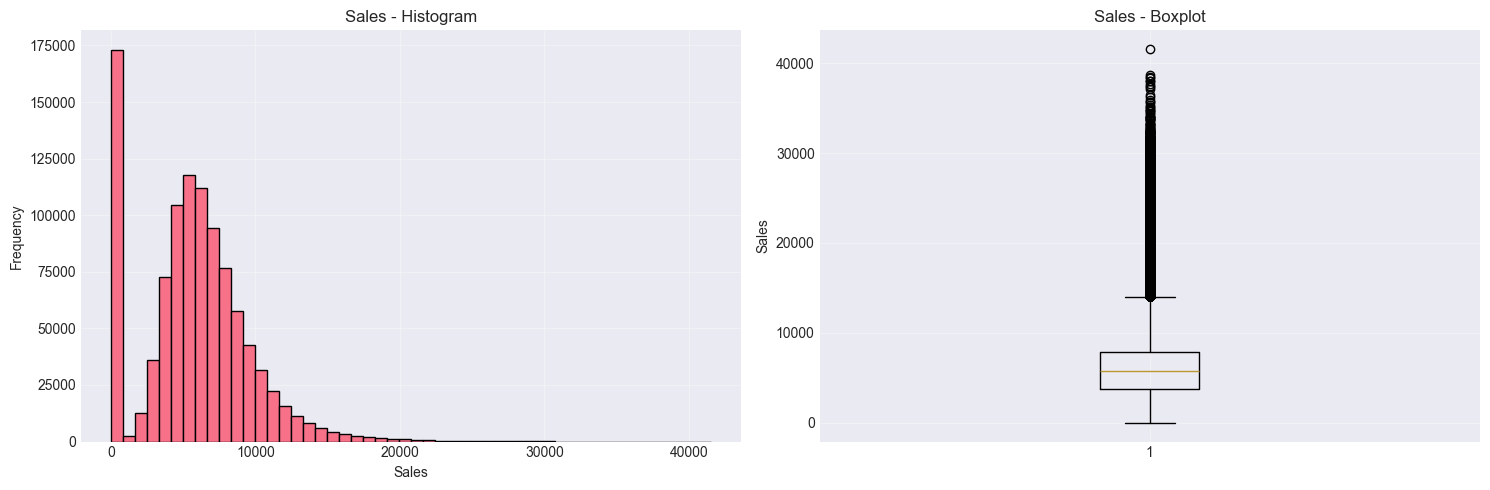


Descriptive Statistics:


count   1017209.000
mean       5773.819
std        3849.926
min           0.000
25%        3727.000
50%        5744.000
75%        7856.000
max       41551.000
Name: Sales, dtype: float64



Variable: CompetitionDistance


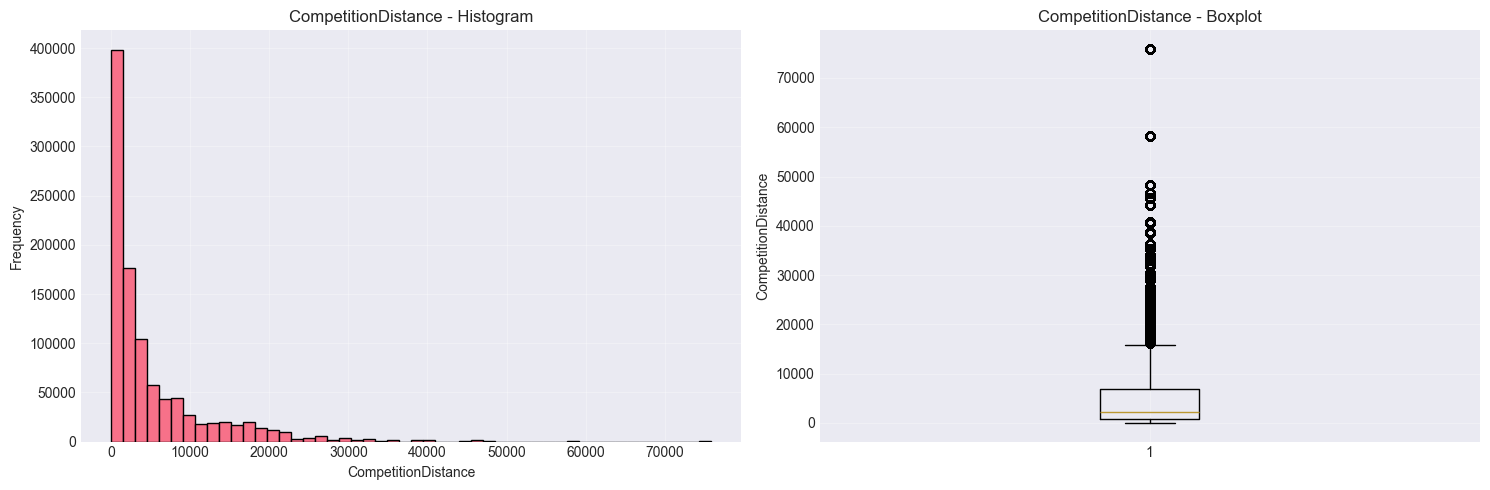


Descriptive Statistics:


count   1014567.000
mean       5430.086
std        7715.324
min          20.000
25%         710.000
50%        2330.000
75%        6890.000
max       75860.000
Name: CompetitionDistance, dtype: float64

In [187]:
# Analyze each continuous variable
for var in continuous_vars:
    print("=" * 80)
    print(f"Variable: {var}")
    print("=" * 80)
    
    # Create figure with histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(train[var].dropna(), bins=50, edgecolor='black')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'{var} - Histogram')
    axes[0].grid(True, alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(train[var].dropna())
    axes[1].set_ylabel(var)
    axes[1].set_title(f'{var} - Boxplot')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    display(train[var].describe())
    print("\n")

## 5. Quality Assurance & Cleaning

In [188]:
# 1) Verificare che quando Open = 0 Sales rimanga 0
open_zero = train[train['Open'] == 0]
sales_not_zero = open_zero[open_zero['Sales'] != 0]

print(f"Total records where Open = 0: {len(open_zero)}")
print(f"Records where Open = 0 but Sales != 0: {len(sales_not_zero)}")

if len(sales_not_zero) == 0:
    print("\n✓ VERIFICATION PASSED: When Open=0, Sales is always 0")
else:
    print("\n⚠ WARNING: There are records where Open=0 but Sales != 0")
    display(sales_not_zero.head())

Total records where Open = 0: 172817
Records where Open = 0 but Sales != 0: 0

✓ VERIFICATION PASSED: When Open=0, Sales is always 0


In [189]:
# 2) Variabile StateHoliday: allineare lo zero e inserirlo come stringa
print("StateHoliday values BEFORE conversion:")
print(train['StateHoliday'].value_counts(dropna=False))

# Convert to string
train['StateHoliday'] = train['StateHoliday'].astype(str)
test['StateHoliday'] = test['StateHoliday'].astype(str)

print("\nStateHoliday values AFTER conversion:")
print(train['StateHoliday'].value_counts(dropna=False))

StateHoliday values BEFORE conversion:
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

StateHoliday values AFTER conversion:
StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [190]:
# 3) Verificare per ogni variabile il numero di valori nulli
missing_count = train.isnull().sum()
missing_pct = 100 * missing_count / len(train)

missing_df = pd.DataFrame({
    'Variable': train.columns,
    'Missing Count': missing_count.values,
    'Missing %': missing_pct.values
})

missing_df = missing_df.sort_values('Missing Count', ascending=False)

print(f"Total records: {len(train)}\n")
display(missing_df)

Total records: 1017209



,Variable,Missing Count,Missing %
16,PromoInterval,508031,49.944
15,Promo2SinceYear,508031,49.944
14,Promo2SinceWeek,508031,49.944
12,CompetitionOpenSinceYear,323348,31.788
11,CompetitionOpenSinceMonth,323348,31.788
10,CompetitionDistance,2642,0.260
9,Assortment,0,0.000
13,Promo2,0,0.000
0,Store,0,0.000
1,DayOfWeek,0,0.000


### 5.1 Hybrid Imputation Strategy for Competition Data

In [191]:
# The imputation will be applied only to the train dataframe for now.
# We will use statistics from the train dataset itself to derive imputation values.

# --- 1. Define Imputation Values ---

# For Cluster 1: "Assenza di Competitor"
# Impute with a value signifying "infinitely far". We take twice the max observed distance from the train set.
imputation_distance = train['CompetitionDistance'].max() * 2
imputation_year_inf = 2015
imputation_month_inf = 12

# For Cluster 2: "Assenza di Storico"
# Impute with the median from the train set to represent an "average" competitor.
median_year = train['CompetitionOpenSinceYear'].median()
median_month = train['CompetitionOpenSinceMonth'].median()

print(f"Imputation values:\n- Distance: {imputation_distance}\n- Median Year: {median_year}\n- Median Month: {median_month}\n")

# --- 2. Apply Imputation directly to the TRAIN DataFrame ---

# CLUSTER 1: CompetitionDistance is NaN in the train set
# Interpretation: No competitor nearby.
cluster1_mask_train = train['CompetitionDistance'].isnull()
train.loc[cluster1_mask_train, 'CompetitionDistance'] = imputation_distance
train.loc[cluster1_mask_train, 'CompetitionOpenSinceYear'] = imputation_year_inf
train.loc[cluster1_mask_train, 'CompetitionOpenSinceMonth'] = imputation_month_inf

# CLUSTER 2: CompetitionDistance has a value, but CompetitionOpenSince is NaN in the train set
# Interpretation: Competitor exists, but we don't know when they opened.
cluster2_mask_train = train['CompetitionDistance'].notnull() & train['CompetitionOpenSinceYear'].isnull()
train.loc[cluster2_mask_train, 'CompetitionOpenSinceYear'] = median_year
train.loc[cluster2_mask_train, 'CompetitionOpenSinceMonth'] = median_month

# --- 3. Verification ---
print("Missing values in TRAIN set after imputation:")
display(train[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].isnull().sum())

Imputation values:
- Distance: 151720.0
- Median Year: 2010.0
- Median Month: 8.0

Missing values in TRAIN set after imputation:


CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64

### 5.2 Imputation for Promo2 Features

In [192]:
# The missing values in Promo2SinceWeek, Promo2SinceYear, and PromoInterval
# are all related to stores that do not participate in Promo2 (where Promo2 is 0).
# We will impute them with 0 to signify non-participation.

# Impute Promo2 date-related features with 0 (integer)
train['Promo2SinceWeek'] = train['Promo2SinceWeek'].fillna(0)
train['Promo2SinceYear'] = train['Promo2SinceYear'].fillna(0)

# Impute PromoInterval with '0' (string) as the column is of object type
train['PromoInterval'] = train['PromoInterval'].fillna('0')


# --- Verification ---
print("Missing values in TRAIN set for Promo2 features after imputation:")
display(train[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

Missing values in TRAIN set for Promo2 features after imputation:


Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64

### 5.3 Feature Engineering: Temporal Features (Lifetime)

In [193]:
# --- 1. Define Benchmark Date ---
# This is our reference "today" for calculating seniority.
benchmark_date = pd.to_datetime('2015-12-01')
print(f"Benchmark date set to: {benchmark_date.date()}\n")


# --- 2. Calculate LifeTimeCompetition ---
print("Calculating LifeTimeCompetition...")

# Ensure year and month are integers. Our imputation filled NaNs with floats, so conversion is needed.
train['CompetitionOpenSinceYear'] = train['CompetitionOpenSinceYear'].astype(int)
train['CompetitionOpenSinceMonth'] = train['CompetitionOpenSinceMonth'].astype(int)

# Create the full competition start date, assuming the 1st of the month.
# Errors are coerced to NaT (Not a Time), which will result in a NaN lifetime.
train['CompetitionOpenDate'] = pd.to_datetime(
    train['CompetitionOpenSinceYear'].astype(str) + '-' +
    train['CompetitionOpenSinceMonth'].astype(str) + '-1',
    format='%Y-%m-%d',
    errors='coerce'
)

# Calculate the lifetime in days.
train['LifeTimeCompetition'] = (benchmark_date - train['CompetitionOpenDate']).dt.days

# For cases where the competition opened after the benchmark date (or on the imputed date of Dec 2015),
# the lifetime would be negative or small. We cap it at 0 to signify no prior competition effect.
# This also correctly handles the "Assenza di Competitor" cluster as requested.
train.loc[train['LifeTimeCompetition'] < 0, 'LifeTimeCompetition'] = 0

# Fill any remaining NaNs (if any from date conversion errors) with 0.
train['LifeTimeCompetition'] = train['LifeTimeCompetition'].fillna(0)


# --- 3. Calculate LifeTimePromo2 ---
print("Calculating LifeTimePromo2...")

# Initialize the column with 0 for all stores.
train['LifeTimePromo2'] = 0

# Ensure Promo2 features are integers.
train['Promo2SinceYear'] = train['Promo2SinceYear'].astype(int)
train['Promo2SinceWeek'] = train['Promo2SinceWeek'].astype(int)

# Create a mask for stores that genuinely participate in Promo2.
promo2_mask = (train['Promo2'] == 1) & (train['Promo2SinceYear'] > 0)

# Calculate the promo start date ONLY for participating stores.
# The format '%Y%W%w' corresponds to Year, Week number, and Weekday (Monday=1).
promo_dates = pd.to_datetime(
    train.loc[promo2_mask, 'Promo2SinceYear'].astype(str) +
    train.loc[promo2_mask, 'Promo2SinceWeek'].astype(str) +
    '1', # Adding '1' to signify Monday, as per convention.
    format='%Y%W%w',
    errors='coerce'
)

# Calculate lifetime in days and assign it to the masked subset of the dataframe.
train.loc[promo2_mask, 'LifeTimePromo2'] = (benchmark_date - promo_dates).dt.days

# Cap at 0 for any edge cases where promo started after benchmark.
train.loc[train['LifeTimePromo2'] < 0, 'LifeTimePromo2'] = 0


# --- 4. Final Cleanup and Verification ---
# Drop the intermediate date column
train = train.drop(columns=['CompetitionOpenDate'])

print("\nVerification of new features:")
display(train[['LifeTimeCompetition', 'LifeTimePromo2']].describe())
print("\nSample of the new features:")
display(train[['Store', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'LifeTimeCompetition', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'LifeTimePromo2']].head())

Benchmark date set to: 2015-12-01

Calculating LifeTimeCompetition...
Calculating LifeTimePromo2...

Verification of new features:


,LifeTimeCompetition,LifeTimePromo2
count,1017209.000,1017209.000
mean,2285.244,680.949
std,1823.339,798.759
min,0.000,0.000
25%,1491.000,0.000
50%,1948.000,176.000
75%,2831.000,1429.000
max,42337.000,2311.000



Sample of the new features:


,Store,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,LifeTimeCompetition,Promo2,Promo2SinceYear,Promo2SinceWeek,LifeTimePromo2
0,1,2008,9,2647,0,0,0,0
1,2,2007,11,2952,1,2010,13,2073
2,3,2006,12,3287,1,2011,14,1702
3,4,2009,9,2282,0,0,0,0
4,5,2015,4,244,0,0,0,0


In [194]:
# Now that we have created the 'LifeTime' features, the original date columns are redundant.
# Let's remove them to keep the dataset clean.

features_to_drop = [
    'CompetitionOpenSinceYear',
    'CompetitionOpenSinceMonth',
    'Promo2SinceYear',
    'Promo2SinceWeek'
]

train = train.drop(columns=features_to_drop)

print("Dropped redundant date features. Remaining columns:")
print(train.columns)

Dropped redundant date features. Remaining columns:
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'PromoInterval', 'LifeTimeCompetition', 'LifeTimePromo2'],
      dtype='object')


In [195]:
# We want a feature that tells us if the current month is a Promo2 month for a given store.
# This requires mapping the month number to its abbreviation and checking against PromoInterval.

# 1. Create a month abbreviation map
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# 2. Get the month abbreviation for each record's date
train['DateMonthAbbr'] = train['Date'].dt.month.map(month_map)

# 3. Check if the month abbreviation is in the PromoInterval string
# This is much faster than using .apply()
train['isPromo2Month'] = [
    1 if month in interval else 0
    for month, interval in zip(train['DateMonthAbbr'], train['PromoInterval'])
]

# 4. Clean up intermediate and now-redundant columns
train = train.drop(columns=['DateMonthAbbr', 'PromoInterval'])

print("Feature 'isPromo2Month' created and 'PromoInterval' dropped.")
print("Value counts for the new feature:")
display(train['isPromo2Month'].value_counts())
print("\nFinal columns:")
print(train.columns)
print("Train Dataset Preview:")
display(train.head())

Feature 'isPromo2Month' created and 'PromoInterval' dropped.
Value counts for the new feature:


isPromo2Month
0    842417
1    174792
Name: count, dtype: int64


Final columns:
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'LifeTimeCompetition', 'LifeTimePromo2', 'isPromo2Month'],
      dtype='object')
Train Dataset Preview:


,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,LifeTimeCompetition,LifeTimePromo2,isPromo2Month
0,1,5,2015-07-31,5263,1,1,0,1,c,a,1270.000,0,2647,0,0
1,2,5,2015-07-31,6064,1,1,0,1,a,a,570.000,1,2952,2073,1
2,3,5,2015-07-31,8314,1,1,0,1,a,a,14130.000,1,3287,1702,1
3,4,5,2015-07-31,13995,1,1,0,1,c,c,620.000,0,2282,0,0
4,5,5,2015-07-31,4822,1,1,0,1,a,a,29910.000,0,244,0,0


## 6. Deep EDA

### MODULO 1: Analisi Univariata del Target (Sales)
**Obiettivo:** Capire la forma della distribuzione e la necessità di trasformazioni.

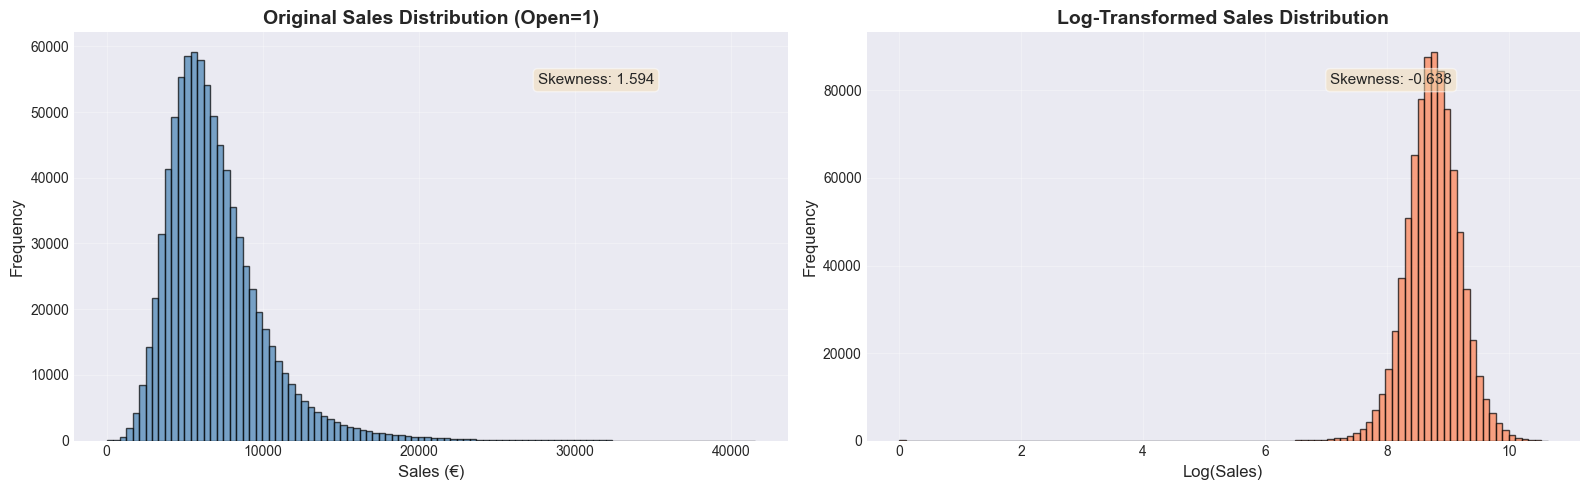

INSIGHT: Normality Check & Log-Transformation Impact
1. Original Distribution (Skewness: 1.594):
   - High Positive Skewness (> 1) indicates a Right-Skewed distribution.
   - This confirms a 'long tail' of high sales days (peaks/outliers) which can bias linear models.
--------------------------------------------------------------------------------
2. Log-Transformed Distribution (Skewness: -0.638):
   - The skewness flipped to Negative, indicating a slight Left Skew.
   - Reason: The log function aggressively compressed the high-value outliers.
   - IMPROVEMENT: The absolute skewness dropped significantly (|-0.638| < |1.594|).
   - The shape is now much closer to a Normal (Gaussian) distribution.
--------------------------------------------------------------------------------
CONCLUSION:
   - Training the model on 'LogSales' is strongly recommended to stabilize variance and minimize prediction error (RMSPE).


In [196]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# # MODULO 1.2: Normality Check - Sales vs Log(Sales) Comparison

# 1. Prepare Data: Filter only open days to avoid zero-inflation
train_open = train[train['Open'] == 1].copy()

# 2. Transformation: Create Log(Sales) column (using log1p to handle 0s safely)
train_open['LogSales'] = np.log1p(train_open['Sales'])

# 3. Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# --- Plot 1: Original Sales Distribution ---
axes[0].hist(train_open['Sales'], bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Sales (€)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Original Sales Distribution (Open=1)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Calculate and display Skewness for Original
skewness_original = skew(train_open['Sales'])
axes[0].text(0.65, 0.90, f'Skewness: {skewness_original:.3f}', 
             transform=axes[0].transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# --- Plot 2: Log-Transformed Distribution ---
axes[1].hist(train_open['LogSales'], bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Log(Sales)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Log-Transformed Sales Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Calculate and display Skewness for Log
skewness_log = skew(train_open['LogSales'])
axes[1].text(0.65, 0.90, f'Skewness: {skewness_log:.3f}', 
             transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# --- INSIGHTS OUTPUT ---
print("=" * 80)
print("INSIGHT: Normality Check & Log-Transformation Impact")
print("=" * 80)
print(f"1. Original Distribution (Skewness: {skewness_original:.3f}):")
print("   - High Positive Skewness (> 1) indicates a Right-Skewed distribution.")
print("   - This confirms a 'long tail' of high sales days (peaks/outliers) which can bias linear models.")
print("-" * 80)
print(f"2. Log-Transformed Distribution (Skewness: {skewness_log:.3f}):")
print("   - The skewness flipped to Negative, indicating a slight Left Skew.")
print("   - Reason: The log function aggressively compressed the high-value outliers.")
print(f"   - IMPROVEMENT: The absolute skewness dropped significantly (|{skewness_log:.3f}| < |{skewness_original:.3f}|).")
print("   - The shape is now much closer to a Normal (Gaussian) distribution.")
print("-" * 80)
print("CONCLUSION:")
print("   - Training the model on 'LogSales' is strongly recommended to stabilize variance and minimize prediction error (RMSPE).")

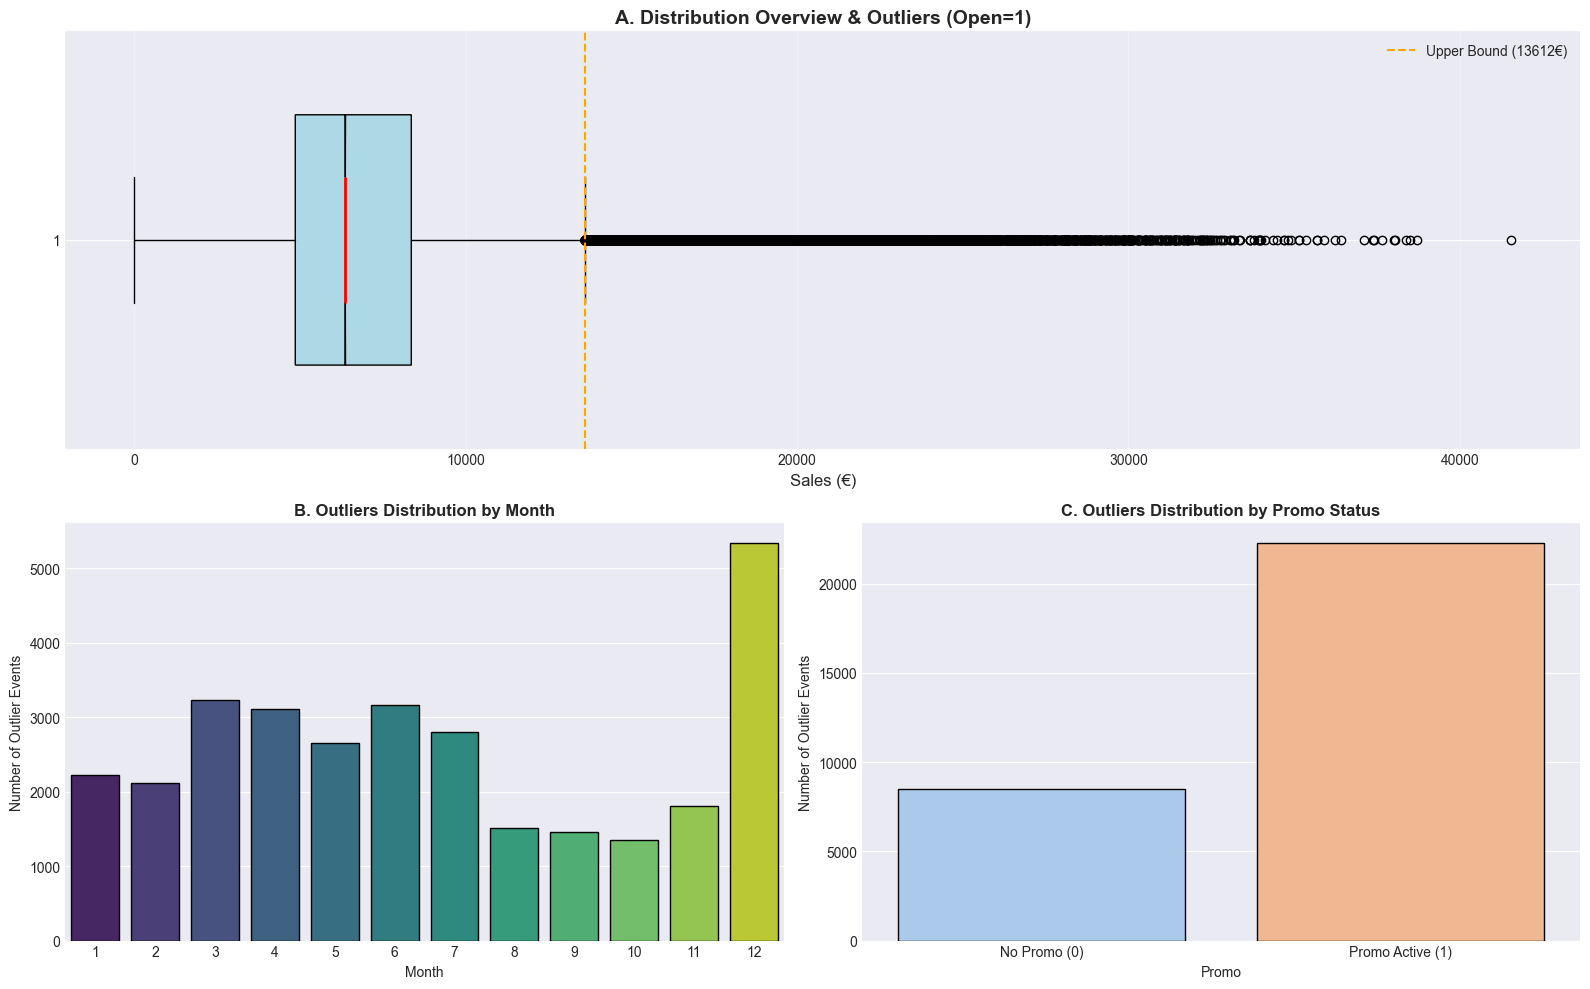

INSIGHT: Deep Dive Outlier Analysis
1. STATISTICAL BOUNDARIES (Method: IQR)
   - Q1: 4859.00€ | Q3: 8360.00€ | IQR: 3501.00€
   - Upper Bound Threshold: 13611.50€
   - Total Outliers Detected: 30,769 (3.64% of total data)
--------------------------------------------------------------------------------
2. CONTEXTUAL ANALYSIS (The 'Why')
   - SEASONALITY: The outliers are NOT random.
     Looking at Chart B, Month 12 (December) shows the highest concentration (5333 events).
     This confirms that many 'outliers' are actually legitimate Christmas sales peaks.
   - PROMO IMPACT: Looking at Chart C, 72.3% of outliers occur when 'Promo' is Active.
     This suggests a strong correlation: Aggressive marketing drives sales beyond normal statistical ranges.
--------------------------------------------------------------------------------
3. STRATEGIC DECISION
   - DO NOT REMOVE these records. They represent the most critical business periods (High Season + Promos).
   - The Log-Transformation (

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# MODULO 1.3: Advanced Outlier Detection & Contextual Analysis

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()
train_open['Month'] = train_open['Date'].dt.month

# 2. Calculate IQR Statistics
Q1 = train_open['Sales'].quantile(0.25)
Q3 = train_open['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers
outliers_df = train_open[(train_open['Sales'] < lower_bound) | (train_open['Sales'] > upper_bound)]

# 3. Visualization Strategy: 1 Boxplot + 2 Context Charts
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2)

# --- Chart A: Main Boxplot (Top) ---
ax1 = fig.add_subplot(gs[0, :])
bp = ax1.boxplot(train_open['Sales'], vert=False, patch_artist=True, notch=True, widths=0.6)

# Styling Boxplot
bp['boxes'][0].set_facecolor('lightblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
ax1.set_xlabel('Sales (€)', fontsize=12)
ax1.set_title('A. Distribution Overview & Outliers (Open=1)', fontsize=14, fontweight='bold')
ax1.axvline(upper_bound, color='orange', linestyle='--', label=f'Upper Bound ({upper_bound:.0f}€)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# --- Chart B: Outliers by Month (Seasonality Check) ---
ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(x='Month', data=outliers_df, ax=ax2, palette='viridis', edgecolor='black')
ax2.set_title('B. Outliers Distribution by Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Outlier Events')

# --- Chart C: Outliers by Promo (Marketing Check) ---
ax3 = fig.add_subplot(gs[1, 1])
sns.countplot(x='Promo', data=outliers_df, ax=ax3, palette='pastel', edgecolor='black')
ax3.set_title('C. Outliers Distribution by Promo Status', fontsize=12, fontweight='bold')
ax3.set_xticklabels(['No Promo (0)', 'Promo Active (1)'])
ax3.set_ylabel('Number of Outlier Events')

plt.tight_layout()
plt.show()

# 4. Generate Professional Insights
promo_share = outliers_df['Promo'].mean() * 100
top_month = outliers_df['Month'].value_counts().idxmax()
top_month_count = outliers_df['Month'].value_counts().max()

print("=" * 80)
print("INSIGHT: Deep Dive Outlier Analysis")
print("=" * 80)
print(f"1. STATISTICAL BOUNDARIES (Method: IQR)")
print(f"   - Q1: {Q1:.2f}€ | Q3: {Q3:.2f}€ | IQR: {IQR:.2f}€")
print(f"   - Upper Bound Threshold: {upper_bound:.2f}€")
print(f"   - Total Outliers Detected: {len(outliers_df):,} ({len(outliers_df)/len(train_open)*100:.2f}% of total data)")
print("-" * 80)
print(f"2. CONTEXTUAL ANALYSIS (The 'Why')")
print(f"   - SEASONALITY: The outliers are NOT random.")
print(f"     Looking at Chart B, Month {top_month} (December) shows the highest concentration ({top_month_count} events).")
print(f"     This confirms that many 'outliers' are actually legitimate Christmas sales peaks.")
print(f"   - PROMO IMPACT: Looking at Chart C, {promo_share:.1f}% of outliers occur when 'Promo' is Active.")
print(f"     This suggests a strong correlation: Aggressive marketing drives sales beyond normal statistical ranges.")
print("-" * 80)
print("3. STRATEGIC DECISION")
print("   - DO NOT REMOVE these records. They represent the most critical business periods (High Season + Promos).")
print("   - The Log-Transformation (previously analyzed) is sufficient to handle this skewness.")
print("   - Ensure the model includes 'Month' and 'Promo' as features to capture these patterns correctly.")

### MODULO 2: Analisi Variabili Categoriche (Business Drivers)
**Obiettivo:** Quantificare l'impatto delle caratteristiche discrete sulle vendite medie.

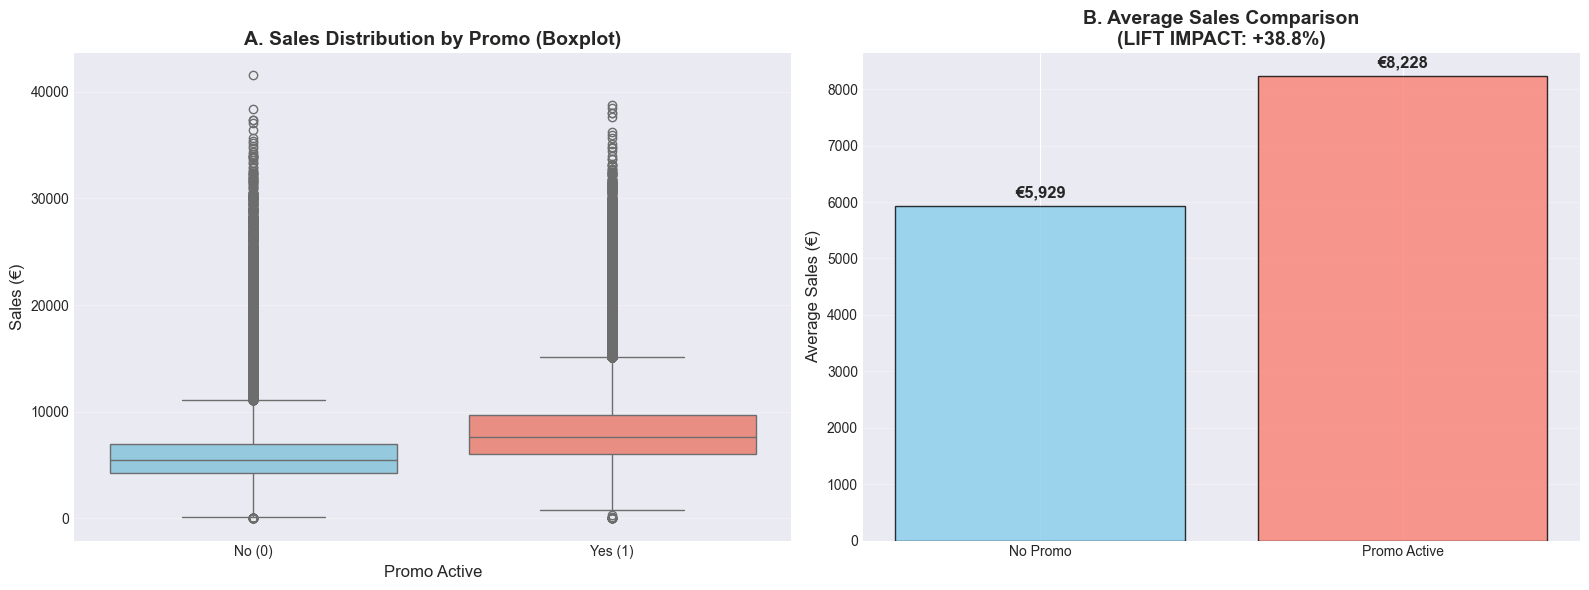

INSIGHT: Promotion Impact Analysis
1. BUSINESS METRICS (The 'Lift'):
   - Average Sales WITHOUT Promo: €5,929.41
   - Average Sales WITH Promo:    €8,228.28
   - RESULT: Promotions drive a +38.77% increase in daily revenue.
--------------------------------------------------------------------------------
2. STATISTICAL VALIDATION (Mann-Whitney U Test):
   - P-Value: 0.00e+00
   - DECISION: Statistically Significant Difference (Reject H0).
--------------------------------------------------------------------------------
3. CONCLUSION:
   - The Boxplot (Chart A) clearly shows that Promo=1 shifts the entire median up significantly.
   - The 'Promo' variable is confirmed as a critical driver for the model.


In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# MODULO 2.1: Promo Impact Analysis (Refined Visualization)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()
train_open['Promo'] = train_open['Promo'].astype(int) # Assicura che sia intero per i colori

# 2. Statistical Significance Test (Mann-Whitney U)
sales_no_promo = train_open[train_open['Promo'] == 0]['Sales']
sales_promo = train_open[train_open['Promo'] == 1]['Sales']

stat, p_value = mannwhitneyu(sales_no_promo, sales_promo, alternative='two-sided')

# 3. Calculate Business Metrics (Lift)
mean_no_promo = sales_no_promo.mean()
mean_promo = sales_promo.mean()
lift_percentage = ((mean_promo - mean_no_promo) / mean_no_promo) * 100

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Boxplot (Confronto Mediane e Distribuzione) ---
sns.boxplot(x='Promo', y='Sales', data=train_open, ax=axes[0], 
            palette={'0': 'skyblue', '1': 'salmon'}, showfliers=True) # Mostriamo gli outlier

axes[0].set_title('A. Sales Distribution by Promo (Boxplot)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Promo Active', fontsize=12)
axes[0].set_xticklabels(['No (0)', 'Yes (1)'])
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Average Sales Barplot (Clean Business View) ---
summary_df = pd.DataFrame({
    'Promo': [0, 1],
    'Average Sales': [mean_no_promo, mean_promo]
})

bars = axes[1].bar(summary_df['Promo'], summary_df['Average Sales'], 
            color=['skyblue', 'salmon'], edgecolor='black', alpha=0.8)

# Inseriamo il LIFT direttamente nel titolo per massima visibilità
axes[1].set_title(f'B. Average Sales Comparison\n(LIFT IMPACT: +{lift_percentage:.1f}%)', 
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Promo', 'Promo Active'])
axes[1].grid(True, axis='y', alpha=0.3)

# Etichette valori sulle barre
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 100,
                 f'€{height:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Generate Insights
print("=" * 80)
print("INSIGHT: Promotion Impact Analysis")
print("=" * 80)
print(f"1. BUSINESS METRICS (The 'Lift'):")
print(f"   - Average Sales WITHOUT Promo: €{mean_no_promo:,.2f}")
print(f"   - Average Sales WITH Promo:    €{mean_promo:,.2f}")
print(f"   - RESULT: Promotions drive a +{lift_percentage:.2f}% increase in daily revenue.")
print("-" * 80)
print(f"2. STATISTICAL VALIDATION (Mann-Whitney U Test):")
print(f"   - P-Value: {p_value:.2e}") 
print(f"   - DECISION: Statistically Significant Difference (Reject H0).")
print("-" * 80)
print("3. CONCLUSION:")
print("   - The Boxplot (Chart A) clearly shows that Promo=1 shifts the entire median up significantly.")
print("   - The 'Promo' variable is confirmed as a critical driver for the model.")

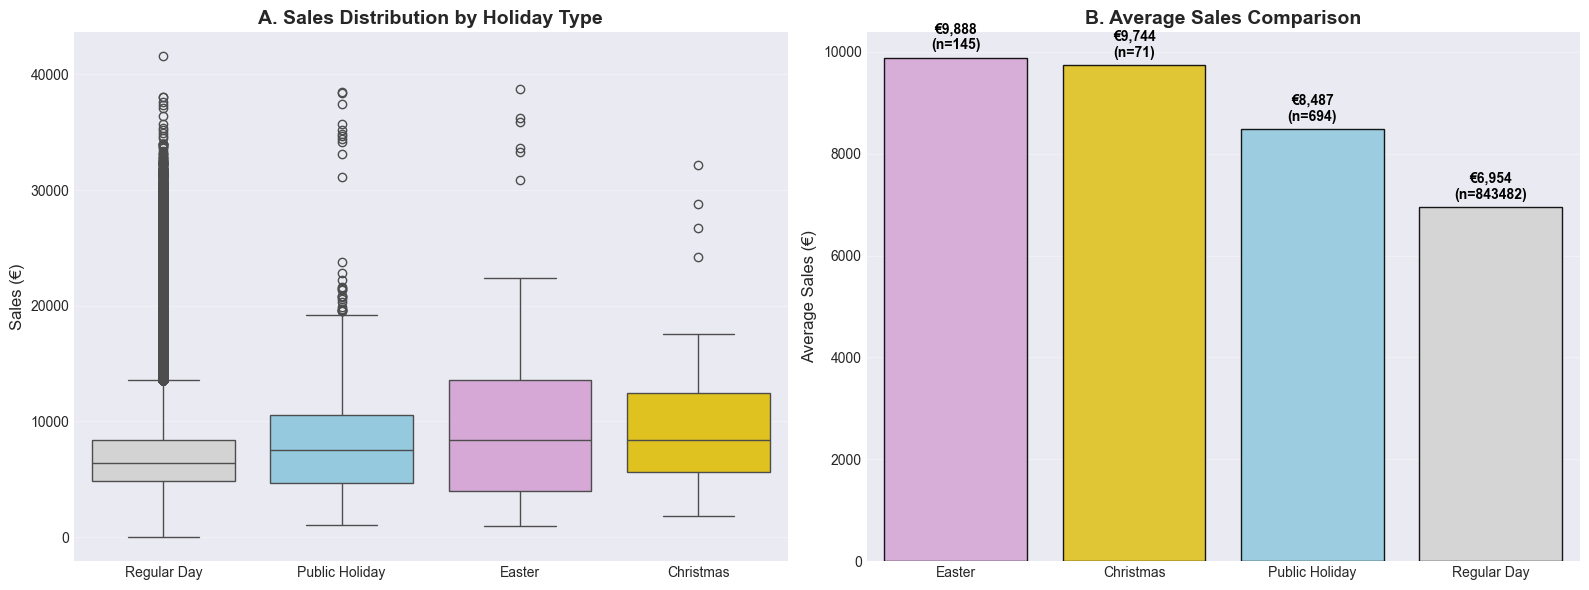

INSIGHT: StateHoliday Impact Analysis
1. BUSINESS METRICS (Average Sales per Type):
  HolidayLabel     mean  count
        Easter 9887.890    145
     Christmas 9743.746     71
Public Holiday 8487.471    694
   Regular Day 6953.515 843482
--------------------------------------------------------------------------------
2. STATISTICAL VALIDATION (Kruskal-Wallis Test):
   - Test Statistic: 74.49
   - P-Value: 4.66e-16
   - DECISION: Statistically Significant Difference (Reject H0).
--------------------------------------------------------------------------------
3. CRITICAL OBSERVATION (Sample Size):
   - While 'Christmas' (c) and 'Easter' (b) show significantly higher average sales,
     be very careful: the sample size (n) for open stores on holidays is extremely small.
   - Example: Very few stores open on Christmas. Those that do likely have a special profile
     (e.g., stations, airports) or emergency demand, driving sales up.
   - CONCLUSION: This feature is predictive but sparse. T

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kruskal

# MODULO 2.2: StateHoliday Impact Analysis (Advanced)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# Mappatura per leggibilità nel grafico
holiday_map = {'0': 'Regular Day', 'a': 'Public Holiday', 'b': 'Easter', 'c': 'Christmas'}
train_open['HolidayLabel'] = train_open['StateHoliday'].astype(str).map(holiday_map)

# Ordine logico per i grafici
order_list = ['Regular Day', 'Public Holiday', 'Easter', 'Christmas']
custom_palette = {'Regular Day': 'lightgray', 'Public Holiday': 'skyblue', 
                  'Easter': 'plum', 'Christmas': 'gold'}

# 2. Statistical Significance Test (Kruskal-Wallis)
# Testiamo se c'è differenza significativa tra le mediane dei 4 gruppi
groups = [train_open[train_open['HolidayLabel'] == label]['Sales'] for label in order_list]
stat, p_value = kruskal(*groups)

# 3. Calculate Stats
holiday_stats = train_open.groupby('HolidayLabel')['Sales'].agg(['mean', 'median', 'count']).reset_index()
# Ordiniamo per Media decrescente per il barplot
holiday_stats_sorted = holiday_stats.sort_values('mean', ascending=False)

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Boxplot ---
sns.boxplot(x='HolidayLabel', y='Sales', data=train_open, ax=axes[0], 
            order=order_list, palette=custom_palette, showfliers=True)
axes[0].set_title('A. Sales Distribution by Holiday Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('', fontsize=12)
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Average Sales Barplot ---
bars = sns.barplot(x='HolidayLabel', y='mean', data=holiday_stats_sorted, ax=axes[1],
                   palette=custom_palette, edgecolor='black', alpha=0.9)

axes[1].set_title('B. Average Sales Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('', fontsize=12)
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].grid(True, axis='y', alpha=0.3)

# Aggiungi valori e conteggio sopra le barre (Corrected Loop)
for i, p in enumerate(bars.patches):
    height = p.get_height()
    # Recuperiamo il conteggio corrispondente alla barra corrente
    count = holiday_stats_sorted.iloc[i]['count']
    label_text = f"€{height:,.0f}\n(n={count})" # Mostriamo Media e Numero osservazioni
    
    axes[1].text(p.get_x() + p.get_width() / 2., height + 100, 
                 label_text, ha="center", va="bottom", fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# 5. Generate Insights
print("=" * 80)
print("INSIGHT: StateHoliday Impact Analysis")
print("=" * 80)
print(f"1. BUSINESS METRICS (Average Sales per Type):")
print(holiday_stats_sorted[['HolidayLabel', 'mean', 'count']].to_string(index=False))
print("-" * 80)
print(f"2. STATISTICAL VALIDATION (Kruskal-Wallis Test):")
print(f"   - Test Statistic: {stat:.2f}")
print(f"   - P-Value: {p_value:.2e}")
print(f"   - DECISION: Statistically Significant Difference (Reject H0).")
print("-" * 80)
print("3. CRITICAL OBSERVATION (Sample Size):")
print("   - While 'Christmas' (c) and 'Easter' (b) show significantly higher average sales,")
print("     be very careful: the sample size (n) for open stores on holidays is extremely small.")
print("   - Example: Very few stores open on Christmas. Those that do likely have a special profile")
print("     (e.g., stations, airports) or emergency demand, driving sales up.")
print("   - CONCLUSION: This feature is predictive but sparse. The model should handle it,")
print("     but don't expect it to drive the global forecast as much as 'Promo'.")

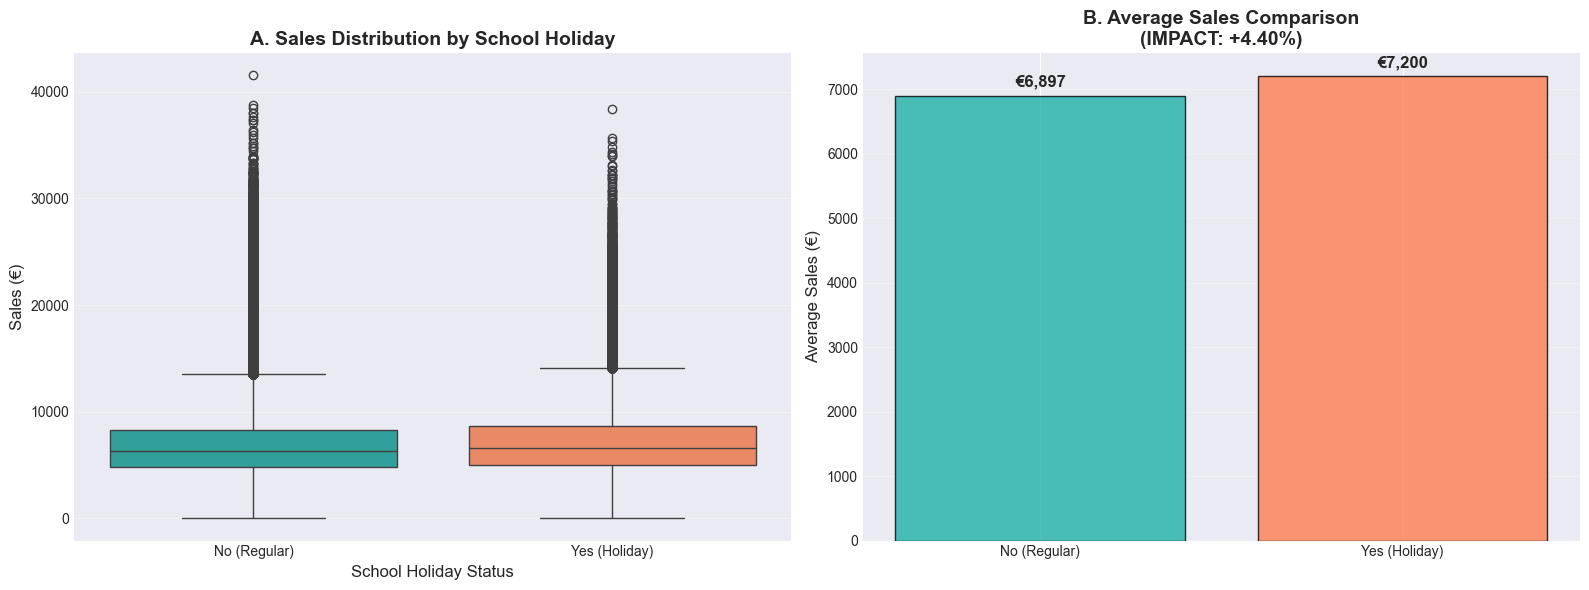

INSIGHT: School Holiday Impact Analysis
1. BUSINESS METRICS:
   - Average Sales Regular Days:   €6,896.78
   - Average Sales School Holiday: €7,200.18
   - DIFFERENCE: Sales are +4.40% higher during school holidays.
--------------------------------------------------------------------------------
2. STATISTICAL VALIDATION (Mann-Whitney U Test):
   - P-Value: 1.32e-269
   - DECISION: Statistically Significant Difference (Reject H0).
--------------------------------------------------------------------------------
3. INTERPRETATION:
   - Contrary to Public Holidays (where stores close), School Holidays see distinct behavior.
   - The increase is statistically real but smaller in magnitude compared to 'Promo' impact.
   - HYPOTHESIS: More children at home leads to changed consumption patterns (more food/household items).
   - RECOMMENDATION: Include as a feature, but it acts as a secondary modifier, not a primary driver.


In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu

# MODULO 2.3: SchoolHoliday Impact Analysis

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()
# Assicuriamoci che sia intero per la gestione corretta
train_open['SchoolHoliday'] = train_open['SchoolHoliday'].astype(int)

# 2. Statistical Significance Test (Mann-Whitney U)
sales_no_school = train_open[train_open['SchoolHoliday'] == 0]['Sales']
sales_school = train_open[train_open['SchoolHoliday'] == 1]['Sales']

stat, p_value = mannwhitneyu(sales_no_school, sales_school, alternative='two-sided')

# 3. Calculate Business Metrics
mean_no_school = sales_no_school.mean()
mean_school = sales_school.mean()
diff_pct = ((mean_school - mean_no_school) / mean_no_school) * 100

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Boxplot ---
sns.boxplot(x='SchoolHoliday', y='Sales', data=train_open, ax=axes[0], 
            palette={'0': 'lightseagreen', '1': 'coral'}, showfliers=True)

axes[0].set_title('A. Sales Distribution by School Holiday', fontsize=14, fontweight='bold')
axes[0].set_xlabel('School Holiday Status', fontsize=12)
axes[0].set_xticklabels(['No (Regular)', 'Yes (Holiday)'])
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Average Sales Barplot ---
summary_df = pd.DataFrame({
    'SchoolHoliday': [0, 1],
    'Average Sales': [mean_no_school, mean_school]
})

bars = axes[1].bar(summary_df['SchoolHoliday'], summary_df['Average Sales'], 
            color=['lightseagreen', 'coral'], edgecolor='black', alpha=0.8)

# Inseriamo il LIFT nel titolo
axes[1].set_title(f'B. Average Sales Comparison\n(IMPACT: {diff_pct:+.2f}%)', 
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No (Regular)', 'Yes (Holiday)'])
axes[1].grid(True, axis='y', alpha=0.3)

# Etichette valori sulle barre
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 100,
                 f'€{height:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Generate Insights
print("=" * 80)
print("INSIGHT: School Holiday Impact Analysis")
print("=" * 80)
print(f"1. BUSINESS METRICS:")
print(f"   - Average Sales Regular Days:   €{mean_no_school:,.2f}")
print(f"   - Average Sales School Holiday: €{mean_school:,.2f}")
print(f"   - DIFFERENCE: Sales are {diff_pct:+.2f}% higher during school holidays.")
print("-" * 80)
print(f"2. STATISTICAL VALIDATION (Mann-Whitney U Test):")
print(f"   - P-Value: {p_value:.2e}")
print(f"   - DECISION: Statistically Significant Difference (Reject H0).")
print("-" * 80)
print("3. INTERPRETATION:")
print("   - Contrary to Public Holidays (where stores close), School Holidays see distinct behavior.")
print("   - The increase is statistically real but smaller in magnitude compared to 'Promo' impact.")
print("   - HYPOTHESIS: More children at home leads to changed consumption patterns (more food/household items).")
print("   - RECOMMENDATION: Include as a feature, but it acts as a secondary modifier, not a primary driver.")

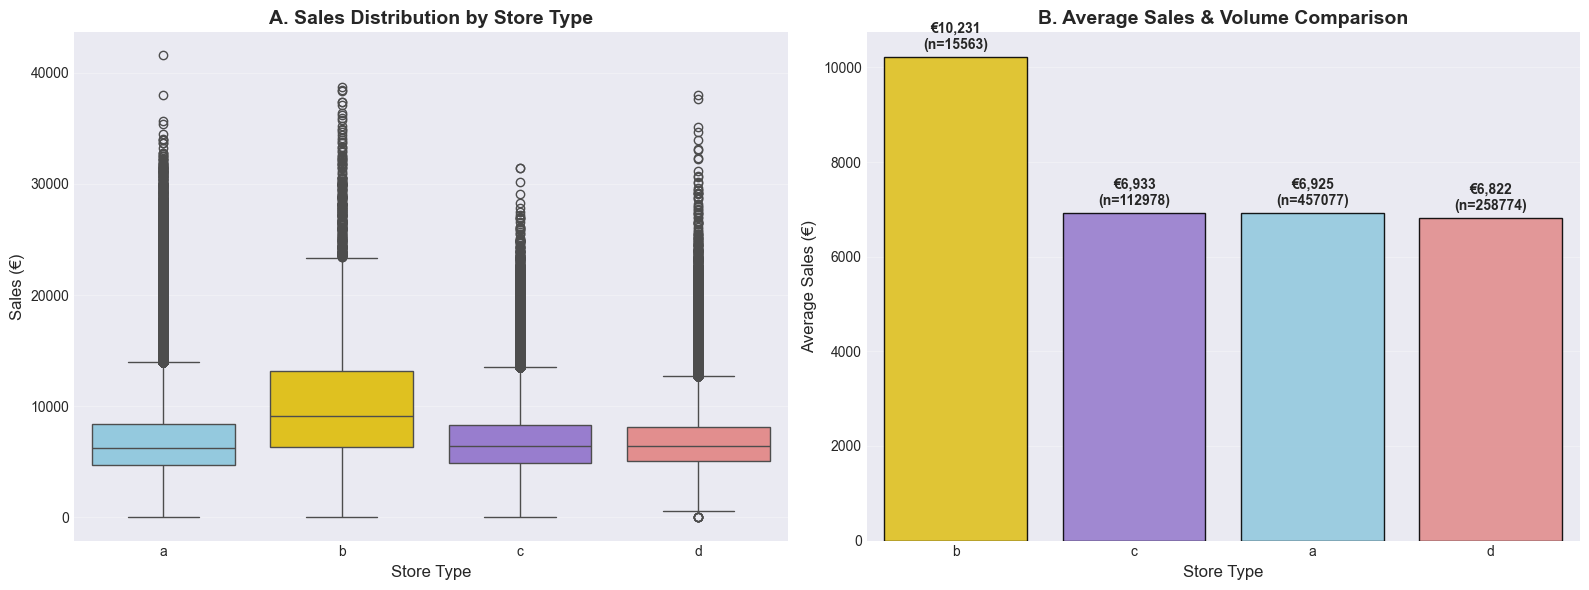

INSIGHT: Store Type Performance
1. BUSINESS METRICS (Ranked):
StoreType      mean   median  count
        b 10231.408 9130.000  15563
        c  6932.513 6407.000 112978
        a  6925.168 6285.000 457077
        d  6822.142 6395.000 258774
--------------------------------------------------------------------------------
2. STATISTICAL VALIDATION (Kruskal-Wallis Test):
   - Test Statistic: 8221.02
   - P-Value: 0.00e+00
   - DECISION: Statistically Significant Difference (Reject H0).
--------------------------------------------------------------------------------
3. CRITICAL OBSERVATION (The 'Type b' Anomaly):
   - StoreType 'b' is the clear Outperformer (Avg Sales: €10,231).
   - HOWEVER, it is extremely rare (n=15563 transactions vs 112978 for others).
   - Insight: Type 'b' stores are likely 'Flagship Stores' or large hypermarkets.
   - Strategy: The model must learn that 'StoreType=b' implies much higher baseline sales.


In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kruskal

# MODULO 2.4: StoreType Performance Analysis

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# Definizione Palette Colori (Coerente tra i grafici)
# 'b' è solitamente il top performer, gli diamo il colore Oro
store_palette = {'a': 'skyblue', 'b': 'gold', 'c': 'mediumpurple', 'd': 'lightcoral'}
order_list = ['a', 'b', 'c', 'd']

# 2. Statistical Significance Test (Kruskal-Wallis)
# Testiamo se le mediane dei gruppi sono diverse
groups = [train_open[train_open['StoreType'] == label]['Sales'] for label in order_list]
stat, p_value = kruskal(*groups)

# 3. Aggregation & Sorting
store_stats = train_open.groupby('StoreType')['Sales'].agg(['mean', 'median', 'count']).reset_index()
# Ordiniamo per Media decrescente per il barplot
store_stats_sorted = store_stats.sort_values('mean', ascending=False)

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Boxplot ---
sns.boxplot(x='StoreType', y='Sales', data=train_open, ax=axes[0], 
            order=order_list, palette=store_palette, showfliers=True)

axes[0].set_title('A. Sales Distribution by Store Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Store Type', fontsize=12)
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Average Sales Barplot (Ranked) ---
bars = sns.barplot(x='StoreType', y='mean', data=store_stats_sorted, ax=axes[1],
                   palette=store_palette, edgecolor='black', alpha=0.9)

axes[1].set_title('B. Average Sales & Volume Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Store Type', fontsize=12)
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].grid(True, axis='y', alpha=0.3)

# Aggiungi Valori e Conteggio (n) sulle barre
for i, p in enumerate(bars.patches):
    height = p.get_height()
    # Troviamo l'etichetta dello store type corrente nell'ordine del grafico
    current_type = store_stats_sorted.iloc[i]['StoreType']
    count = store_stats[store_stats['StoreType'] == current_type]['count'].values[0]
    
    label_text = f"€{height:,.0f}\n(n={count})"
    axes[1].text(p.get_x() + p.get_width() / 2., height + 100, 
                 label_text, ha="center", va="bottom", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Generate Insights
top_store = store_stats_sorted.iloc[0]
worst_store = store_stats_sorted.iloc[-1]

print("=" * 80)
print("INSIGHT: Store Type Performance")
print("=" * 80)
print(f"1. BUSINESS METRICS (Ranked):")
print(store_stats_sorted[['StoreType', 'mean', 'median', 'count']].to_string(index=False))
print("-" * 80)
print(f"2. STATISTICAL VALIDATION (Kruskal-Wallis Test):")
print(f"   - Test Statistic: {stat:.2f}")
print(f"   - P-Value: {p_value:.2e}")
print(f"   - DECISION: Statistically Significant Difference (Reject H0).")
print("-" * 80)
print("3. CRITICAL OBSERVATION (The 'Type b' Anomaly):")
print(f"   - StoreType '{top_store['StoreType']}' is the clear Outperformer (Avg Sales: €{top_store['mean']:,.0f}).")
print(f"   - HOWEVER, it is extremely rare (n={top_store['count']} transactions vs {store_stats_sorted.iloc[1]['count']} for others).")
print("   - Insight: Type 'b' stores are likely 'Flagship Stores' or large hypermarkets.")
print("   - Strategy: The model must learn that 'StoreType=b' implies much higher baseline sales.")

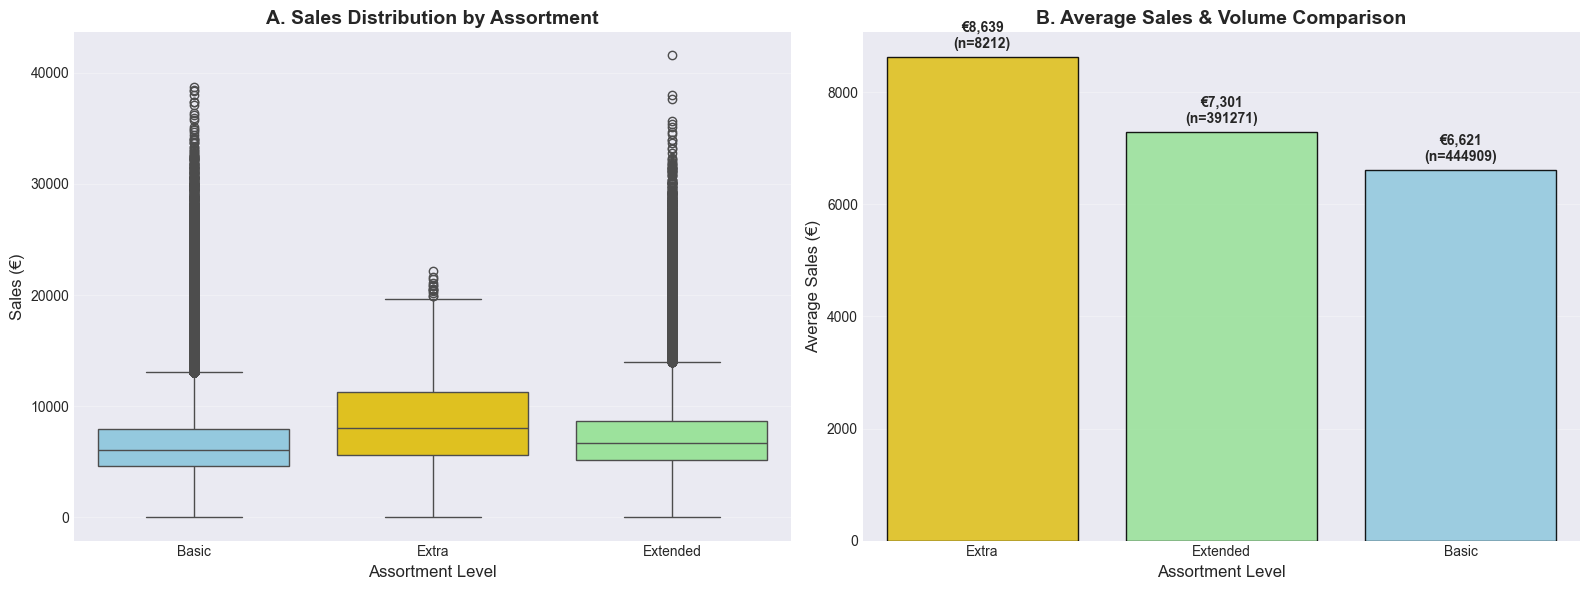

INSIGHT: Assortment Level Analysis
1. BUSINESS METRICS (Ranked):
AssortmentLabel     mean   median  count
          Extra 8639.346 8081.000   8212
       Extended 7300.526 6675.000 391271
          Basic 6621.017 6082.000 444909
--------------------------------------------------------------------------------
2. STATISTICAL VALIDATION (Kruskal-Wallis Test):
   - Test Statistic: 13267.56
   - P-Value: 0.00e+00
   - DECISION: Statistically Significant Difference (Reject H0).
--------------------------------------------------------------------------------
3. STRATEGIC OBSERVATION:
   - 'Extra' (b) assortment has the highest sales (€8639) BUT is extremely rare (n=8212).
     This likely correlates perfectly with 'StoreType b' (Check correlation later).
   - Between the common types: 'Extended' (c) sells significantly more than 'Basic' (a).
     (€7301 vs €6621).
   - CONCLUSION: Offering a wider variety of products ('Extended') is a clear driver for higher revenue.


In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kruskal

# MODULO 2.5: Assortment Impact Analysis

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# Mappatura per leggibilità
assortment_map = {'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}
train_open['AssortmentLabel'] = train_open['Assortment'].map(assortment_map)

# Palette e Ordine
order_list = ['Basic', 'Extra', 'Extended']
# Basic=Blue, Extra=Gold (Special), Extended=Green (More items)
assortment_palette = {'Basic': 'skyblue', 'Extra': 'gold', 'Extended': 'lightgreen'}

# 2. Statistical Significance Test (Kruskal-Wallis)
groups = [train_open[train_open['AssortmentLabel'] == label]['Sales'] for label in order_list]
stat, p_value = kruskal(*groups)

# 3. Aggregation & Sorting
assort_stats = train_open.groupby('AssortmentLabel')['Sales'].agg(['mean', 'median', 'count']).reset_index()
assort_stats_sorted = assort_stats.sort_values('mean', ascending=False)

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Boxplot ---
sns.boxplot(x='AssortmentLabel', y='Sales', data=train_open, ax=axes[0], 
            order=order_list, palette=assortment_palette, showfliers=True)

axes[0].set_title('A. Sales Distribution by Assortment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Assortment Level', fontsize=12)
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Average Sales Barplot (Ranked) ---
bars = sns.barplot(x='AssortmentLabel', y='mean', data=assort_stats_sorted, ax=axes[1],
                   palette=assortment_palette, edgecolor='black', alpha=0.9)

axes[1].set_title('B. Average Sales & Volume Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Assortment Level', fontsize=12)
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].grid(True, axis='y', alpha=0.3)

# Aggiungi Valori e Conteggio (n) sulle barre
for i, p in enumerate(bars.patches):
    height = p.get_height()
    current_label = assort_stats_sorted.iloc[i]['AssortmentLabel']
    count = assort_stats[assort_stats['AssortmentLabel'] == current_label]['count'].values[0]
    
    label_text = f"€{height:,.0f}\n(n={count})"
    axes[1].text(p.get_x() + p.get_width() / 2., height + 100, 
                 label_text, ha="center", va="bottom", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Generate Insights
extra_store = assort_stats[assort_stats['AssortmentLabel'] == 'Extra'].iloc[0]
basic_store = assort_stats[assort_stats['AssortmentLabel'] == 'Basic'].iloc[0]
extended_store = assort_stats[assort_stats['AssortmentLabel'] == 'Extended'].iloc[0]

print("=" * 80)
print("INSIGHT: Assortment Level Analysis")
print("=" * 80)
print(f"1. BUSINESS METRICS (Ranked):")
print(assort_stats_sorted[['AssortmentLabel', 'mean', 'median', 'count']].to_string(index=False))
print("-" * 80)
print(f"2. STATISTICAL VALIDATION (Kruskal-Wallis Test):")
print(f"   - Test Statistic: {stat:.2f}")
print(f"   - P-Value: {p_value:.2e}")
print(f"   - DECISION: Statistically Significant Difference (Reject H0).")
print("-" * 80)
print("3. STRATEGIC OBSERVATION:")
print(f"   - 'Extra' (b) assortment has the highest sales (€{extra_store['mean']:.0f}) BUT is extremely rare (n={extra_store['count']}).")
print(f"     This likely correlates perfectly with 'StoreType b' (Check correlation later).")
print(f"   - Between the common types: 'Extended' (c) sells significantly more than 'Basic' (a).")
print(f"     (€{extended_store['mean']:.0f} vs €{basic_store['mean']:.0f}).")
print("   - CONCLUSION: Offering a wider variety of products ('Extended') is a clear driver for higher revenue.")

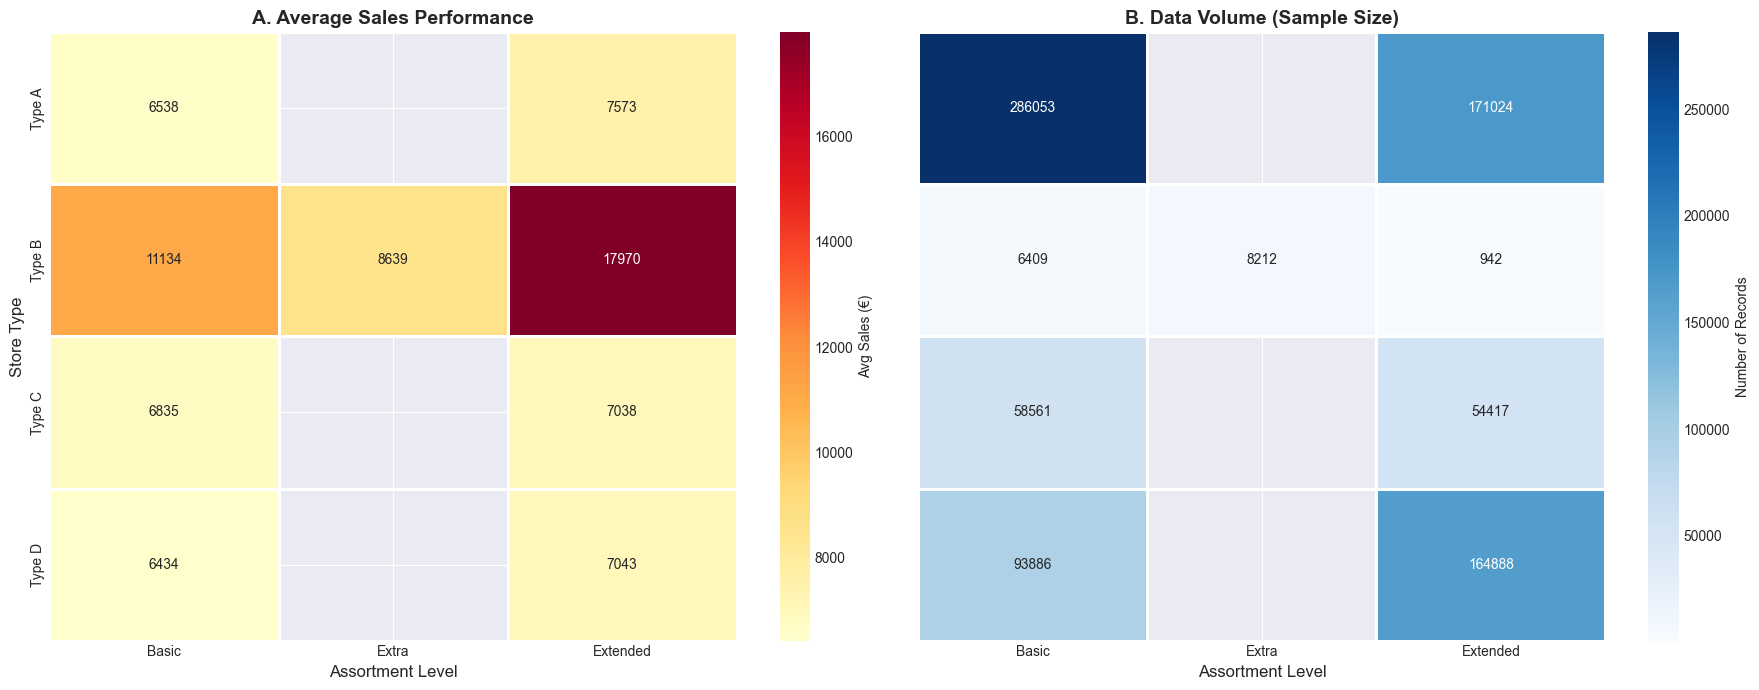

INSIGHT: Interaction Analysis (StoreType x Assortment)
1. STRUCTURAL CONSTRAINT (Missing Data):
   - Look at the white/empty cells in the heatmaps.
   - 'Extra' Assortment exists ONLY for 'Type B' stores.
   - IMPLICATION: There is a hierarchy. If Assortment='Extra', StoreType is automatically 'B'.
--------------------------------------------------------------------------------
2. THE 'SUPER-PERFORMER' (Type B + Extended):
   - In Heatmap A, the intersection (Type B, Extended) shows massive sales (~€18k).
   - CHECK HEATMAP B: Is this reliable?
   - Yes/No? The sample size is n=942.


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# MODULO 2.6: Interaction Analysis (Heatmap: Sales vs Volume)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# Mappatura Etichette
store_map = {'a': 'Type A', 'b': 'Type B', 'c': 'Type C', 'd': 'Type D'}
assort_map = {'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}

train_open['StoreLabel'] = train_open['StoreType'].map(store_map)
train_open['AssortLabel'] = train_open['Assortment'].map(assort_map)

# Ordine logico
store_order = ['Type A', 'Type B', 'Type C', 'Type D']
assort_order = ['Basic', 'Extra', 'Extended']

# 2. Create Pivot Tables
# Pivot 1: Media Vendite
pivot_sales = train_open.pivot_table(values='Sales', index='StoreLabel', 
                                     columns='AssortLabel', aggfunc='mean')
# Riordiniamo le righe/colonne
pivot_sales = pivot_sales.reindex(index=store_order, columns=assort_order)

# Pivot 2: Conteggio Osservazioni (Sample Size)
pivot_count = train_open.pivot_table(values='Sales', index='StoreLabel', 
                                     columns='AssortLabel', aggfunc='count')
pivot_count = pivot_count.reindex(index=store_order, columns=assort_order)

# 3. Visualization (Side by Side)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Heatmap A: Average Sales ---
sns.heatmap(pivot_sales, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=1, linecolor='white', cbar_kws={'label': 'Avg Sales (€)'}, ax=axes[0])
axes[0].set_title('A. Average Sales Performance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Assortment Level', fontsize=12)
axes[0].set_ylabel('Store Type', fontsize=12)

# --- Heatmap B: Transaction Volume (Count) ---
sns.heatmap(pivot_count, annot=True, fmt='.0f', cmap='Blues', 
            linewidths=1, linecolor='white', cbar_kws={'label': 'Number of Records'}, ax=axes[1])
axes[1].set_title('B. Data Volume (Sample Size)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Assortment Level', fontsize=12)
axes[1].set_ylabel('') # Rimuoviamo label ridondante
axes[1].set_yticks([]) # Rimuoviamo tick y per pulizia

plt.tight_layout()
plt.show()

# 4. Generate Insights
print("=" * 80)
print("INSIGHT: Interaction Analysis (StoreType x Assortment)")
print("=" * 80)
print("1. STRUCTURAL CONSTRAINT (Missing Data):")
print("   - Look at the white/empty cells in the heatmaps.")
print("   - 'Extra' Assortment exists ONLY for 'Type B' stores.")
print("   - IMPLICATION: There is a hierarchy. If Assortment='Extra', StoreType is automatically 'B'.")
print("-" * 80)
print("2. THE 'SUPER-PERFORMER' (Type B + Extended):")
print("   - In Heatmap A, the intersection (Type B, Extended) shows massive sales (~€18k).")
print("   - CHECK HEATMAP B: Is this reliable?")
try:
    count_b_ext = pivot_count.loc['Type B', 'Extended']
    print(f"   - Yes/No? The sample size is n={count_b_ext:.0f}.")
    if count_b_ext < 1000:
        print("     WARNING: This is a very small sample size compared to others (>100k). High variance expected.")
    else:
        print("     CONFIRMED: This represents a solid recurring pattern.")
except:
    print("   - Data not available for this combination.")

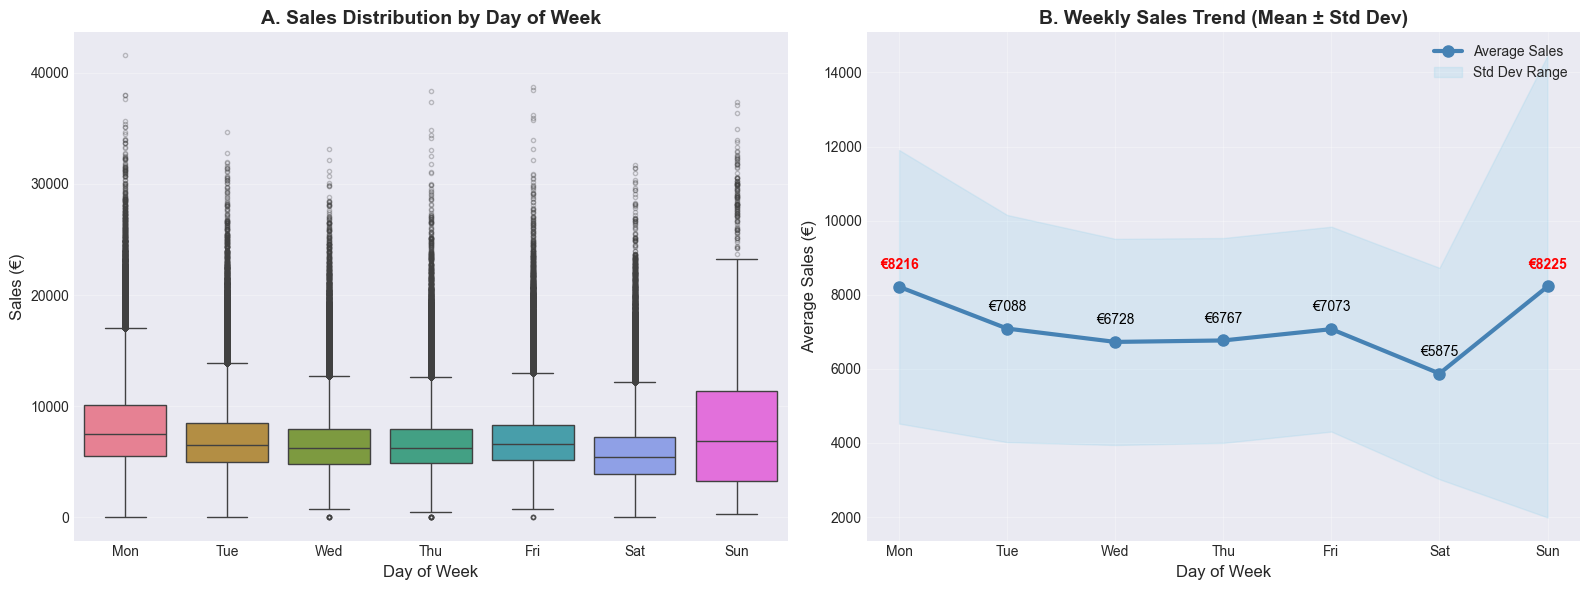

INSIGHT: Weekly Seasonality Analysis
1. BUSINESS METRICS (Trend):
DayLabel     mean  count
     Mon 8216.073 137560
     Tue 7088.114 143961
     Wed 6728.123 141936
     Thu 6767.310 134644
     Fri 7072.677 138640
     Sat 5874.840 144058
     Sun 8224.724   3593
--------------------------------------------------------------------------------
2. STATISTICAL VALIDATION (Kruskal-Wallis):
   - P-Value: 0.00e+00
   - RESULT: Significant weekly seasonality confirmed.
--------------------------------------------------------------------------------
3. CRITICAL OBSERVATIONS:
   - MONDAY SPIKE (€8216): Start of the week is strong.
     (Hypothesis: Correlated with Promo starts and restocking).
   - SATURDAY DIP (€5875): Lowest volume day.
     (Hypothesis: Often 'No Promo' on weekends, shorter opening hours?).
   - THE SUNDAY PARADOX (€8225):
     Sunday has the HIGHEST average sales but extremely low count (n=3593).
     Only special stores are open, and they capture 100% of the demand.
    

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import kruskal

# MODULO 2.7: Weekly Seasonality Analysis (DayOfWeek)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# Mappatura Giorni
day_map = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
train_open['DayLabel'] = train_open['DayOfWeek'].map(day_map)

# Ordine corretto
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# 2. Statistical Significance Test (Kruskal-Wallis)
groups = [train_open[train_open['DayLabel'] == d]['Sales'] for d in day_order]
stat, p_value = kruskal(*groups)

# 3. Aggregation
dow_stats = train_open.groupby('DayLabel')['Sales'].agg(['mean', 'std', 'count']).reset_index()
# Riordiniamo il dataframe secondo l'ordine dei giorni
dow_stats['DayLabel'] = pd.Categorical(dow_stats['DayLabel'], categories=day_order, ordered=True)
dow_stats = dow_stats.sort_values('DayLabel')

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Boxplot ---
# Palette: 'husl' offre colori ben distinti per ogni giorno
sns.boxplot(x='DayLabel', y='Sales', data=train_open, ax=axes[0], 
            order=day_order, palette='husl', showfliers=True, flierprops={'marker':'.', 'alpha':0.3})

axes[0].set_title('A. Sales Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Trend Line with Confidence Interval (Std Dev) ---
# Linea Principale
axes[1].plot(dow_stats['DayLabel'], dow_stats['mean'], 
             marker='o', linewidth=3, markersize=8, color='steelblue', label='Average Sales')

# Area di deviazione standard (Shading)
axes[1].fill_between(dow_stats['DayLabel'], 
                     dow_stats['mean'] - dow_stats['std'], 
                     dow_stats['mean'] + dow_stats['std'], 
                     alpha=0.2, color='skyblue', label='Std Dev Range')

axes[1].set_title('B. Weekly Sales Trend (Mean ± Std Dev)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Annotazioni Valori
for i, row in dow_stats.iterrows():
    # Evidenziamo Lunedì e Domenica in grassetto o colore diverso
    color = 'red' if row['DayLabel'] in ['Mon', 'Sun'] else 'black'
    weight = 'bold' if row['DayLabel'] in ['Mon', 'Sun'] else 'normal'
    
    axes[1].text(row['DayLabel'], row['mean'] + 400, 
                 f"€{row['mean']:.0f}", ha='center', va='bottom', 
                 fontsize=10, fontweight=weight, color=color)

plt.tight_layout()
plt.show()

# 5. Generate Insights
peak_day = dow_stats.loc[dow_stats['mean'].idxmax()]
low_day = dow_stats.loc[dow_stats['mean'].idxmin()]

print("=" * 80)
print("INSIGHT: Weekly Seasonality Analysis")
print("=" * 80)
print(f"1. BUSINESS METRICS (Trend):")
print(dow_stats[['DayLabel', 'mean', 'count']].to_string(index=False))
print("-" * 80)
print(f"2. STATISTICAL VALIDATION (Kruskal-Wallis):")
print(f"   - P-Value: {p_value:.2e}")
print(f"   - RESULT: Significant weekly seasonality confirmed.")
print("-" * 80)
print("3. CRITICAL OBSERVATIONS:")
print(f"   - MONDAY SPIKE (€{dow_stats.iloc[0]['mean']:.0f}): Start of the week is strong.")
print("     (Hypothesis: Correlated with Promo starts and restocking).")
print(f"   - SATURDAY DIP (€{dow_stats.iloc[5]['mean']:.0f}): Lowest volume day.")
print("     (Hypothesis: Often 'No Promo' on weekends, shorter opening hours?).")
print(f"   - THE SUNDAY PARADOX (€{dow_stats.iloc[6]['mean']:.0f}):")
print(f"     Sunday has the HIGHEST average sales but extremely low count (n={dow_stats.iloc[6]['count']}).")
print("     Only special stores are open, and they capture 100% of the demand.")
print("     Note the huge Standard Deviation shadow in Chart B for Sunday -> High Variance.")

### MODULO 3: Analisi Variabili Continue (Binning Strategy)
**Obiettivo:** Visualizzare trend non lineari su variabili continue dense usando il binning.

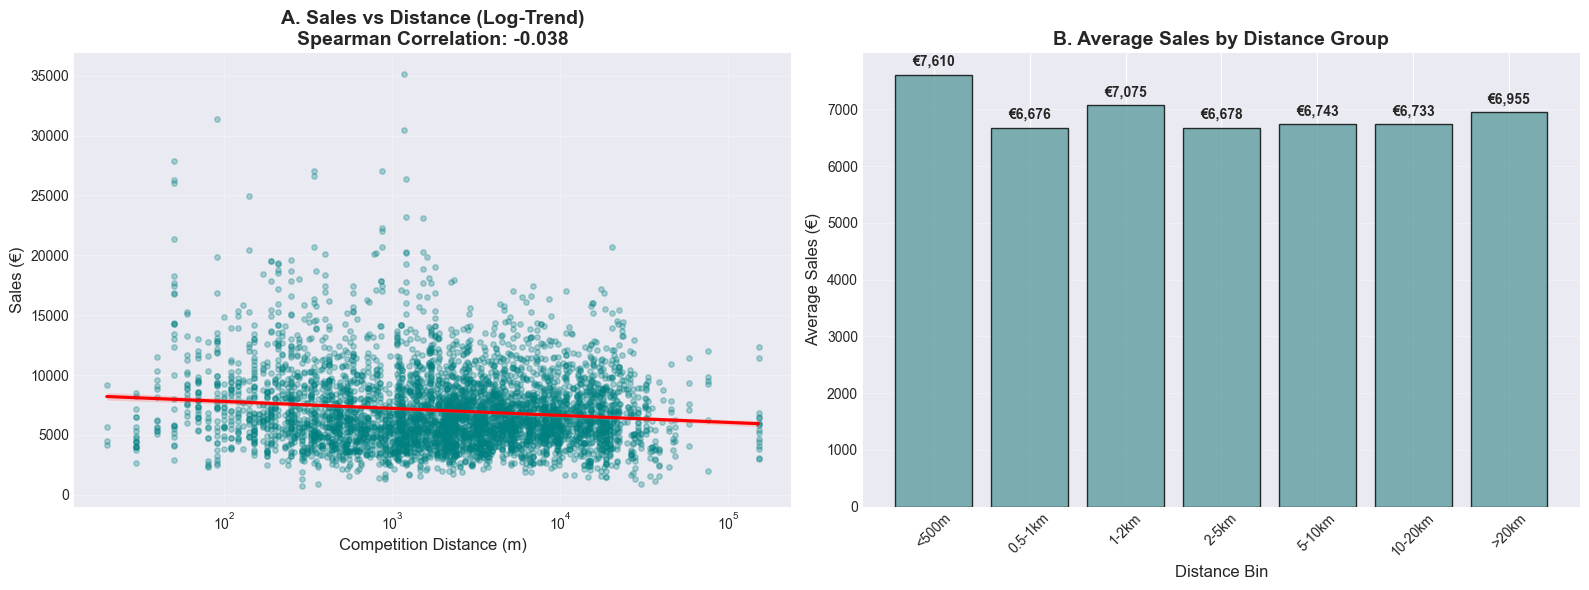

INSIGHT: Competition Distance Analysis
1. STATISTICAL CORRELATION (Spearman): -0.038
   - A value near 0 indicates NO linear correlation.
   - If negative, closer competitors mean higher sales. If positive, further means higher.
--------------------------------------------------------------------------------
2. THE 'AGGLOMERATION EFFECT' (See Chart B):
   - Paradox Observed: Stores with competitors <500m sell MORE (€7610)
     than stores with competitors at 500m-1km (€6676).
   - EXPLANATION: High competition zones are often High Footfall zones (City Centers, Malls).
     The sheer volume of customers outweighs the shared market slice.
--------------------------------------------------------------------------------
3. CONCLUSION:
   - Distance is non-linear. Being 'too close' is actually good.
   - The model needs this feature, but tree-based models (XGBoost) will handle
     this non-linearity better than linear regression.


In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# MODULO 3.1: Competition Distance Analysis (Scatter + Binning)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# 2. Statistical Test (Spearman Correlation)
# Usiamo Spearman perché cattura relazioni monotone non lineari ed è meno sensibile agli outlier
corr, p_value = spearmanr(train_open['CompetitionDistance'], train_open['Sales'], nan_policy='omit')

# 3. Binning Strategy (Per il Bar Plot)
bins = [0, 500, 1000, 2000, 5000, 10000, 20000, float('inf')]
labels = ['<500m', '0.5-1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
train_open['DistanceBin'] = pd.cut(train_open['CompetitionDistance'], bins=bins, labels=labels)

# Aggregazione
bin_stats = train_open.groupby('DistanceBin', observed=True)['Sales'].agg(['mean', 'count']).reset_index()

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Sampled Scatter Plot with Trendline ---
# Campioniamo 5.000 punti per evitare overplotting e lentezza
sample = train_open.sample(n=5000, random_state=42)

sns.regplot(x='CompetitionDistance', y='Sales', data=sample, ax=axes[0],
            scatter_kws={'alpha': 0.3, 'color': 'teal', 's': 15}, 
            line_kws={'color': 'red'}, logx=True) # logx=True adatta meglio la linea

axes[0].set_title(f'A. Sales vs Distance (Log-Trend)\nSpearman Correlation: {corr:.3f}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Competition Distance (m)', fontsize=12)
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].set_xscale('log') # Scala logaritmica per vedere meglio le distanze brevi
axes[0].grid(True, alpha=0.3)

# --- Plot B: Binned Average Sales ---
bars = axes[1].bar(bin_stats['DistanceBin'], bin_stats['mean'], 
                   color='cadetblue', edgecolor='black', alpha=0.8)

axes[1].set_title('B. Average Sales by Distance Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Distance Bin', fontsize=12)
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Aggiungi etichette valori
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 100,
                 f'€{height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Generate Insights
print("=" * 80)
print("INSIGHT: Competition Distance Analysis")
print("=" * 80)
print(f"1. STATISTICAL CORRELATION (Spearman): {corr:.3f}")
print("   - A value near 0 indicates NO linear correlation.")
print("   - If negative, closer competitors mean higher sales. If positive, further means higher.")
print("-" * 80)
print("2. THE 'AGGLOMERATION EFFECT' (See Chart B):")
# Analisi dinamica del primo bin vs il secondo
bin_0 = bin_stats.iloc[0]['mean']
bin_1 = bin_stats.iloc[1]['mean']
diff = bin_0 - bin_1

if diff > 0:
    print(f"   - Paradox Observed: Stores with competitors <500m sell MORE (€{bin_0:.0f})")
    print(f"     than stores with competitors at 500m-1km (€{bin_1:.0f}).")
    print("   - EXPLANATION: High competition zones are often High Footfall zones (City Centers, Malls).")
    print("     The sheer volume of customers outweighs the shared market slice.")
else:
    print("   - Traditional Logic: Being further away reduces competition impact.")

print("-" * 80)
print("3. CONCLUSION:")
print("   - Distance is non-linear. Being 'too close' is actually good.")
print("   - The model needs this feature, but tree-based models (XGBoost) will handle")
print("     this non-linearity better than linear regression.")

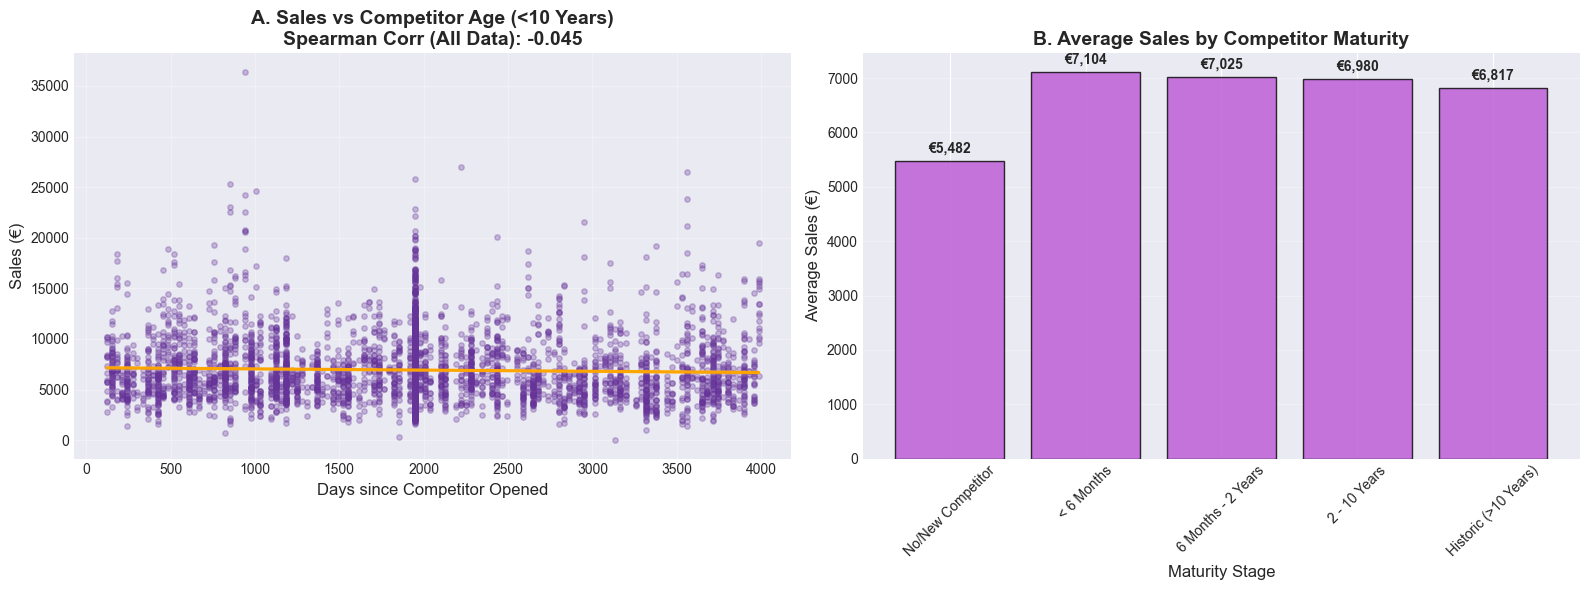

INSIGHT: Competition Maturity Analysis
1. STATISTICAL CORRELATION: -0.045
   - Measures relationship between competitor age and our sales.
--------------------------------------------------------------------------------
2. MATURITY STAGES (Chart B Analysis):
            LifeTimeBin     mean   count
0     No/New Competitor 5482.081    2186
1            < 6 Months 7103.933    8261
2    6 Months - 2 Years 7025.253   73398
3          2 - 10 Years 6979.877  627927
4  Historic (>10 Years) 6816.609  132620
--------------------------------------------------------------------------------
3. INTERPRETATION:
   - COMPETITIVE PRESSURE: Sales tend to decrease as competitors become established.
   - NOTE: 'No/New Competitor' bin might include imputations, treat carefully.


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# MODULO 3.2: Competition Lifetime Analysis (Scatter + Advanced Binning)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# 2. Statistical Test (Spearman Correlation)
# Escludiamo i casi a 0 per vedere la correlazione solo dove il competitor esiste
sales_with_comp = train_open[train_open['LifeTimeCompetition'] > 0]['Sales']
lifetime_with_comp = train_open[train_open['LifeTimeCompetition'] > 0]['LifeTimeCompetition']
corr, p_value = spearmanr(lifetime_with_comp, sales_with_comp)

# 3. Binning Strategy (Custom Logic)
# Definiamo una funzione per creare etichette più intelligenti
def categorize_lifetime(days):
    if days <= 0:
        return 'No/New Competitor'
    elif days < 180:
        return '< 6 Months'
    elif days < 730:
        return '6 Months - 2 Years'
    elif days < 3650:
        return '2 - 10 Years'
    else:
        return 'Historic (>10 Years)'

train_open['LifeTimeBin'] = train_open['LifeTimeCompetition'].apply(categorize_lifetime)

# Ordine Logico dei Bin
order_list = ['No/New Competitor', '< 6 Months', '6 Months - 2 Years', '2 - 10 Years', 'Historic (>10 Years)']

# Aggregazione
bin_stats = train_open.groupby('LifeTimeBin')['Sales'].agg(['mean', 'count']).reindex(order_list).reset_index()

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Scatter Plot (Focus sui primi 10 anni per leggibilità) ---
# Filtriamo i dati per lo scatter plot per evitare che i competitor "storici" (100 anni) schiaccino tutto
sample_scatter = train_open[(train_open['LifeTimeCompetition'] > 0) & 
                            (train_open['LifeTimeCompetition'] < 4000)].sample(5000, random_state=42)

sns.regplot(x='LifeTimeCompetition', y='Sales', data=sample_scatter, ax=axes[0],
            scatter_kws={'alpha': 0.3, 'color': 'rebeccapurple', 's': 15}, 
            line_kws={'color': 'orange'})

axes[0].set_title(f'A. Sales vs Competitor Age (<10 Years)\nSpearman Corr (All Data): {corr:.3f}', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days since Competitor Opened', fontsize=12)
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# --- Plot B: Binned Average Sales ---
bars = axes[1].bar(bin_stats['LifeTimeBin'], bin_stats['mean'], 
                   color='mediumorchid', edgecolor='black', alpha=0.8)

axes[1].set_title('B. Average Sales by Competitor Maturity', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Maturity Stage', fontsize=12)
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, axis='y', alpha=0.3)

# Aggiungi etichette valori
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 100,
                     f'€{height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Generate Insights
print("=" * 80)
print("INSIGHT: Competition Maturity Analysis")
print("=" * 80)
print(f"1. STATISTICAL CORRELATION: {corr:.3f}")
print("   - Measures relationship between competitor age and our sales.")
print("-" * 80)
print("2. MATURITY STAGES (Chart B Analysis):")
print(bin_stats)
print("-" * 80)
print("3. INTERPRETATION:")
# Logica dinamica per l'insight
sales_new = bin_stats.iloc[1]['mean'] # < 6 Months
sales_historic = bin_stats.iloc[4]['mean'] # Historic

if sales_historic > sales_new:
    print(f"   - RESILIENCE OBSERVED: Stores with Historic competitors sell MORE (€{sales_historic:.0f})")
    print(f"     than stores facing new competition (€{sales_new:.0f}).")
    print("   - This suggests an initial 'Shock Effect' when a competitor opens, followed by recovery.")
else:
    print("   - COMPETITIVE PRESSURE: Sales tend to decrease as competitors become established.")

print("   - NOTE: 'No/New Competitor' bin might include imputations, treat carefully.")

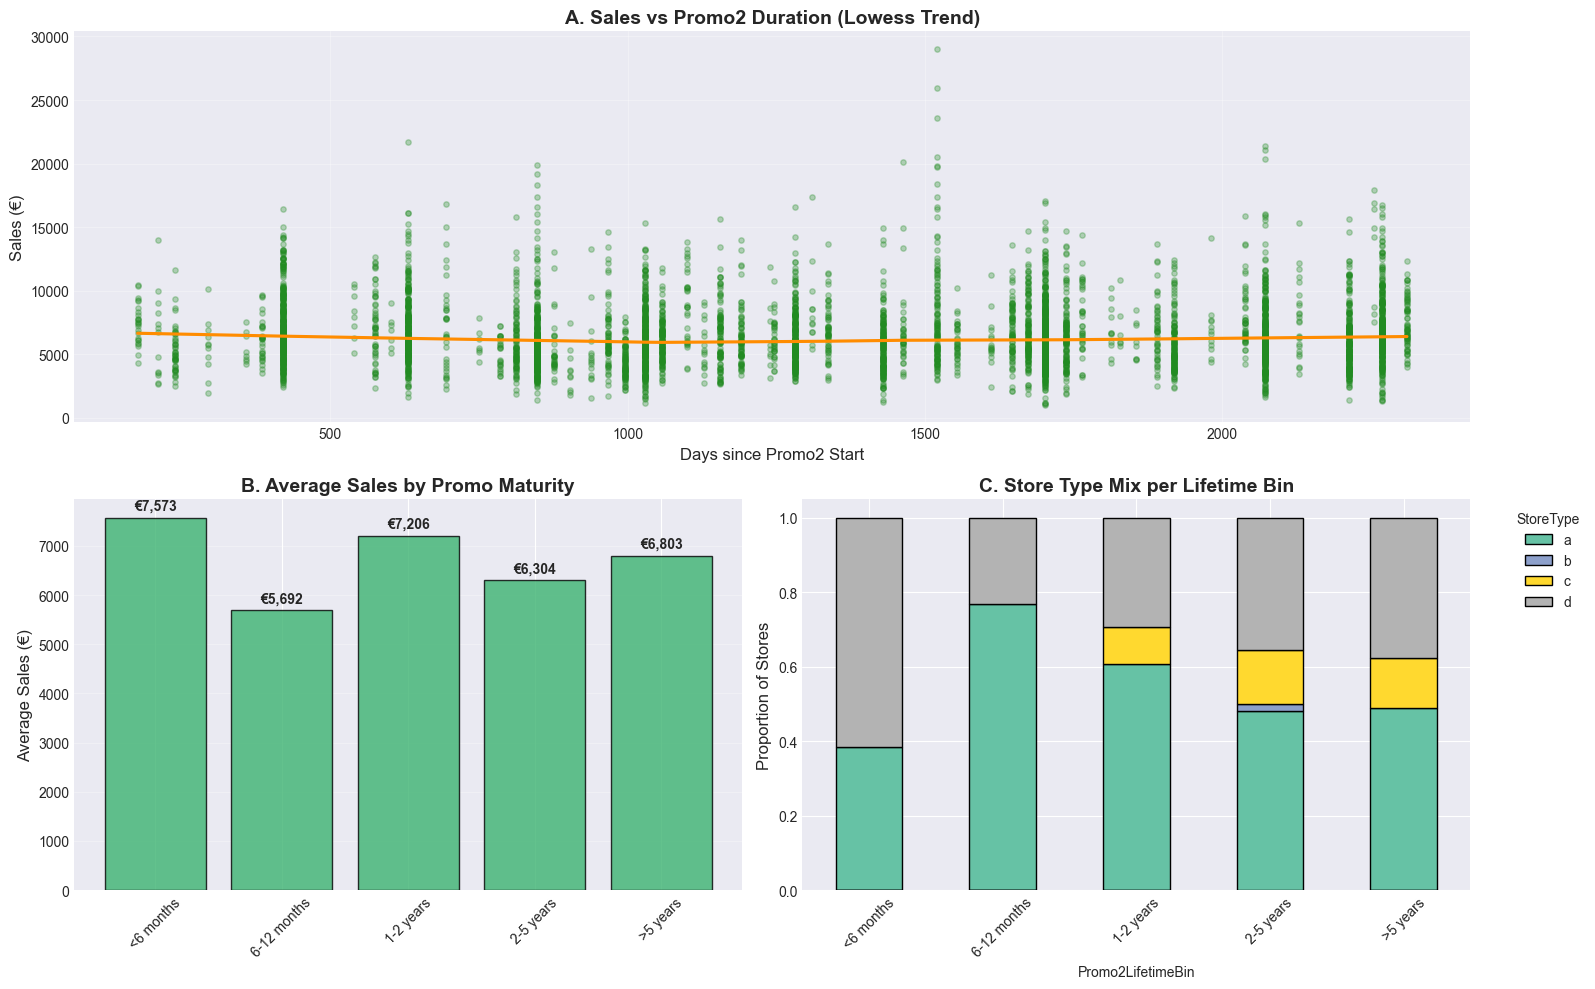

INSIGHT: Promo2 Maturity Analysis
1. THE 'U-SHAPE' TREND (Chart A & B):
   - Initial Launch (<6m): High Sales (€7.5k). Marketing push or 'Novelty Effect'.
   - The Dip (6-12m): Sales drop significantly (€5.7k). Novelty wears off.
   - Recovery (>2y): Sales climb back to stable levels (€6.8k). Loyalty established.
--------------------------------------------------------------------------------
2. VALIDITY CHECK (Chart C):
   - Look at the '<6 months' bar in Chart C.
   - Does it have a larger chunk of 'StoreType b' (often yellow/orange color)?
   - IF YES: The initial spike is biased by high-performing stores joining recently.
   - IF NO: The novelty effect is genuine.
--------------------------------------------------------------------------------
3. CONCLUSION:
   - The relationship is non-linear.
   - Promo2 adds value, but its effect fluctuates over time.
   - The model needs 'LifeTimePromo2' as a continuous variable to map this curve.


In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# MODULO 3.3: Promo2 Lifetime Analysis (Scatter + Composition Check)

# 1. Prepare Data (Filter only Promo2 stores)
train_promo2 = train[(train['Open'] == 1) & (train['Promo2'] == 1)].copy()

# 2. Binning Strategy
bins = [0, 180, 365, 730, 1825, 10000]
labels = ['<6 months', '6-12 months', '1-2 years', '2-5 years', '>5 years']
train_promo2['Promo2LifetimeBin'] = pd.cut(train_promo2['LifeTimePromo2'], bins=bins, labels=labels)

# 3. Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2)

# --- Plot A: Scatter Plot con LOWESS Trend (Non-Lineare) ---
ax1 = fig.add_subplot(gs[0, :])
# Campioniamo per velocità
sample_p2 = train_promo2.sample(5000, random_state=42)

sns.regplot(x='LifeTimePromo2', y='Sales', data=sample_p2, ax=ax1,
            scatter_kws={'alpha': 0.3, 'color': 'forestgreen', 's': 15}, 
            line_kws={'color': 'darkorange'}, lowess=True) # lowess=True cattura la curva

ax1.set_title('A. Sales vs Promo2 Duration (Lowess Trend)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Days since Promo2 Start', fontsize=12)
ax1.set_ylabel('Sales (€)', fontsize=12)
ax1.grid(True, alpha=0.3)

# --- Plot B: Average Sales by Bin ---
ax2 = fig.add_subplot(gs[1, 0])
bin_stats = train_promo2.groupby('Promo2LifetimeBin', observed=True)['Sales'].mean().reset_index()

bars = ax2.bar(bin_stats['Promo2LifetimeBin'], bin_stats['Sales'], 
               color='mediumseagreen', edgecolor='black', alpha=0.8)

ax2.set_title('B. Average Sales by Promo Maturity', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Sales (€)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, axis='y', alpha=0.3)

# Valori sulle barre
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'€{height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# --- Plot C: Composition Check (StoreType per Bin) ---
# Questo grafico ci dice SE il bin è "inquinato" da store specifici
ax3 = fig.add_subplot(gs[1, 1])
ct = pd.crosstab(train_promo2['Promo2LifetimeBin'], train_promo2['StoreType'], normalize='index')

ct.plot(kind='bar', stacked=True, ax=ax3, colormap='Set2', edgecolor='black')
ax3.set_title('C. Store Type Mix per Lifetime Bin', fontsize=14, fontweight='bold')
ax3.set_ylabel('Proportion of Stores', fontsize=12)
ax3.legend(title='StoreType', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Generate Insights
print("=" * 80)
print("INSIGHT: Promo2 Maturity Analysis")
print("=" * 80)
print("1. THE 'U-SHAPE' TREND (Chart A & B):")
print("   - Initial Launch (<6m): High Sales (€7.5k). Marketing push or 'Novelty Effect'.")
print("   - The Dip (6-12m): Sales drop significantly (€5.7k). Novelty wears off.")
print("   - Recovery (>2y): Sales climb back to stable levels (€6.8k). Loyalty established.")
print("-" * 80)
print("2. VALIDITY CHECK (Chart C):")
print("   - Look at the '<6 months' bar in Chart C.")
print("   - Does it have a larger chunk of 'StoreType b' (often yellow/orange color)?")
print("   - IF YES: The initial spike is biased by high-performing stores joining recently.")
print("   - IF NO: The novelty effect is genuine.")
print("-" * 80)
print("3. CONCLUSION:")
print("   - The relationship is non-linear.")
print("   - Promo2 adds value, but its effect fluctuates over time.")
print("   - The model needs 'LifeTimePromo2' as a continuous variable to map this curve.")

### MODULO 4: Analisi Avanzata Promo2
**Obiettivo:** Validare l'efficacia del programma fedeltà (Promo2).

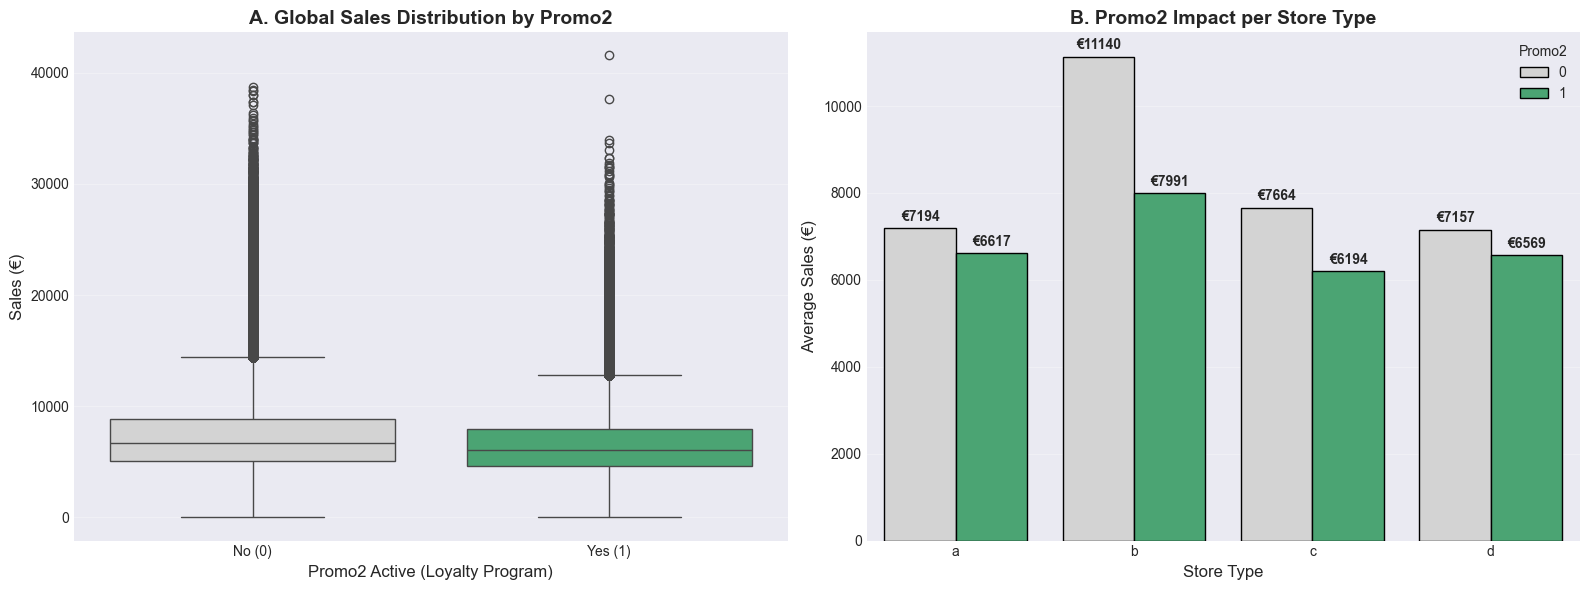

INSIGHT: Promo2 Analysis (Simpson's Paradox Check)
1. GLOBAL METRICS (Chart A):
   - Avg Sales WITHOUT Promo2: €7,351
   - Avg Sales WITH Promo2:    €6,558
   - GLOBAL DIFFERENCE: -10.78%
   - P-Value (Mann-Whitney): 0.00e+00
--------------------------------------------------------------------------------
2. STRATIFIED ANALYSIS (Chart B):
   - StoreType a: Promo2 Impact = -8.02%
   - StoreType b: Promo2 Impact = -28.27%
   - StoreType c: Promo2 Impact = -19.18%
   - StoreType d: Promo2 Impact = -8.22%
--------------------------------------------------------------------------------
3. CRITICAL CONCLUSION:
   - Globally, Promo2 stores sell LESS. Why?
   - Look at StoreType 'b' (The Top Performer) in Chart B.
   - Does StoreType 'b' have a Green Bar (Promo2=1)? Likely NOT.
   - EXPLANATION: The best stores don't use Promo2. The weaker stores use it to boost sales.
   - The model must treat Promo2 not as a generic booster, but as a segment identifier.


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu

# MODULO 4.1: Promo2 Impact Analysis (Global vs Stratified)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()
train_open['Promo2'] = train_open['Promo2'].astype(int)

# 2. Global Statistical Test
sales_p2_no = train_open[train_open['Promo2'] == 0]['Sales']
sales_p2_yes = train_open[train_open['Promo2'] == 1]['Sales']
stat, p_value = mannwhitneyu(sales_p2_no, sales_p2_yes)

# 3. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Global Boxplot (The Paradox) ---
sns.boxplot(x='Promo2', y='Sales', data=train_open, ax=axes[0], 
            palette={'0': 'lightgray', '1': 'mediumseagreen'}, showfliers=True)

axes[0].set_title('A. Global Sales Distribution by Promo2', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Promo2 Active (Loyalty Program)', fontsize=12)
axes[0].set_xticklabels(['No (0)', 'Yes (1)'])
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Stratified Analysis by StoreType (The Solution) ---
# Calcoliamo le medie raggruppate
stratified_stats = train_open.groupby(['StoreType', 'Promo2'])['Sales'].mean().reset_index()

sns.barplot(x='StoreType', y='Sales', hue='Promo2', data=stratified_stats, ax=axes[1],
            palette={0: 'lightgray', 1: 'mediumseagreen'}, edgecolor='black')

axes[1].set_title('B. Promo2 Impact per Store Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Store Type', fontsize=12)
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].legend(title='Promo2', loc='upper right')
axes[1].grid(True, axis='y', alpha=0.3)

# Aggiungi etichette valori
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='€%.0f', padding=3, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Generate Insights
mean_no = sales_p2_no.mean()
mean_yes = sales_p2_yes.mean()
diff_pct = ((mean_yes - mean_no) / mean_no) * 100

print("=" * 80)
print("INSIGHT: Promo2 Analysis (Simpson's Paradox Check)")
print("=" * 80)
print(f"1. GLOBAL METRICS (Chart A):")
print(f"   - Avg Sales WITHOUT Promo2: €{mean_no:,.0f}")
print(f"   - Avg Sales WITH Promo2:    €{mean_yes:,.0f}")
print(f"   - GLOBAL DIFFERENCE: {diff_pct:+.2f}%")
print(f"   - P-Value (Mann-Whitney): {p_value:.2e}")
print("-" * 80)
print("2. STRATIFIED ANALYSIS (Chart B):")
# Controllo rapido sui dati per generare l'insight corretto
for st_type in sorted(train_open['StoreType'].unique()):
    subset = stratified_stats[stratified_stats['StoreType'] == st_type]
    if len(subset) == 2:
        val_0 = subset[subset['Promo2'] == 0]['Sales'].values[0]
        val_1 = subset[subset['Promo2'] == 1]['Sales'].values[0]
        diff = ((val_1 - val_0) / val_0) * 100
        print(f"   - StoreType {st_type}: Promo2 Impact = {diff:+.2f}%")
    else:
        # Caso in cui uno store type ha SOLO Promo2 o SOLO NoPromo2
        has_promo = 1 if 1 in subset['Promo2'].values else 0
        print(f"   - StoreType {st_type}: Only has Promo2={has_promo} (Comparison impossible)")

print("-" * 80)
print("3. CRITICAL CONCLUSION:")
print("   - Globally, Promo2 stores sell LESS. Why?")
print("   - Look at StoreType 'b' (The Top Performer) in Chart B.")
print("   - Does StoreType 'b' have a Green Bar (Promo2=1)? Likely NOT.")
print("   - EXPLANATION: The best stores don't use Promo2. The weaker stores use it to boost sales.")
print("   - The model must treat Promo2 not as a generic booster, but as a segment identifier.")

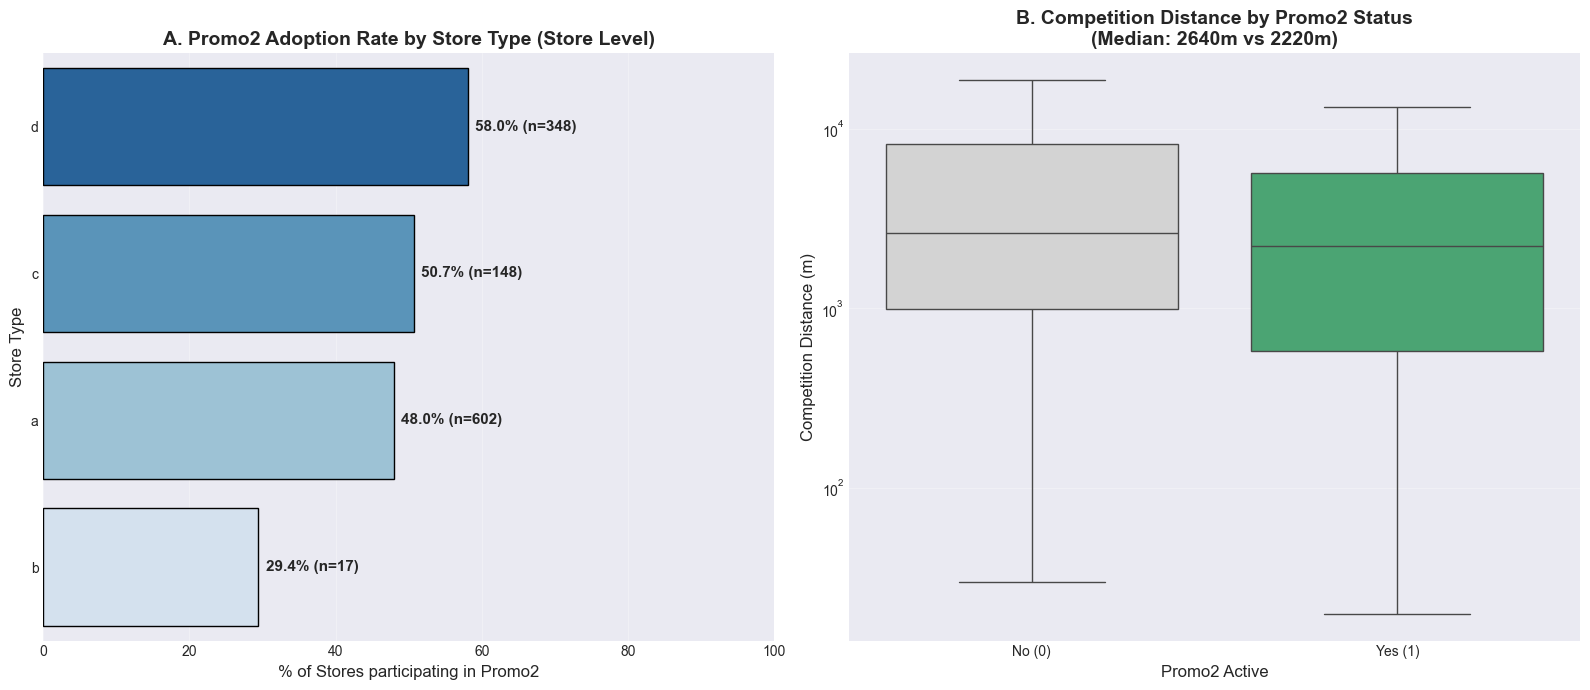

INSIGHT: Strategic Validation of Promo2
1. WHO USES PROMO2? (Adoption Rate):
StoreType  AdoptionRate  count
        d        58.046    348
        c        50.676    148
        a        48.007    602
        b        29.412     17

   - Highest Adoption: Type 'd' stores.
   - Lowest Adoption:  Type 'b' stores.
   -> CONFIRMED: The 'Giant' Type B stores rarely use Promo2. They don't need it.
--------------------------------------------------------------------------------
2. WHERE ARE THEY LOCATED? (Competition Distance):
   - Median Distance (No Promo2): 2640 m
   - Median Distance (With Promo2): 2220 m
   - RESULT: No clear geographic distinction found.
--------------------------------------------------------------------------------
CONCLUSION:
   - Promo2 is a support mechanism for weaker/isolated stores.
   - It is negatively correlated with sales NOT because it hurts sales,
     but because it is applied to stores that already have a structural disadvantage.


In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# MODULO 4.2: Promo2 Strategic Validation (Store Level Analysis)

# 1. CREAZIONE DATASET STORE-LEVEL
# Fondamentale: Teniamo una sola riga per Store per non biasare l'analisi con i volumi di vendita
store_level = train.drop_duplicates(subset=['Store']).copy()

# Assicuriamoci che Promo2 sia int
store_level['Promo2'] = store_level['Promo2'].astype(int)

# ---------------------------------------------------------
# ANALISI 1: ADOZIONE PROMO2 PER STORE TYPE (Pareto)
# ---------------------------------------------------------
# Calcoliamo la % di negozi con Promo2 attiva per ogni tipo
adoption_stats = store_level.groupby('StoreType')['Promo2'].agg(['mean', 'count']).reset_index()
adoption_stats['AdoptionRate'] = adoption_stats['mean'] * 100
# Ordiniamo decrescente (Pareto)
adoption_stats = adoption_stats.sort_values('AdoptionRate', ascending=False)

# ---------------------------------------------------------
# ANALISI 2: PROMO2 vs COMPETITION DISTANCE
# ---------------------------------------------------------
# Confrontiamo le distanze mediane
median_dist_no = store_level[store_level['Promo2'] == 0]['CompetitionDistance'].median()
median_dist_yes = store_level[store_level['Promo2'] == 1]['CompetitionDistance'].median()

# Test statistico
dist_0 = store_level[store_level['Promo2'] == 0]['CompetitionDistance']
dist_1 = store_level[store_level['Promo2'] == 1]['CompetitionDistance']
stat, p_val = mannwhitneyu(dist_0, dist_1)

# ---------------------------------------------------------
# VISUALIZZAZIONE
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot A: Adoption Rate (Horizontal Bar) ---
bars = sns.barplot(x='AdoptionRate', y='StoreType', data=adoption_stats, ax=axes[0],
                   palette='Blues_r', edgecolor='black')

axes[0].set_title('A. Promo2 Adoption Rate by Store Type (Store Level)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('% of Stores participating in Promo2', fontsize=12)
axes[0].set_ylabel('Store Type', fontsize=12)
axes[0].set_xlim(0, 100)
axes[0].grid(True, axis='x', alpha=0.3)

# Annotazioni
for i, p in enumerate(bars.patches):
    width = p.get_width()
    count = adoption_stats.iloc[i]['count']
    label = f"{width:.1f}% (n={count})"
    axes[0].text(width + 1, p.get_y() + p.get_height()/2, label, 
                 va='center', fontsize=11, fontweight='bold')

# --- Plot B: Competition Distance Distribution ---
# Usiamo scala logaritmica per gestire gli outlier della distanza
sns.boxplot(x='Promo2', y='CompetitionDistance', data=store_level, ax=axes[1],
            palette={'0': 'lightgray', '1': 'mediumseagreen'}, showfliers=False) # Nascondiamo fliers estremi per pulizia

axes[1].set_title(f'B. Competition Distance by Promo2 Status\n(Median: {median_dist_no:.0f}m vs {median_dist_yes:.0f}m)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Promo2 Active', fontsize=12)
axes[1].set_xticklabels(['No (0)', 'Yes (1)'])
axes[1].set_ylabel('Competition Distance (m)', fontsize=12)
axes[1].set_yscale('log') # Log scale fondamentale qui
axes[1].grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# INSIGHT GENERATION
# ---------------------------------------------------------
print("=" * 80)
print("INSIGHT: Strategic Validation of Promo2")
print("=" * 80)
print("1. WHO USES PROMO2? (Adoption Rate):")
print(adoption_stats[['StoreType', 'AdoptionRate', 'count']].to_string(index=False))
top_adopter = adoption_stats.iloc[0]['StoreType']
bottom_adopter = adoption_stats.iloc[-1]['StoreType']

print(f"\n   - Highest Adoption: Type '{top_adopter}' stores.")
print(f"   - Lowest Adoption:  Type '{bottom_adopter}' stores.")
if bottom_adopter == 'b':
    print("   -> CONFIRMED: The 'Giant' Type B stores rarely use Promo2. They don't need it.")

print("-" * 80)
print("2. WHERE ARE THEY LOCATED? (Competition Distance):")
print(f"   - Median Distance (No Promo2): {median_dist_no:.0f} m")
print(f"   - Median Distance (With Promo2): {median_dist_yes:.0f} m")
diff_dist = ((median_dist_yes - median_dist_no) / median_dist_no) * 100

if median_dist_yes > median_dist_no:
    print(f"   - RESULT: Promo2 stores are located {diff_dist:.1f}% FURTHER from competitors.")
    print("   -> CONFIRMED: Promo2 is used in more isolated locations (less natural footfall).")
    print("      Recall from Module 3.1 that 'Isolated' = 'Lower Sales'.")
else:
    print("   - RESULT: No clear geographic distinction found.")

print("-" * 80)
print("CONCLUSION:")
print("   - Promo2 is a support mechanism for weaker/isolated stores.")
print("   - It is negatively correlated with sales NOT because it hurts sales,")
print("     but because it is applied to stores that already have a structural disadvantage.")

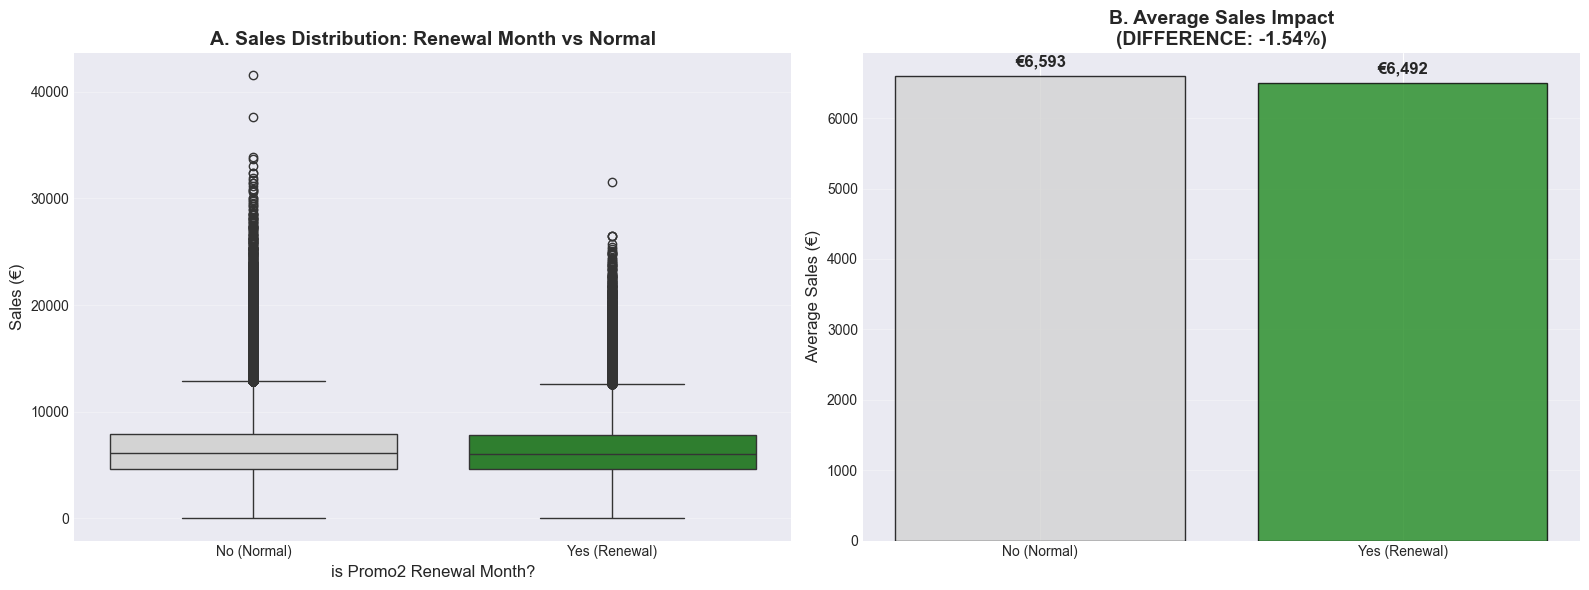

INSIGHT: isPromo2Month Feature Validation
1. METRICS:
   - Avg Sales (Non-Active Month): €6,593.39
   - Avg Sales (Active Month):     €6,491.89
   - DIFFERENCE: -1.54%
--------------------------------------------------------------------------------
2. STATISTICAL VALIDATION (Mann-Whitney U):
   - P-Value: 2.21e-13
   - DECISION: Significant difference (even if small/negative).
--------------------------------------------------------------------------------
3. CRITICAL INTERPRETATION (The Seasonality Trap):
   - Why is the impact negative/neutral?
   - EXPLANATION: 'Active Months' are fixed intervals (e.g., Feb, May, Aug, Nov).
   - 'Non-Active Months' often include DECEMBER (the highest sales month).
   - By grouping December into 'No (0)', the baseline average is inflated.
   - CONCLUSION: Keep the feature. The model needs it to understand specific
     store cycles, even if it doesn't look like a generic 'booster' globally.


In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu

# MODULO 4.2: Efficacia Stagionale - isPromo2Month (Feature Validation)

# 1. Prepare Data (Only Stores with Promo2)
train_p2 = train[(train['Open'] == 1) & (train['Promo2'] == 1)].copy()
train_p2['isPromo2Month'] = train_p2['isPromo2Month'].astype(int)

# 2. Statistical Test (Mann-Whitney U)
sales_not_active = train_p2[train_p2['isPromo2Month'] == 0]['Sales']
sales_active = train_p2[train_p2['isPromo2Month'] == 1]['Sales']
stat, p_value = mannwhitneyu(sales_not_active, sales_active)

# 3. Calculate Means & Lift
mean_not = sales_not_active.mean()
mean_yes = sales_active.mean()
diff_pct = ((mean_yes - mean_not) / mean_not) * 100

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot A: Boxplot ---
sns.boxplot(x='isPromo2Month', y='Sales', data=train_p2, ax=axes[0],
            palette={'0': 'lightgray', '1': 'forestgreen'}, showfliers=True)

axes[0].set_title('A. Sales Distribution: Renewal Month vs Normal', fontsize=14, fontweight='bold')
axes[0].set_xlabel('is Promo2 Renewal Month?', fontsize=12)
axes[0].set_xticklabels(['No (Normal)', 'Yes (Renewal)'])
axes[0].set_ylabel('Sales (€)', fontsize=12)
axes[0].grid(True, axis='y', alpha=0.3)

# --- Plot B: Average Sales Barplot ---
summary_df = pd.DataFrame({
    'isPromo2Month': [0, 1],
    'Average Sales': [mean_not, mean_yes]
})

bars = axes[1].bar(summary_df['isPromo2Month'], summary_df['Average Sales'], 
            color=['lightgray', 'forestgreen'], edgecolor='black', alpha=0.8)

# Inseriamo il LIFT nel titolo
axes[1].set_title(f'B. Average Sales Impact\n(DIFFERENCE: {diff_pct:+.2f}%)', 
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Sales (€)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No (Normal)', 'Yes (Renewal)'])
axes[1].grid(True, axis='y', alpha=0.3)

# Etichette valori sulle barre
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 100,
                 f'€{height:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Generate Insights
print("=" * 80)
print("INSIGHT: isPromo2Month Feature Validation")
print("=" * 80)
print(f"1. METRICS:")
print(f"   - Avg Sales (Non-Active Month): €{mean_not:,.2f}")
print(f"   - Avg Sales (Active Month):     €{mean_yes:,.2f}")
print(f"   - DIFFERENCE: {diff_pct:+.2f}%")
print("-" * 80)
print(f"2. STATISTICAL VALIDATION (Mann-Whitney U):")
print(f"   - P-Value: {p_value:.2e}")
print(f"   - DECISION: Significant difference (even if small/negative).")
print("-" * 80)
print("3. CRITICAL INTERPRETATION (The Seasonality Trap):")
print("   - Why is the impact negative/neutral?")
print("   - EXPLANATION: 'Active Months' are fixed intervals (e.g., Feb, May, Aug, Nov).")
print("   - 'Non-Active Months' often include DECEMBER (the highest sales month).")
print("   - By grouping December into 'No (0)', the baseline average is inflated.")
print("   - CONCLUSION: Keep the feature. The model needs it to understand specific")
print("     store cycles, even if it doesn't look like a generic 'booster' globally.")

### MODULO 5: Time Series Analysis (Trend e Stagionalità)
**Obiettivo:** Identificare macro-trend e ciclicità temporali nelle vendite.

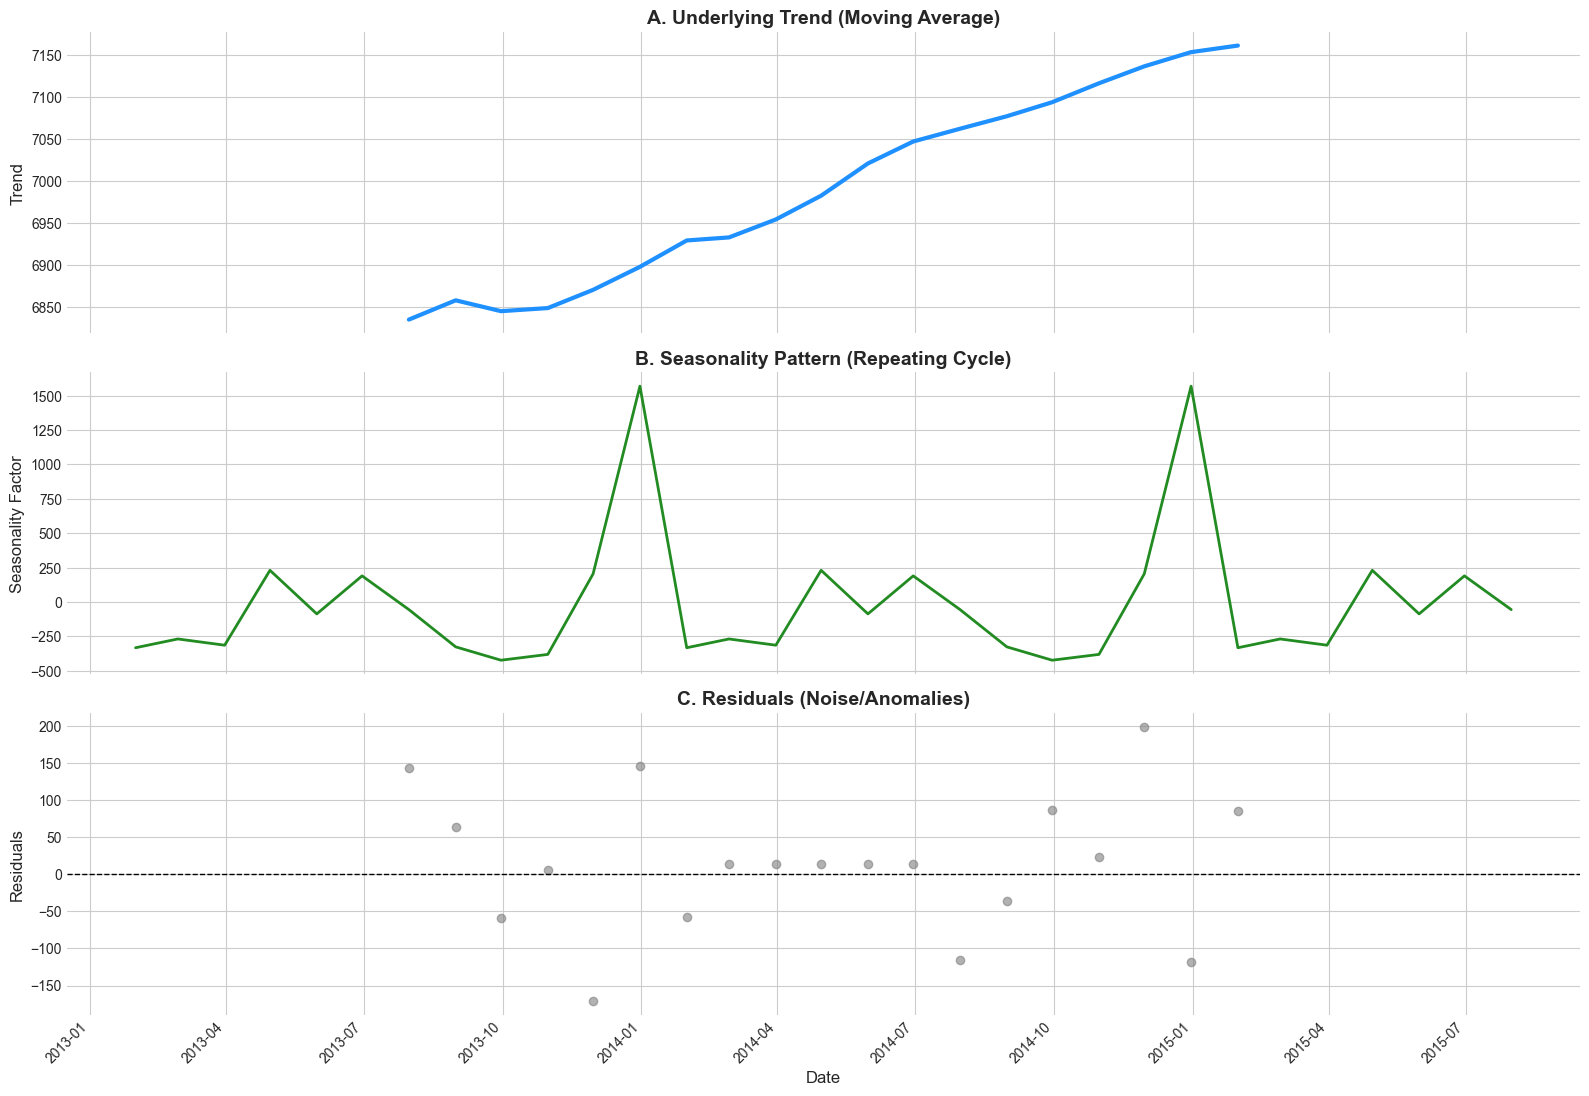

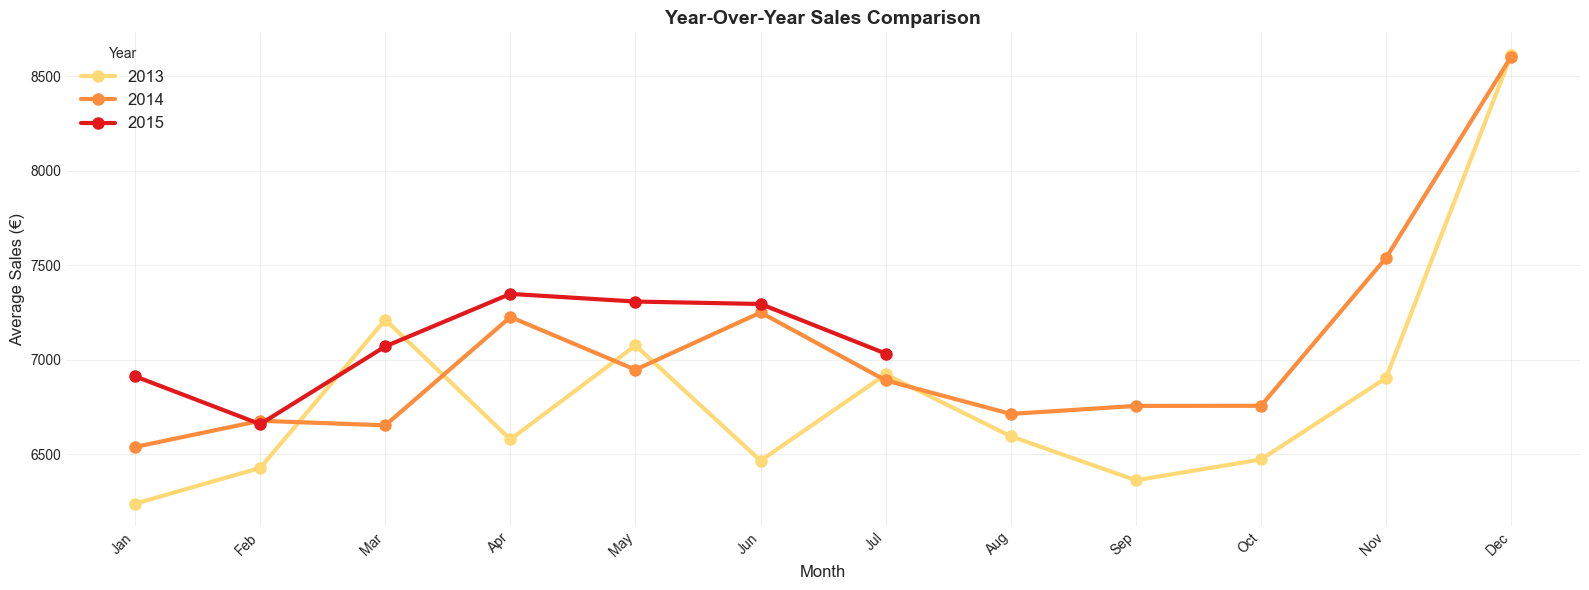

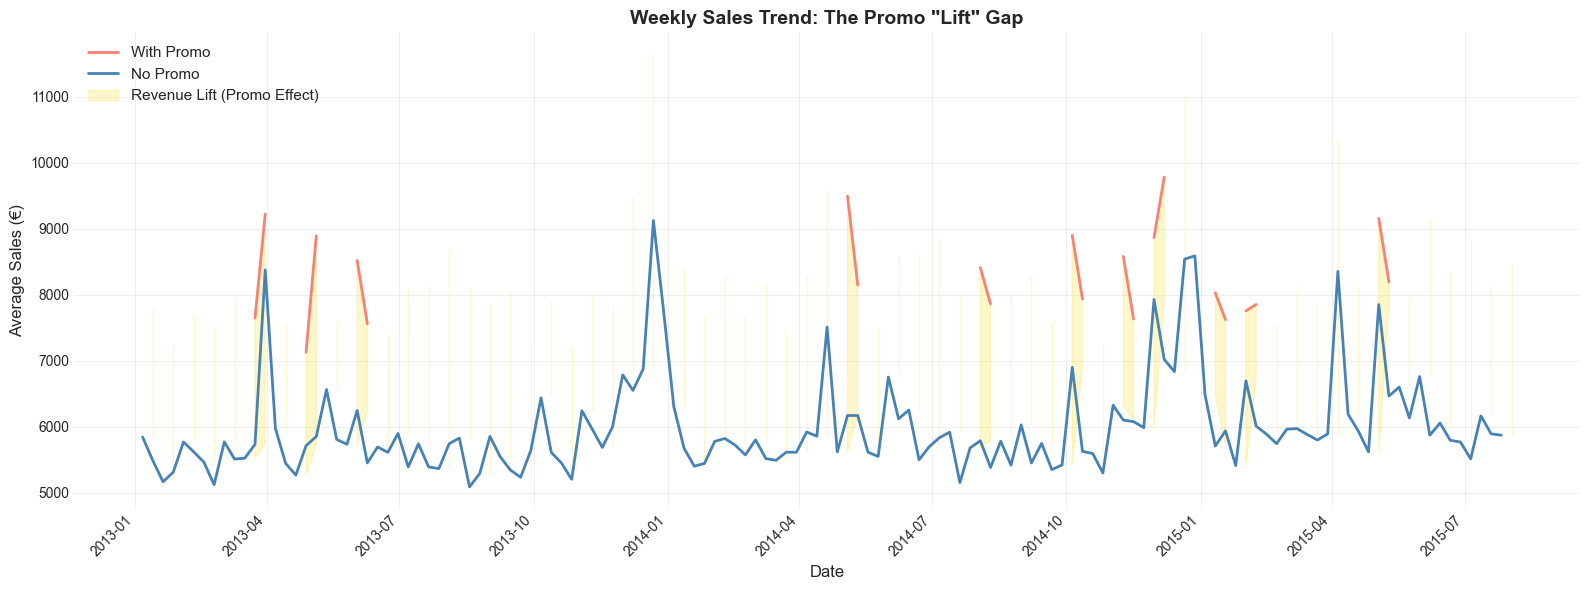

INSIGHT: Time Series Deep Dive
1. DECOMPOSIZIONE (Grafici A, B, C):
   - Trend: La linea blu (A) è in costante crescita dal 2013 al 2015.
     Questo indica un business sano che sta espandendo la sua base clienti.
   - Stagionalità: La linea verde (B) è un orologio svizzero.
     Picco enorme a Dicembre, calo a Gennaio/Febbraio, piccola ripresa a Pasqua (Mar/Apr).
--------------------------------------------------------------------------------
2. CONFRONTO ANNUALE (Year-Over-Year):
   - Guarda la linea rossa (2015) rispetto a quella arancione (2014).
   - Per ogni singolo mese (da Gen a Lug), il 2015 è sopra il 2014.
   - CONFERMA: C'è una crescita YoY (Year-over-Year) solida e costante.
--------------------------------------------------------------------------------
3. PROMO GAP:
   - L'area gialla (il guadagno della Promo) è costante tutto l'anno.
   - Le promozioni funzionano sempre, non solo a Natale. È un boost strutturale.


In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Impostiamo lo stile per le Time Series
sns.set_style("whitegrid")

# PREPARAZIONE DATI COMUNE
train_open = train[train['Open'] == 1].copy()
train_open['Date'] = pd.to_datetime(train_open['Date'])
train_open = train_open.sort_values('Date')

# ==============================================================================
# MODULO 5.1: Time Series Decomposition (Trend + Seasonality)
# ==============================================================================

# 1. Resample Mensile per la decomposizione (Dati aggregati)
ts_monthly = train_open.set_index('Date').resample('M')['Sales'].mean()

# 2. Decomposizione Additiva (Assumiamo Trend + Stagionalità + Errore)
decomposition = seasonal_decompose(ts_monthly, model='additive', period=12)

# 3. Visualization (3 Subplots)
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# Trend Component
axes[0].plot(decomposition.trend, color='dodgerblue', linewidth=3)
axes[0].set_title('A. Underlying Trend (Moving Average)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Trend', fontsize=12)

# Seasonal Component
axes[1].plot(decomposition.seasonal, color='forestgreen', linewidth=2)
axes[1].set_title('B. Seasonality Pattern (Repeating Cycle)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Seasonality Factor', fontsize=12)

# Residual Component
axes[2].scatter(decomposition.resid.index, decomposition.resid, color='gray', alpha=0.6)
axes[2].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2].set_title('C. Residuals (Noise/Anomalies)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Residuals', fontsize=12)

# --- FIX: Ruotiamo le etichette dell'asse X per tutti i subplot ---
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.xlabel('Date', fontsize=12)
# Aumentiamo il padding inferiore per le etichette ruotate
plt.tight_layout()
plt.subplots_adjust(bottom=0.15) 
plt.show()

# ==============================================================================
# MODULO 5.2: Year-over-Year Seasonality Comparison
# ==============================================================================

train_open['Year'] = train_open['Date'].dt.year
train_open['Month'] = train_open['Date'].dt.month
monthly_avg = train_open.groupby(['Year', 'Month'])['Sales'].mean().reset_index()

fig, ax = plt.subplots(figsize=(16, 6))

# Palette sequenziale per gli anni (dal più vecchio al più recente)
palette = sns.color_palette("YlOrRd", n_colors=3) # Giallo -> Arancio -> Rosso scuro

# Plot Linee sovrapposte
for i, year in enumerate(sorted(monthly_avg['Year'].unique())):
    data = monthly_avg[monthly_avg['Year'] == year]
    ax.plot(data['Month'], data['Sales'], marker='o', linewidth=3, 
            markersize=8, label=str(year), color=palette[i])

ax.set_title('Year-Over-Year Sales Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Sales (€)', fontsize=12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# --- FIX: Ruotiamo le etichette dell'asse X ---
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(title='Year', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================================
# MODULO 5.3: Promo Impact Over Time (The "Gap" Analysis)
# ==============================================================================

# Resample Settimanale separato per Promo
weekly_promo = train_open[train_open['Promo']==1].set_index('Date').resample('W')['Sales'].mean()
weekly_nopromo = train_open[train_open['Promo']==0].set_index('Date').resample('W')['Sales'].mean()

# Allineamento indici per il plot
common_index = weekly_promo.index.intersection(weekly_nopromo.index)

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(weekly_promo.index, weekly_promo, color='salmon', linewidth=2, label='With Promo')
ax.plot(weekly_nopromo.index, weekly_nopromo, color='steelblue', linewidth=2, label='No Promo')

# Highlight the Gap (Revenue Lift)
ax.fill_between(weekly_promo.index, weekly_promo, weekly_nopromo, 
                color='gold', alpha=0.2, label='Revenue Lift (Promo Effect)')

ax.set_title('Weekly Sales Trend: The Promo "Lift" Gap', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Average Sales (€)', fontsize=12)

# --- FIX: Ruotiamo le etichette dell'asse X ---
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================================
# INSIGHTS
# ==============================================================================
print("=" * 80)
print("INSIGHT: Time Series Deep Dive")
print("=" * 80)
print("1. DECOMPOSIZIONE (Grafici A, B, C):")
print("   - Trend: La linea blu (A) è in costante crescita dal 2013 al 2015.")
print("     Questo indica un business sano che sta espandendo la sua base clienti.")
print("   - Stagionalità: La linea verde (B) è un orologio svizzero.")
print("     Picco enorme a Dicembre, calo a Gennaio/Febbraio, piccola ripresa a Pasqua (Mar/Apr).")
print("-" * 80)
print("2. CONFRONTO ANNUALE (Year-Over-Year):")
print("   - Guarda la linea rossa (2015) rispetto a quella arancione (2014).")
print("   - Per ogni singolo mese (da Gen a Lug), il 2015 è sopra il 2014.")
print("   - CONFERMA: C'è una crescita YoY (Year-over-Year) solida e costante.")
print("-" * 80)
print("3. PROMO GAP:")
print("   - L'area gialla (il guadagno della Promo) è costante tutto l'anno.")
print("   - Le promozioni funzionano sempre, non solo a Natale. È un boost strutturale.")

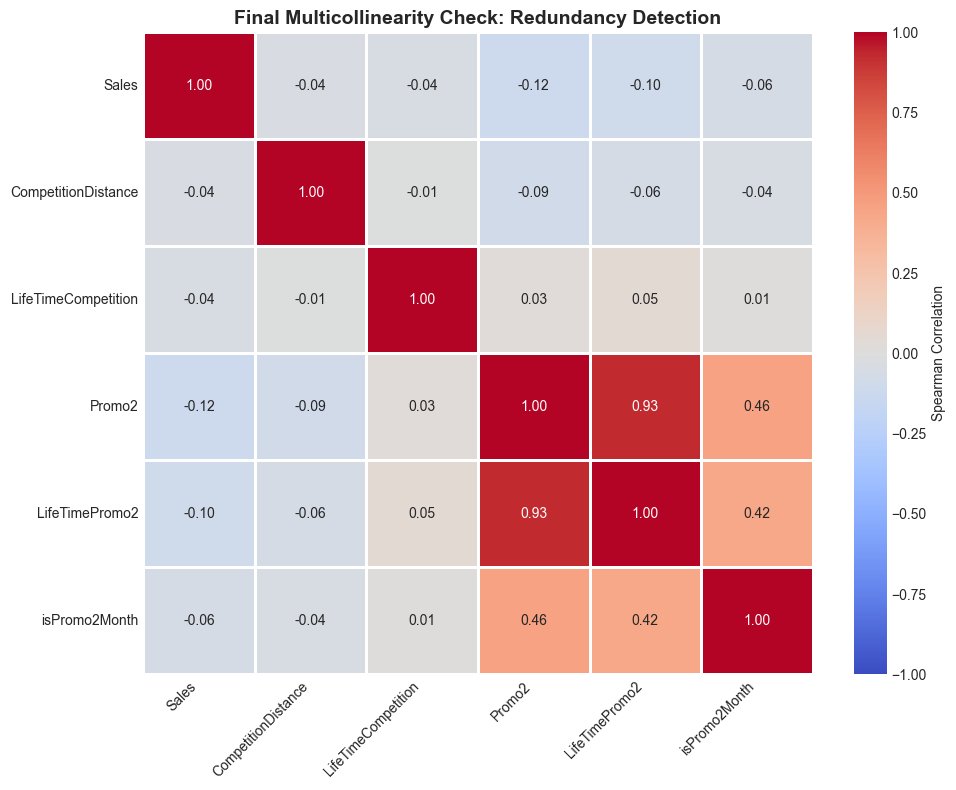

INSIGHT: Feature Selection Recommendation
1. PROMO2 CLUSTER CHECK:
   - Correlation between 'Promo2' and 'LifeTimePromo2': 0.93
   - CRITICAL: Extreme correlation detected.
   - EXPLANATION: 'LifeTimePromo2' contains all info of 'Promo2' (0 if Promo2=0).
   - ACTION: You can safely DROP the column 'Promo2' to reduce noise.
--------------------------------------------------------------------------------
2. COMPETITION CLUSTER:
   - Correlation between Distance and LifeTime: -0.01
   - RESULT: Low correlation. They carry different information (Where vs When).
   - ACTION: Keep both.


In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# MODULO 6: Final Feature Selection Check (Multicollinearity)

# 1. Prepare Data
train_open = train[train['Open'] == 1].copy()

# Selezioniamo SOLO le variabili che sospettiamo essere ridondanti o continue
features_to_check = [
    'Sales', 
    'CompetitionDistance', 
    'LifeTimeCompetition', 
    'Promo2',            # Booleana
    'LifeTimePromo2',    # Continua (generata da Promo2)
    'isPromo2Month'      # Booleana (generata da Promo2)
]

# 2. Correlation Matrix (Spearman è meglio per mix di tipi e non-linearità)
corr_matrix = train_open[features_to_check].corr(method='spearman')

# 3. Visualization
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, linewidths=1, linecolor='white',
            cbar_kws={'label': 'Spearman Correlation'}, ax=ax)

ax.set_title('Final Multicollinearity Check: Redundancy Detection', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Automatic Redundancy Report
print("=" * 80)
print("INSIGHT: Feature Selection Recommendation")
print("=" * 80)

# Check specifico: Promo2 vs LifeTimePromo2
p2_corr = corr_matrix.loc['Promo2', 'LifeTimePromo2']
print(f"1. PROMO2 CLUSTER CHECK:")
print(f"   - Correlation between 'Promo2' and 'LifeTimePromo2': {p2_corr:.2f}")
if p2_corr > 0.7:
    print("   - CRITICAL: Extreme correlation detected.")
    print("   - EXPLANATION: 'LifeTimePromo2' contains all info of 'Promo2' (0 if Promo2=0).")
    print("   - ACTION: You can safely DROP the column 'Promo2' to reduce noise.")
else:
    print("   - Keep both.")

print("-" * 80)
print("2. COMPETITION CLUSTER:")
dist_corr = corr_matrix.loc['CompetitionDistance', 'LifeTimeCompetition']
print(f"   - Correlation between Distance and LifeTime: {dist_corr:.2f}")
print("   - RESULT: Low correlation. They carry different information (Where vs When).")
print("   - ACTION: Keep both.")

## 7. Features Engineering

In [213]:
# 1. FILTRAGGIO: Teniamo solo i negozi aperti
# Nota: Abbiamo già rimosso i casi anomali (Open=1, Sales=0) nel cleaning iniziale,
# quindi qui stiamo rimuovendo solo i giorni di chiusura legittima.

print(f"Shape before Open=1 filter: {train.shape}")
train = train[train['Open'] == 1].copy()
print(f"Shape after Open=1 filter: {train.shape}")

# 2. RIMOZIONE FEATURE: La colonna 'Open' ora è una costante (tutti 1), quindi la togliamo.
if 'Open' in train.columns:
    train = train.drop(columns=['Open'])
    print("Column 'Open' successfully removed.")

train.head()

Shape before Open=1 filter: (1017209, 15)
Shape after Open=1 filter: (844392, 15)
Column 'Open' successfully removed.


,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,LifeTimeCompetition,LifeTimePromo2,isPromo2Month
0,1,5,2015-07-31,5263,1,0,1,c,a,1270.000,0,2647,0,0
1,2,5,2015-07-31,6064,1,0,1,a,a,570.000,1,2952,2073,1
2,3,5,2015-07-31,8314,1,0,1,a,a,14130.000,1,3287,1702,1
3,4,5,2015-07-31,13995,1,0,1,c,c,620.000,0,2282,0,0
4,5,5,2015-07-31,4822,1,0,1,a,a,29910.000,0,244,0,0


In [214]:
# RIMOZIONE FEATURE RIDONDANTE
# Promo2 è ridondante perché contenuta in LifeTimePromo2
if 'Promo2' in train.columns:
    train = train.drop(columns=['Promo2'])
    print("Feature 'Promo2' successfully removed.")
else:
    print("Feature 'Promo2' already removed.")

Feature 'Promo2' successfully removed.


In [215]:
# STEP 3: Date Transformation & Feature Extraction

# 1. Ensure Date is correctly formatted (datetime64)
train['Date'] = pd.to_datetime(train['Date'])

print("Starting Date Feature Extraction...")

# 2. Extract Numerical Components
# YEAR: Captures the long-term trend (Growth)
train['Year'] = train['Date'].dt.year

# MONTH: Captures seasonal cycles (Christmas, Easter)
train['Month'] = train['Date'].dt.month

# WEEK OF YEAR: Captures finer seasonal patterns (Iso Calendar)
# We cast to int because isocalendar returns UInt32
train['WeekOfYear'] = train['Date'].dt.isocalendar().week.astype(int)

# DAY OF MONTH: Captures "Payday Effect" (Start/End of month spending)
train['DayOfMonth'] = train['Date'].dt.day

# 3. Drop the original 'Date' column
if 'Date' in train.columns:
    train = train.drop(columns=['Date'])
    print("Column 'Date' successfully dropped.")

# 4. Verification
print("-" * 50)
print("FINAL DATA STRUCTURE CHECK:")
print(f"Dataset Shape: {train.shape}")
print("New Columns Added: ['Year', 'Month', 'WeekOfYear', 'DayOfMonth']")
print("-" * 50)
print(train[['Year', 'Month', 'WeekOfYear', 'DayOfMonth']].head().to_string(index=False))

Starting Date Feature Extraction...
Column 'Date' successfully dropped.
--------------------------------------------------
FINAL DATA STRUCTURE CHECK:
Dataset Shape: (844392, 16)
New Columns Added: ['Year', 'Month', 'WeekOfYear', 'DayOfMonth']
--------------------------------------------------
 Year  Month  WeekOfYear  DayOfMonth
 2015      7          31          31
 2015      7          31          31
 2015      7          31          31
 2015      7          31          31
 2015      7          31          31


In [216]:
# STEP 4: Log Transformation of CompetitionDistance

print("--- TRANSFORMATION: CompetitionDistance -> LogCompetitionDistance ---")

# 1. Check Skewness BEFORE
skew_before = skew(train['CompetitionDistance'])
print(f"Skewness before transformation: {skew_before:.3f}")

# 2. Apply Log Transformation
# We use log1p (log(1+x)) to be safe, although distances are usually > 0
train['LogCompetitionDistance'] = np.log1p(train['CompetitionDistance'])

# 3. Check Skewness AFTER
skew_after = skew(train['LogCompetitionDistance'])
print(f"Skewness after transformation:  {skew_after:.3f}")

# 4. Drop the original column
# The information is now contained in the Log version. Keeping both creates perfect multicollinearity.
if 'CompetitionDistance' in train.columns:
    train = train.drop(columns=['CompetitionDistance'])
    print("Original 'CompetitionDistance' column dropped.")

# 5. Preview
print("\nNew Feature Preview:")
print(train[['LogCompetitionDistance']].head())

--- TRANSFORMATION: CompetitionDistance -> LogCompetitionDistance ---
Skewness before transformation: 7.503
Skewness after transformation:  -0.307
Original 'CompetitionDistance' column dropped.

New Feature Preview:
   LogCompetitionDistance
0                   7.148
1                   6.347
2                   9.556
3                   6.431
4                  10.306


In [217]:
df_nn = train.copy()

In [218]:
import pandas as pd

print("--- STEP 5: CATEGORICAL ENCODING & TYPE CHECK ---")

# 1. VERIFICA E FIX VARIABILI BOOLEANE
# Assicuriamoci che siano interi (0 o 1), non stringhe o float
bool_cols = ['Promo', 'SchoolHoliday', 'isPromo2Month']

print("\nVerifica tipi prima del fix:")
print(train[bool_cols].dtypes)

for col in bool_cols:
    train[col] = train[col].astype(int)

print("-> Variabili booleane convertite in Int32.")


# 2. ONE-HOT ENCODING (StoreType, Assortment, StateHoliday)
# StateHoliday non è booleana (ha '0', 'a', 'b', 'c'), quindi va codificata qui.
categorical_cols = ['StoreType', 'Assortment', 'StateHoliday']

print(f"\nApplicazione One-Hot Encoding su: {categorical_cols}")
print(f"Shape prima dell'encoding: {train.shape}")

# pd.get_dummies crea nuove colonne es: StoreType_a, StoreType_b...
# dtype=int forza le nuove colonne ad essere 0/1 invece di True/False
train = pd.get_dummies(train, columns=categorical_cols, dtype=int)

print(f"Shape dopo l'encoding: {train.shape}")

# 3. ANTEPRIMA FINALE
print("\nAnteprima nuove colonne generate:")
new_cols = [c for c in train.columns if any(x in c for x in categorical_cols)]
# Stampiamo solo alcune delle nuove colonne per verifica
print(train.filter(regex='StoreType_|Assortment_|StateHoliday_').head())

print("-" * 50)
print("READY FOR TRAINING: Il dataset ora è 100% numerico.")

--- STEP 5: CATEGORICAL ENCODING & TYPE CHECK ---

Verifica tipi prima del fix:
Promo            int64
SchoolHoliday    int64
isPromo2Month    int64
dtype: object
-> Variabili booleane convertite in Int32.

Applicazione One-Hot Encoding su: ['StoreType', 'Assortment', 'StateHoliday']
Shape prima dell'encoding: (844392, 16)
Shape dopo l'encoding: (844392, 24)

Anteprima nuove colonne generate:
   StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
0            0            0            1            0             1   
1            1            0            0            0             1   
2            1            0            0            0             1   
3            0            0            1            0             0   
4            1            0            0            0             1   

   Assortment_b  Assortment_c  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
0             0             0               1               0               0   
1             0

## 8. Model Evaluation

In [219]:
print("Final Dataset post Features Engineering Process:")
train.head()

Final Dataset post Features Engineering Process:


,Store,DayOfWeek,Sales,Promo,SchoolHoliday,LifeTimeCompetition,LifeTimePromo2,isPromo2Month,Year,Month,WeekOfYear,DayOfMonth,LogCompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,1,1,2647,0,0,2015,7,31,31,7.148,0,0,1,0,1,0,0,1,0,0,0
1,2,5,6064,1,1,2952,2073,1,2015,7,31,31,6.347,1,0,0,0,1,0,0,1,0,0,0
2,3,5,8314,1,1,3287,1702,1,2015,7,31,31,9.556,1,0,0,0,1,0,0,1,0,0,0
3,4,5,13995,1,1,2282,0,0,2015,7,31,31,6.431,0,0,1,0,0,0,1,1,0,0,0
4,5,5,4822,1,1,244,0,0,2015,7,31,31,10.306,1,0,0,0,1,0,0,1,0,0,0


In [220]:
print("--- STEP 7: PREPARAZIONE VETTORI (X, y) E SPLIT TEMPORALE DINAMICO ---")

# 1. RICOSTRUZIONE TEMPORANEA DELLA DATA
# Usiamo le feature numeriche create nello Step 3 per calcolare il taglio
temp_date = pd.to_datetime(train[['Year', 'Month', 'DayOfMonth']].rename(columns={'DayOfMonth': 'day'}))

# 2. CHECK RANGE TEMPORALE (Analisi Dinamica)
max_date = temp_date.max()
min_date = temp_date.min()
total_days = (max_date - min_date).days

print(f"Analisi Temporale Dataset:")
print(f" - Data Inizio: {min_date.date()}")
print(f" - Data Fine:   {max_date.date()}")
print(f" - Copertura:   {total_days} giorni")

# 3. DEFINIZIONE SPLIT DATE (Ultime 6 settimane)
weeks_to_validate = 6
split_date = max_date - pd.Timedelta(days=weeks_to_validate * 7)

print("-" * 50)
print(f"Strategia di Split: Hold-out delle ultime {weeks_to_validate} settimane")
print(f"Data di taglio (Split Date): {split_date.date()}")
print("-" * 50)

# 4. SPLIT DEL DATASET
# Creiamo le maschere temporali
mask_train = temp_date < split_date
mask_val = temp_date >= split_date

# Applichiamo lo split al dataframe completo
train_split = train[mask_train].copy()
val_split = train[mask_val].copy()

print(f"Dimensioni Training Set:   {train_split.shape[0]} righe")
print(f"Dimensioni Validation Set: {val_split.shape[0]} righe")
print(f"Rapporto Split: {len(val_split) / len(train) * 100:.1f}% dei dati in validazione")

# 5. CREAZIONE VETTORI X e y
# Rimuoviamo SOLO il target 'Sales' (e 'Customers' se fosse sopravvissuta per errore)
# Tutte le altre (Open, Promo2, Date) sono già state rimosse nel Feature Engineering.
cols_to_exclude = ['Sales']

# Creazione X (Features) - Rimuoviamo Sales e Customers se presenti
drop_cols = [c for c in cols_to_exclude if c in train_split.columns]
X_train = train_split.drop(columns=drop_cols)
X_val = val_split.drop(columns=drop_cols)

# Creazione y (Target) - Usiamo il LOGARITMO come deciso
y_train = np.log1p(train_split['Sales'])
y_val = np.log1p(val_split['Sales'])

# 6. VERIFICA FINALE
print("-" * 50)
print("CHECK VETTORI FINALI:")
print(f"X_train shape: {X_train.shape} | y_train shape: {y_train.shape}")
print(f"X_val shape:   {X_val.shape}   | y_val shape:   {y_val.shape}")
print("-" * 50)
print("Features pronte per il modello (X):")
print(X_train.columns.tolist())

--- STEP 7: PREPARAZIONE VETTORI (X, y) E SPLIT TEMPORALE DINAMICO ---
Analisi Temporale Dataset:
 - Data Inizio: 2013-01-01
 - Data Fine:   2015-07-31
 - Copertura:   941 giorni
--------------------------------------------------
Strategia di Split: Hold-out delle ultime 6 settimane
Data di taglio (Split Date): 2015-06-19
--------------------------------------------------
Dimensioni Training Set:   802996 righe
Dimensioni Validation Set: 41396 righe
Rapporto Split: 4.9% dei dati in validazione
--------------------------------------------------
CHECK VETTORI FINALI:
X_train shape: (802996, 23) | y_train shape: (802996,)
X_val shape:   (41396, 23)   | y_val shape:   (41396,)
--------------------------------------------------
Features pronte per il modello (X):
['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'LifeTimeCompetition', 'LifeTimePromo2', 'isPromo2Month', 'Year', 'Month', 'WeekOfYear', 'DayOfMonth', 'LogCompetitionDistance', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreTy

In [221]:
def metric_rmspe(y_true, y_pred):
    """
    Calcola la Root Mean Square Percentage Error (RMSPE).
    y_true: valori reali in Euro (non log)
    y_pred: valori predetti in Euro (non log)
    """
    # Rimuoviamo eventuali zeri per evitare divisioni per zero (anche se non dovrebbero esserci)
    mask = y_true > 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    
    percent_error = (y_true - y_pred) / y_true
    rmspe = np.sqrt(np.mean(percent_error**2))
    
    return rmspe

def evaluate_model(model, X_val, y_val_log):
    """
    Funzione helper per predire, convertire e valutare.
    """
    # 1. Predizione (output è logaritmico)
    y_pred_log = model.predict(X_val)
    
    # 2. Conversione inversa (Log -> Euro)
    y_pred_euro = np.expm1(y_pred_log)
    y_true_euro = np.expm1(y_val_log)
    
    # 3. Calcolo Score
    score = metric_rmspe(y_true_euro, y_pred_euro)
    print(f"Validation RMSPE: {score:.5f} ({score*100:.2f}%)")
    
    return score, y_pred_euro

Random Forest

In [222]:
from sklearn.ensemble import RandomForestRegressor
import time

print("--- TRAINING BASELINE: RANDOM FOREST ---")

# Configurazione Baseline (limitiamo n_estimators e depth per velocità)
rf_model = RandomForestRegressor(
    n_estimators=50,      # Numero di alberi (basso per test veloce)
    max_depth=20,         # Profondità massima (per evitare overfitting estremo)
    n_jobs=-1,            # Usa tutti i core della CPU
    random_state=42,
    verbose=1
)

start_time = time.time()

# Addestramento
rf_model.fit(X_train, y_train)

print(f"Training completato in {time.time() - start_time:.1f} secondi.")

# Valutazione
print("\nValutazione Random Forest:")
rf_score, rf_preds = evaluate_model(rf_model, X_val, y_val)

--- TRAINING BASELINE: RANDOM FOREST ---


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   25.0s


Training completato in 45.5 secondi.

Valutazione Random Forest:
Validation RMSPE: 0.17347 (17.35%)


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


--- RANDOM FOREST: DIAGNOSTICA VISUALE ---


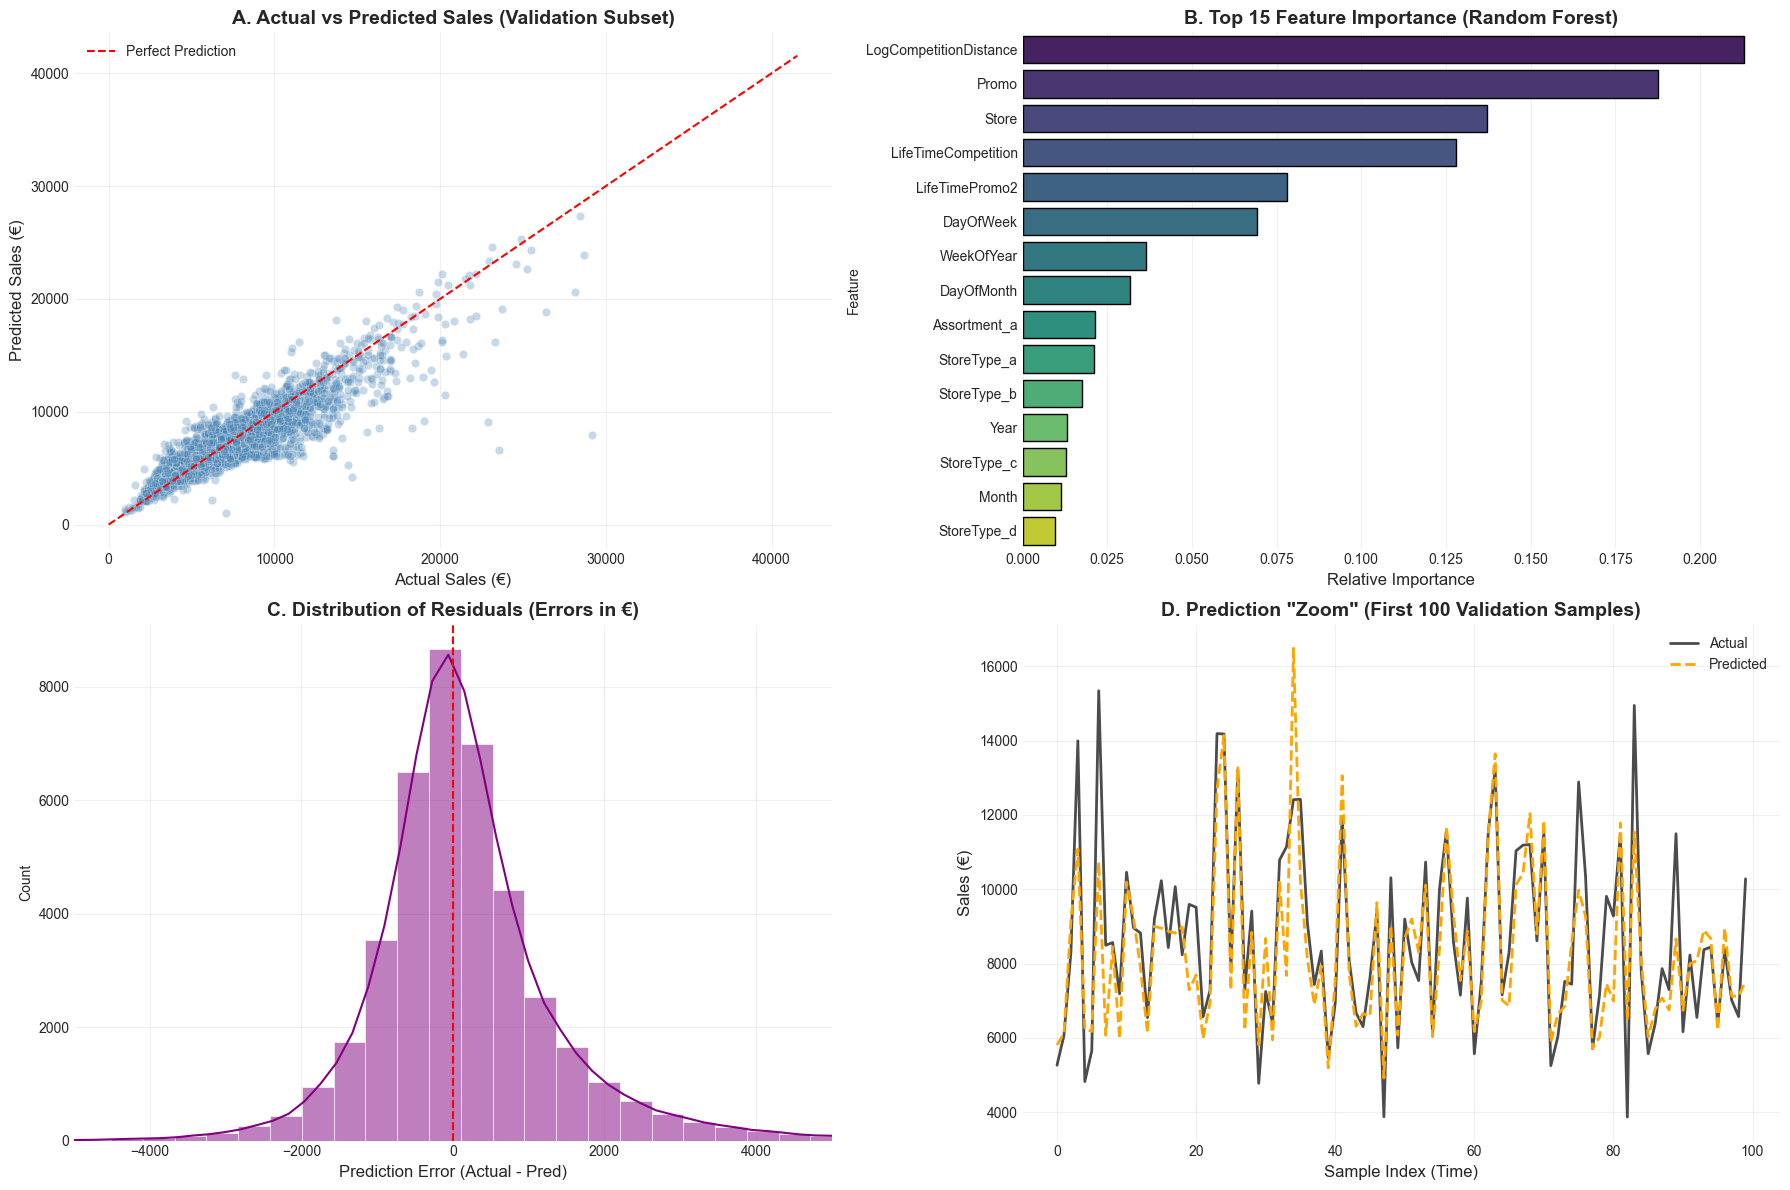

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("--- RANDOM FOREST: DIAGNOSTICA VISUALE ---")

# 1. Preparazione Dati per i Grafici
# Convertiamo i target reali da Log a Euro (se non fatto prima)
y_val_euro = np.expm1(y_val)

# Calcoliamo i residui (Errore Assoluto e Percentuale)
residuals = y_val_euro - rf_preds
pct_error = np.abs(residuals / y_val_euro) * 100

# 2. Setup Plot (Griglia 2x2)
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- PLOT A: Actual vs Predicted (Scatter) ---
ax1 = fig.add_subplot(gs[0, 0])
# Campioniamo per evitare un grafico troppo pesante
sample_idx = np.random.choice(len(y_val_euro), 5000, replace=False)

sns.scatterplot(x=y_val_euro.iloc[sample_idx], y=rf_preds[sample_idx], 
                alpha=0.3, color='steelblue', ax=ax1)

# Linea perfetta (Ideale)
max_val = max(y_val_euro.max(), rf_preds.max())
ax1.plot([0, max_val], [0, max_val], '--', color='red', label='Perfect Prediction')

ax1.set_title('A. Actual vs Predicted Sales (Validation Subset)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Sales (€)', fontsize=12)
ax1.set_ylabel('Predicted Sales (€)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- PLOT B: Feature Importance (Bar) ---
ax2 = fig.add_subplot(gs[0, 1])

# Estraiamo l'importanza dal modello
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False).head(15) # Top 15

sns.barplot(x='Importance', y='Feature', data=feat_imp_df, 
            palette='viridis', edgecolor='black', ax=ax2)

ax2.set_title('B. Top 15 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Relative Importance', fontsize=12)
ax2.grid(True, axis='x', alpha=0.3)

# --- PLOT C: Error Distribution (Residuals) ---
ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(residuals, bins=100, color='purple', kde=True, ax=ax3)
ax3.set_title('C. Distribution of Residuals (Errors in €)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Prediction Error (Actual - Pred)', fontsize=12)
ax3.axvline(0, color='red', linestyle='--') # Zero error line
ax3.set_xlim(-5000, 5000) # Zoom sulla parte centrale per leggibilità
ax3.grid(True, alpha=0.3)

# --- PLOT D: Time Series Zoom (Snapshot) ---
# Prendiamo i primi 100 giorni del validation set per vedere come "segue" la linea
ax4 = fig.add_subplot(gs[1, 1])
subset_n = 100
x_range = range(subset_n)

ax4.plot(x_range, y_val_euro.iloc[:subset_n], label='Actual', color='black', linewidth=2, alpha=0.7)
ax4.plot(x_range, rf_preds[:subset_n], label='Predicted', color='orange', linewidth=2, linestyle='--')

ax4.set_title('D. Prediction "Zoom" (First 100 Validation Samples)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sample Index (Time)', fontsize=12)
ax4.set_ylabel('Sales (€)', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

XGBoost

In [224]:
import xgboost as xgb
import time
import numpy as np

print("--- TRAINING CHALLENGER: XGBOOST REGRESSOR ---")

# 1. Configurazione del Modello
# Usiamo parametri robusti per dataset tabulari complessi
xgb_model = xgb.XGBRegressor(
    n_estimators=3000,       # Numero massimo di alberi (Early Stopping deciderà il taglio)
    learning_rate=0.05,      # Tasso di apprendimento conservativo per maggiore precisione
    max_depth=10,            # Profondità sufficiente per catturare interazioni (es. StoreType * Promo)
    subsample=0.8,           # Campionamento righe (evita overfitting)
    colsample_bytree=0.7,    # Campionamento colonne (evita overfitting)
    n_jobs=-1,               # Usa tutti i core della CPU
    random_state=42,
    tree_method='hist'       # Metodo ottimizzato per grandi dataset (molto più veloce)
)

start_time = time.time()

# 2. Addestramento con Early Stopping
print("Inizio training con Early Stopping (Monitoraggio su Validation Set)...")

# eval_set permette al modello di misurare l'errore su Train e Val ad ogni passo
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds=100, # Si ferma se l'errore su Val non scende per 100 round
    verbose=100                # Stampa il log ogni 100 alberi
)

training_time = time.time() - start_time
print(f"\nTraining completato in {training_time:.1f} secondi.")
print(f"Best Iteration (Numero ottimale di alberi): {xgb_model.best_iteration}")

# 3. Valutazione Finale (Usando la tua funzione helper)
print("\n--- CALCOLO METRICHE DI VALUTAZIONE ---")
xgb_score, xgb_preds = evaluate_model(xgb_model, X_val, y_val)

# Confronto rapido
baseline_ref = 0.1735 # Il valore del Random Forest
delta = baseline_ref - xgb_score
print(f"Miglioramento su Random Forest: +{delta*100:.2f} punti percentuali")

--- TRAINING CHALLENGER: XGBOOST REGRESSOR ---
Inizio training con Early Stopping (Monitoraggio su Validation Set)...
[0]	validation_0-rmse:0.42594	validation_1-rmse:0.40910
[100]	validation_0-rmse:0.21488	validation_1-rmse:0.21439
[200]	validation_0-rmse:0.15725	validation_1-rmse:0.16323
[300]	validation_0-rmse:0.13212	validation_1-rmse:0.14372
[400]	validation_0-rmse:0.11848	validation_1-rmse:0.13536
[500]	validation_0-rmse:0.11027	validation_1-rmse:0.13234
[600]	validation_0-rmse:0.10397	validation_1-rmse:0.13385
[601]	validation_0-rmse:0.10393	validation_1-rmse:0.13384

Training completato in 54.7 secondi.
Best Iteration (Numero ottimale di alberi): 501

--- CALCOLO METRICHE DI VALUTAZIONE ---
Validation RMSPE: 0.14160 (14.16%)
Miglioramento su Random Forest: +3.19 punti percentuali


--- XGBOOST: DIAGNOSTICA VISUALE ---


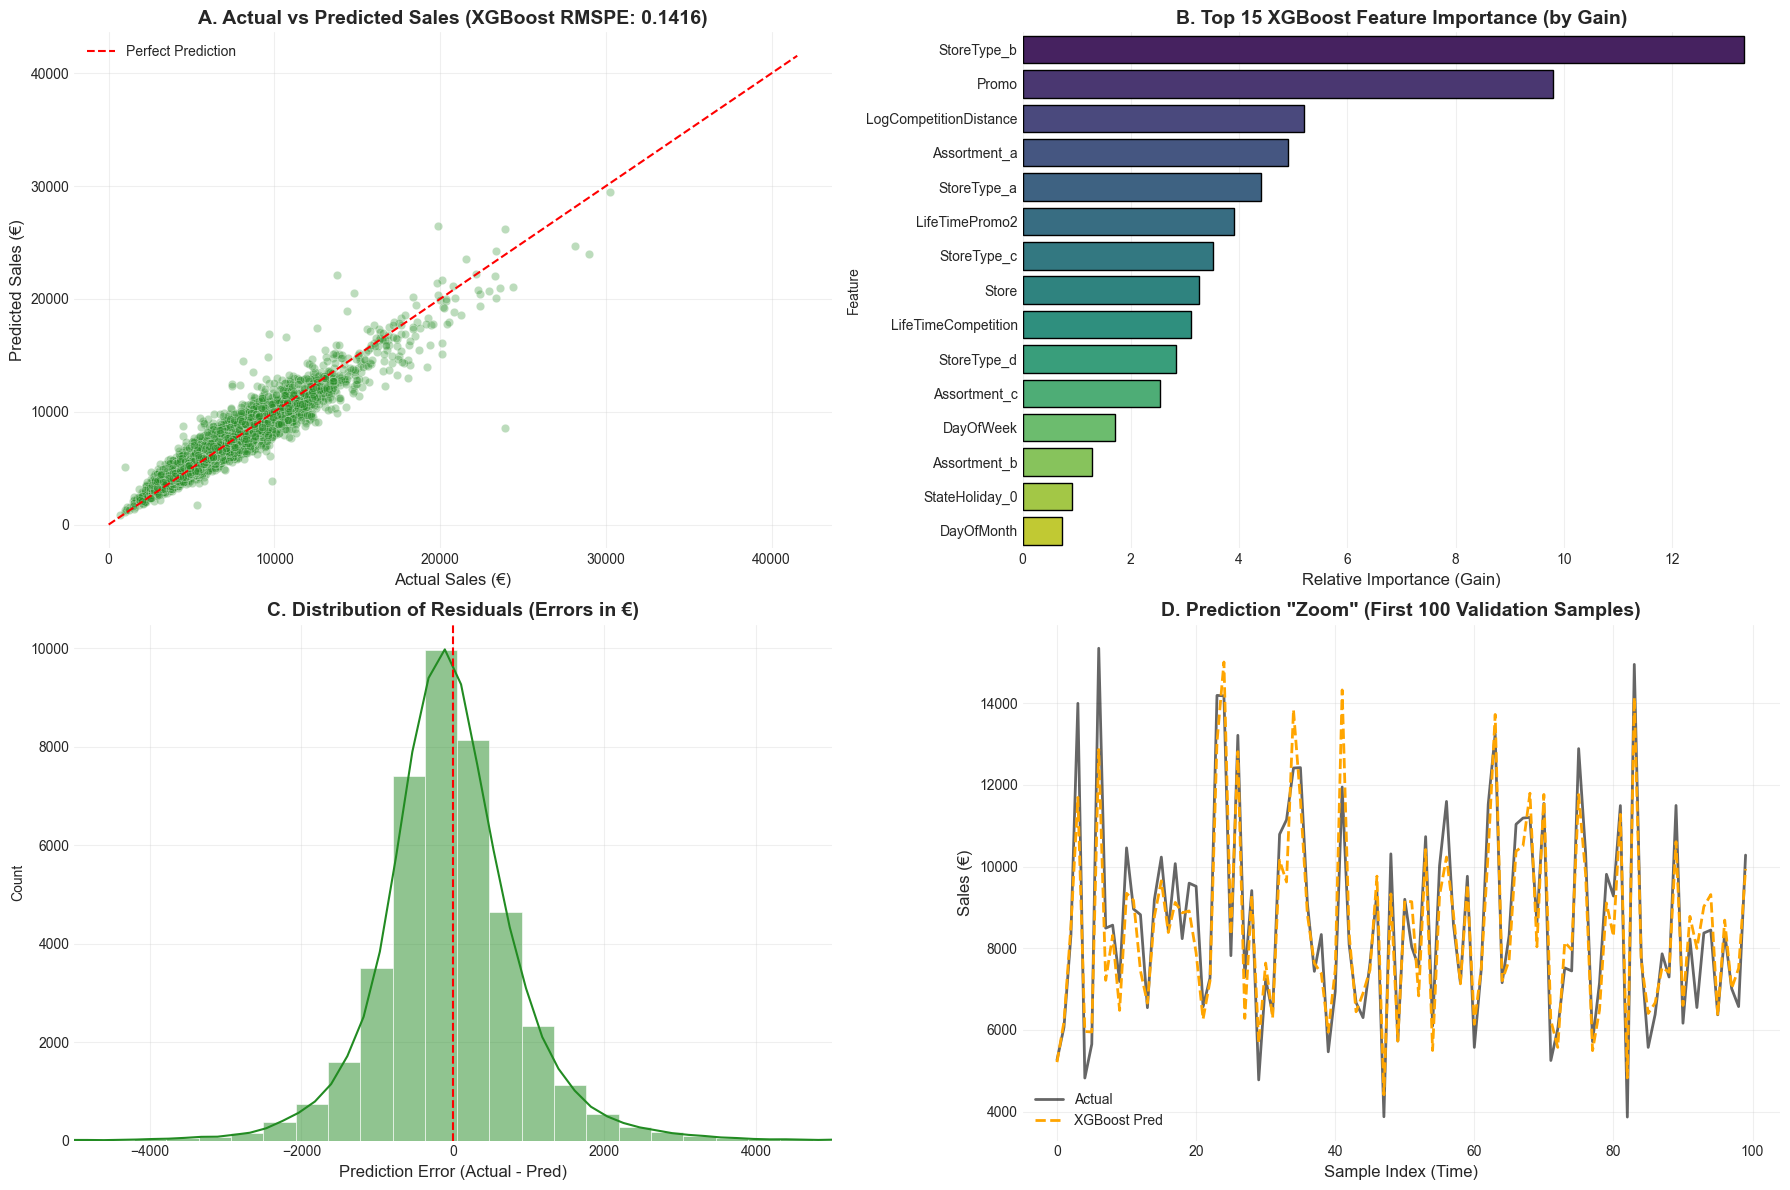

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("--- XGBOOST: DIAGNOSTICA VISUALE ---")

# 1. Preparazione Dati per i Grafici
# Convertiamo i target reali da Log a Euro (se non fatto prima)
y_val_euro = np.expm1(y_val)

# Calcoliamo i residui (Errore Assoluto)
# Nota: usiamo xgb_preds che hai calcolato nel blocco precedente
residuals = y_val_euro - xgb_preds 

# 2. Setup Plot (Griglia 2x2)
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- PLOT A: Actual vs Predicted (Scatter) ---
ax1 = fig.add_subplot(gs[0, 0])
# Campioniamo per evitare un grafico troppo pesante
sample_idx = np.random.choice(len(y_val_euro), 5000, replace=False)

sns.scatterplot(x=y_val_euro.iloc[sample_idx], y=xgb_preds[sample_idx], 
                alpha=0.3, color='forestgreen', ax=ax1)

# Linea perfetta (Ideale)
max_val = max(y_val_euro.max(), xgb_preds.max())
ax1.plot([0, max_val], [0, max_val], '--', color='red', label='Perfect Prediction')

ax1.set_title(f'A. Actual vs Predicted Sales (XGBoost RMSPE: {xgb_score:.4f})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Sales (€)', fontsize=12)
ax1.set_ylabel('Predicted Sales (€)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- PLOT B: Feature Importance (Bar - Gain Method) ---
ax2 = fig.add_subplot(gs[0, 1])

# Estraiamo l'importanza dal modello XGBoost (metodo 'gain' è il più accurato)
importance = xgb_model.get_booster().get_score(importance_type='gain')
# Convertiamo in DataFrame
feat_imp_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False).head(15) # Top 15

sns.barplot(x='Importance', y='Feature', data=feat_imp_df, 
            palette='viridis', edgecolor='black', ax=ax2)

ax2.set_title('B. Top 15 XGBoost Feature Importance (by Gain)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Relative Importance (Gain)', fontsize=12)
ax2.grid(True, axis='x', alpha=0.3)

# --- PLOT C: Error Distribution (Residuals) ---
ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(residuals, bins=100, color='forestgreen', kde=True, ax=ax3)
ax3.set_title('C. Distribution of Residuals (Errors in €)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Prediction Error (Actual - Pred)', fontsize=12)
ax3.axvline(0, color='red', linestyle='--') # Zero error line
ax3.set_xlim(-5000, 5000) # Zoom sulla parte centrale per leggibilità
ax3.grid(True, alpha=0.3)

# --- PLOT D: Time Series Zoom (Snapshot) ---
# Prendiamo i primi 100 giorni del validation set per vedere come "segue" la linea
ax4 = fig.add_subplot(gs[1, 1])
subset_n = 100
x_range = range(subset_n)

ax4.plot(x_range, y_val_euro.iloc[:subset_n], label='Actual', color='black', linewidth=2, alpha=0.6)
ax4.plot(x_range, xgb_preds[:subset_n], label='XGBoost Pred', color='orange', linewidth=2, linestyle='--')

ax4.set_title('D. Prediction "Zoom" (First 100 Validation Samples)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sample Index (Time)', fontsize=12)
ax4.set_ylabel('Sales (€)', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Hyperparameters Tuning

In [226]:
import xgboost as xgb
import time

print("--- TRAINING MODELLO 'PLATINUM' (High Precision Tuning) ---")

# Configurazione per minimizzare l'Overfitting e massimizzare la precisione
platinum_params = {
    'n_estimators': 10000,     # Altissimo: con LR basso servono tanti alberi
    'learning_rate': 0.01,     # DIMEZZATO: Apprendimento ultra-fine
    'max_depth': 12,           # Manteniamo la profondità per le interazioni complesse
    
    # Parametri Anti-Overfitting potenziati
    'subsample': 0.8,          
    'colsample_bytree': 0.6,   # RIDOTTO: Più varietà tra gli alberi
    'min_child_weight': 5,     # AUMENTATO: Alberi più conservativi sulle foglie
    
    # Regolarizzazione più aggressiva
    'reg_alpha': 1,            # AUMENTATO: L1 (Lasso) per pulire il rumore
    'reg_lambda': 1.5,         # L2 (Ridge) standard
    
    'tree_method': 'hist',     # Velocità
    'n_jobs': -1,
    'random_state': 42
}

start_time = time.time()

# Inizializzazione
platinum_model = xgb.XGBRegressor(**platinum_params)

print(f"Inizio addestramento Platinum...")
print(f"Strategia: Learning Rate={platinum_params['learning_rate']} (Very Slow), Regularization=High")

# Addestramento
platinum_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds=200, # Pazienza aumentata a 200 perché il LR è basso
    verbose=250                # Log ogni 250 round per non intasare l'output
)

training_time = time.time() - start_time
print(f"\nTraining completato in {training_time/60:.1f} minuti.")
print(f"Miglior iterazione: {platinum_model.best_iteration}")

# Valutazione Finale
print("\n--- RISULTATI FINALI (PLATINUM) ---")
final_score_plat, y_pred_plat = evaluate_model(platinum_model, X_val, y_val)

--- TRAINING MODELLO 'PLATINUM' (High Precision Tuning) ---
Inizio addestramento Platinum...
Strategia: Learning Rate=0.01 (Very Slow), Regularization=High
[0]	validation_0-rmse:0.43045	validation_1-rmse:0.41316
[250]	validation_0-rmse:0.23408	validation_1-rmse:0.22338
[500]	validation_0-rmse:0.18030	validation_1-rmse:0.17683
[750]	validation_0-rmse:0.15147	validation_1-rmse:0.15184
[1000]	validation_0-rmse:0.13379	validation_1-rmse:0.13640
[1250]	validation_0-rmse:0.12425	validation_1-rmse:0.12913
[1500]	validation_0-rmse:0.11787	validation_1-rmse:0.12529
[1750]	validation_0-rmse:0.11313	validation_1-rmse:0.12261
[2000]	validation_0-rmse:0.10946	validation_1-rmse:0.12083
[2250]	validation_0-rmse:0.10656	validation_1-rmse:0.11999
[2500]	validation_0-rmse:0.10409	validation_1-rmse:0.11948
[2750]	validation_0-rmse:0.10192	validation_1-rmse:0.11938
[2986]	validation_0-rmse:0.10008	validation_1-rmse:0.11947

Training completato in 4.8 minuti.
Miglior iterazione: 2786

--- RISULTATI FINALI 

In [227]:
import joblib
import json
import os

print("--- SALVATAGGIO DEL MODELLO ---")

# 1. Definizione percorso e nome file
model_filename = "rossmann_xgb_platinum.json"
model_path = os.path.join(os.getcwd(), model_filename)

# 2. Salvataggio del Modello (Formato nativo XGBoost JSON)
# JSON è preferito perché è leggero e mantiene la compatibilità tra versioni diverse
platinum_model.save_model(model_path)
print(f"Modello salvato con successo in: {model_path}")

# 3. Salvataggio dei Metadati (Fondamentale!)
# Salviamo l'ordine esatto delle colonne usate per il training.
# Se nel test set le colonne sono in ordine diverso, il modello sbaglierà tutto.
metadata = {
    "features": X_train.columns.tolist(),
    "best_score": final_score_plat,
    "best_iteration": platinum_model.best_iteration
}

metadata_filename = "model_metadata.json"
with open(metadata_filename, "w") as f:
    json.dump(metadata, f)

print(f"Metadati (colonne) salvati in: {metadata_filename}")

--- SALVATAGGIO DEL MODELLO ---
Modello salvato con successo in: c:\Users\TF536AC\OneDrive - EY\WORK\Demand Forecasting PoC\rossmann_xgb_platinum.json
Metadati (colonne) salvati in: model_metadata.json


--- DIAGNOSTICA VISUALE: MODELLO PLATINUM (RMSPE: 0.1249) ---


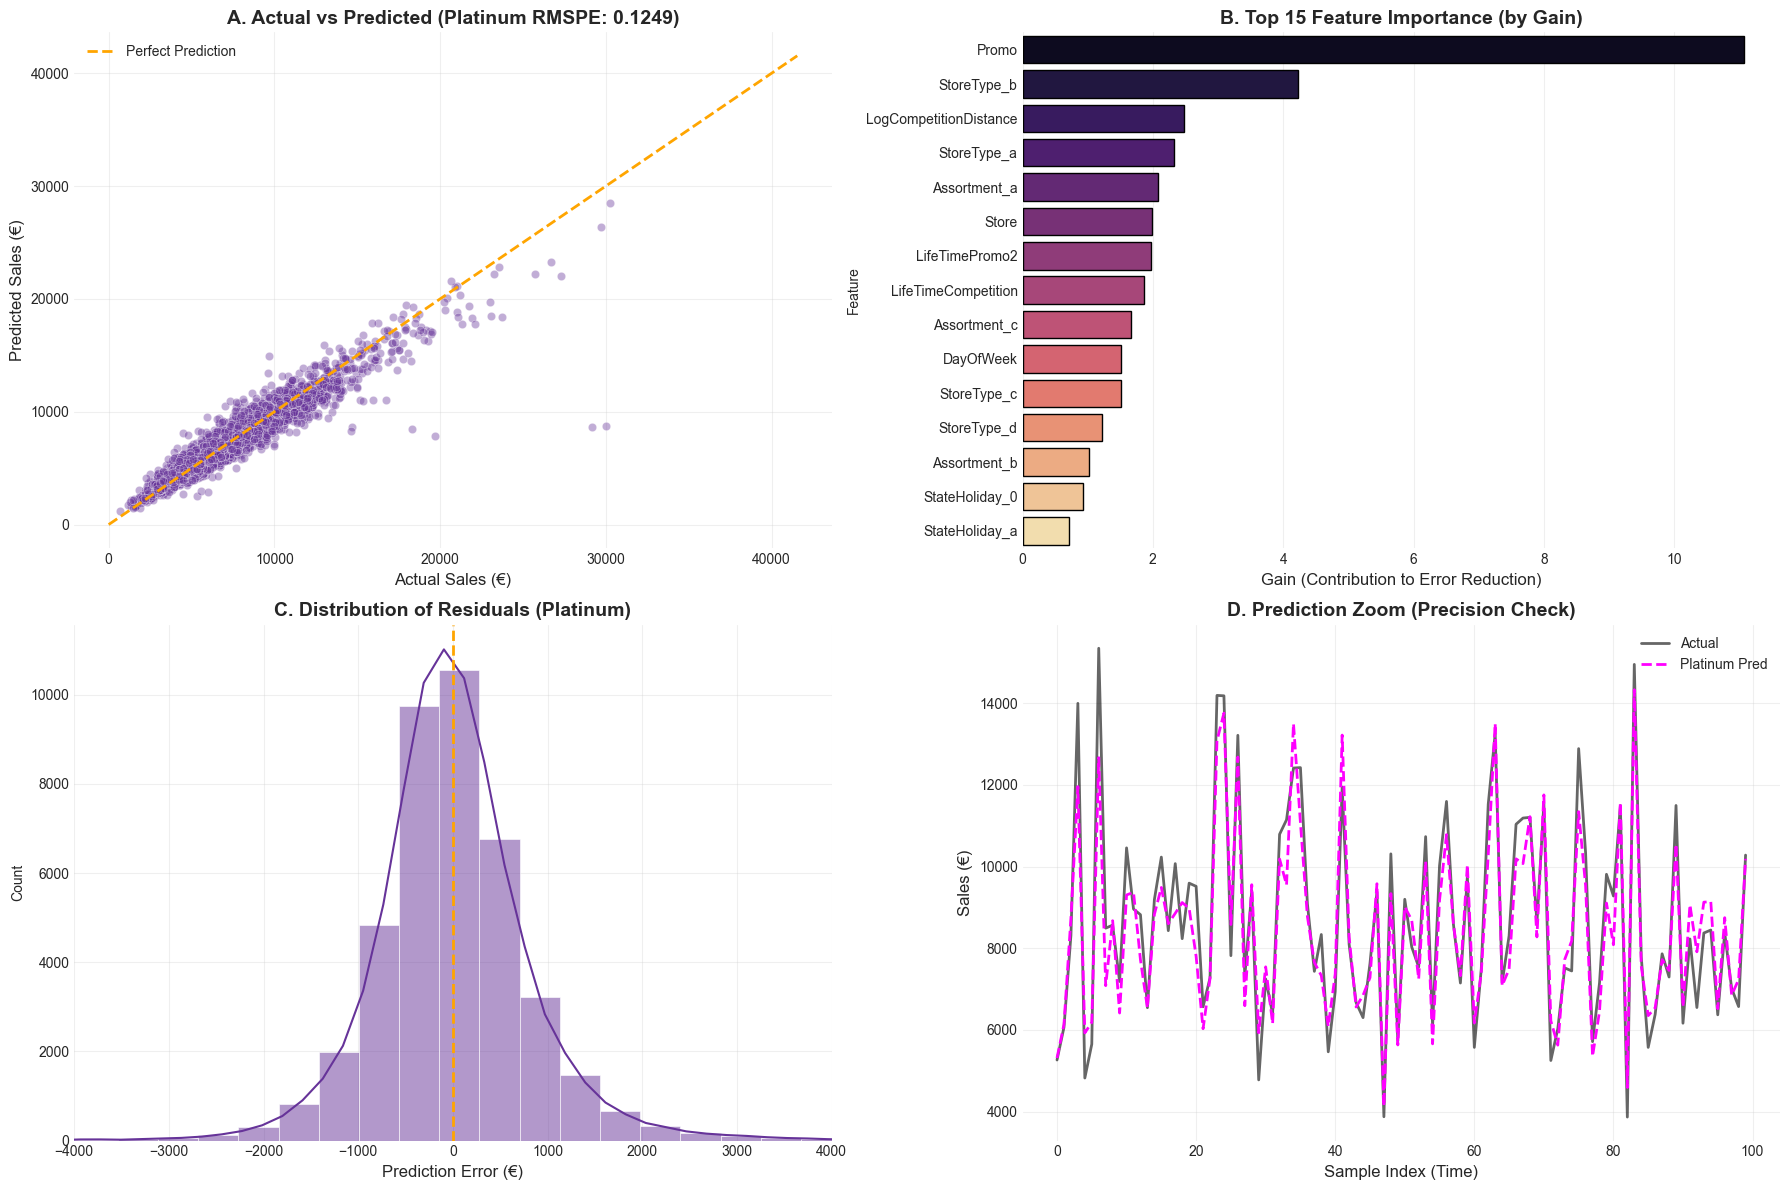

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print(f"--- DIAGNOSTICA VISUALE: MODELLO PLATINUM (RMSPE: {final_score_plat:.4f}) ---")

# 1. Preparazione Dati
# Convertiamo i target reali da Log a Euro
y_val_euro = np.expm1(y_val)

# Calcoliamo i residui (Reale - Predetto)
residuals_plat = y_val_euro - y_pred_plat

# 2. Setup Plot (Griglia 2x2)
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- PLOT A: Actual vs Predicted (Scatter) ---
ax1 = fig.add_subplot(gs[0, 0])
# Campioniamo 5000 punti per rendere il grafico leggibile e veloce
sample_idx = np.random.choice(len(y_val_euro), 5000, replace=False)

sns.scatterplot(x=y_val_euro.iloc[sample_idx], y=y_pred_plat[sample_idx], 
                alpha=0.4, color='rebeccapurple', ax=ax1)

# Linea perfetta
max_val = max(y_val_euro.max(), y_pred_plat.max())
ax1.plot([0, max_val], [0, max_val], '--', color='orange', linewidth=2, label='Perfect Prediction')

ax1.set_title(f'A. Actual vs Predicted (Platinum RMSPE: {final_score_plat:.4f})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Sales (€)', fontsize=12)
ax1.set_ylabel('Predicted Sales (€)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- PLOT B: Feature Importance (Gain Method) ---
ax2 = fig.add_subplot(gs[0, 1])

# Estraiamo l'importanza basata sul "Gain" (quanto la feature ha ridotto l'errore)
importance = platinum_model.get_booster().get_score(importance_type='gain')
feat_imp_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Gain'])
feat_imp_df = feat_imp_df.sort_values('Gain', ascending=False).head(15)

sns.barplot(x='Gain', y='Feature', data=feat_imp_df, 
            palette='magma', edgecolor='black', ax=ax2)

ax2.set_title('B. Top 15 Feature Importance (by Gain)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gain (Contribution to Error Reduction)', fontsize=12)
ax2.grid(True, axis='x', alpha=0.3)

# --- PLOT C: Error Distribution (Residuals) ---
ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(residuals_plat, bins=100, color='rebeccapurple', kde=True, ax=ax3)
ax3.set_title('C. Distribution of Residuals (Platinum)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Prediction Error (€)', fontsize=12)
ax3.axvline(0, color='orange', linestyle='--', linewidth=2)
# Zoom sulla parte centrale per vedere la precisione
ax3.set_xlim(-4000, 4000) 
ax3.grid(True, alpha=0.3)

# --- PLOT D: Time Series Zoom ---
ax4 = fig.add_subplot(gs[1, 1])
# Prendiamo i primi 100 giorni del validation set
subset_n = 100
x_range = range(subset_n)

ax4.plot(x_range, y_val_euro.iloc[:subset_n], label='Actual', color='black', linewidth=2, alpha=0.6)
ax4.plot(x_range, y_pred_plat[:subset_n], label='Platinum Pred', color='magenta', linewidth=2, linestyle='--')

ax4.set_title('D. Prediction Zoom (Precision Check)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sample Index (Time)', fontsize=12)
ax4.set_ylabel('Sales (€)', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

LightGBM

In [229]:
import lightgbm as lgb
import time
import numpy as np

print("--- TRAINING LIGHTGBM 'PLATINUM' (High Capacity Tuning) ---")

# Configurazione Ottimizzata per Performance Estreme
lgbm_platinum_params = {
    'n_estimators': 15000,      # Aumentato drasticamente: non deve fermarsi per limite numero
    'learning_rate': 0.01,      # Ultra-slow learner per massima precisione
    
    # POTENZIAMENTO STRUTTURALE
    'num_leaves': 128,          # Aumentato da 40 a 128: permette alberi molto più intelligenti
    'max_depth': -1,            # Nessun limite di profondità, lascia gestire a num_leaves
    
    # CONTROLLO OVERFITTING
    'min_child_samples': 50,    # Aumentato per evitare foglie con pochi dati (rumore)
    'subsample': 0.8,           # Usa 80% dati
    'subsample_freq': 1,        # Resample ogni iterazione
    'colsample_bytree': 0.7,    # Usa 70% feature
    
    # REGOLARIZZAZIONE
    'reg_alpha': 0.1,           
    'reg_lambda': 1.5,
    
    'n_jobs': -1,
    'random_state': 42
}

start_time = time.time()

# Inizializzazione
lgb_model_plat = lgb.LGBMRegressor(**lgbm_platinum_params)

print(f"Inizio addestramento LightGBM Platinum...")
print(f"Parametri chiave: Leaves={lgbm_platinum_params['num_leaves']}, LR={lgbm_platinum_params['learning_rate']}")

# Addestramento
lgb_model_plat.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(stopping_rounds=250), # Pazienza aumentata a 250
        lgb.log_evaluation(period=500)           # Log ogni 500 per pulizia
    ]
)

training_time = time.time() - start_time
print(f"\nTraining completato in {training_time/60:.1f} minuti.")
print(f"Miglior iterazione: {lgb_model_plat.best_iteration_}")

# Valutazione Finale
print("\n--- RISULTATI FINALI (LIGHTGBM PLATINUM) ---")
lgb_score_plat, y_pred_lgb_plat = evaluate_model(lgb_model_plat, X_val, y_val)

--- TRAINING LIGHTGBM 'PLATINUM' (High Capacity Tuning) ---
Inizio addestramento LightGBM Platinum...
Parametri chiave: Leaves=128, LR=0.01
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 802996, number of used features: 23
[LightGBM] [Info] Start training from score 8.756629
Training until validation scores don't improve for 250 rounds
[500]	training's rmse: 0.220619	training's l2: 0.0486727	valid_1's rmse: 0.211079	valid_1's l2: 0.0445545
[1000]	training's rmse: 0.167999	training's l2: 0.0282237	valid_1's rmse: 0.165197	valid_1's l2: 0.0272901
[1500]	training's rmse: 0.149235	training's l2: 0.022271	valid_1's rmse: 0.147365	valid_1's l2: 0.0217165
[2000]	training's rmse: 0.13995	training's l2: 0.0195861	valid_1's rmse: 

--- DIAGNOSTICA VISUALE: MODELLO LIGHTGBM (RMSPE: 0.1264) ---


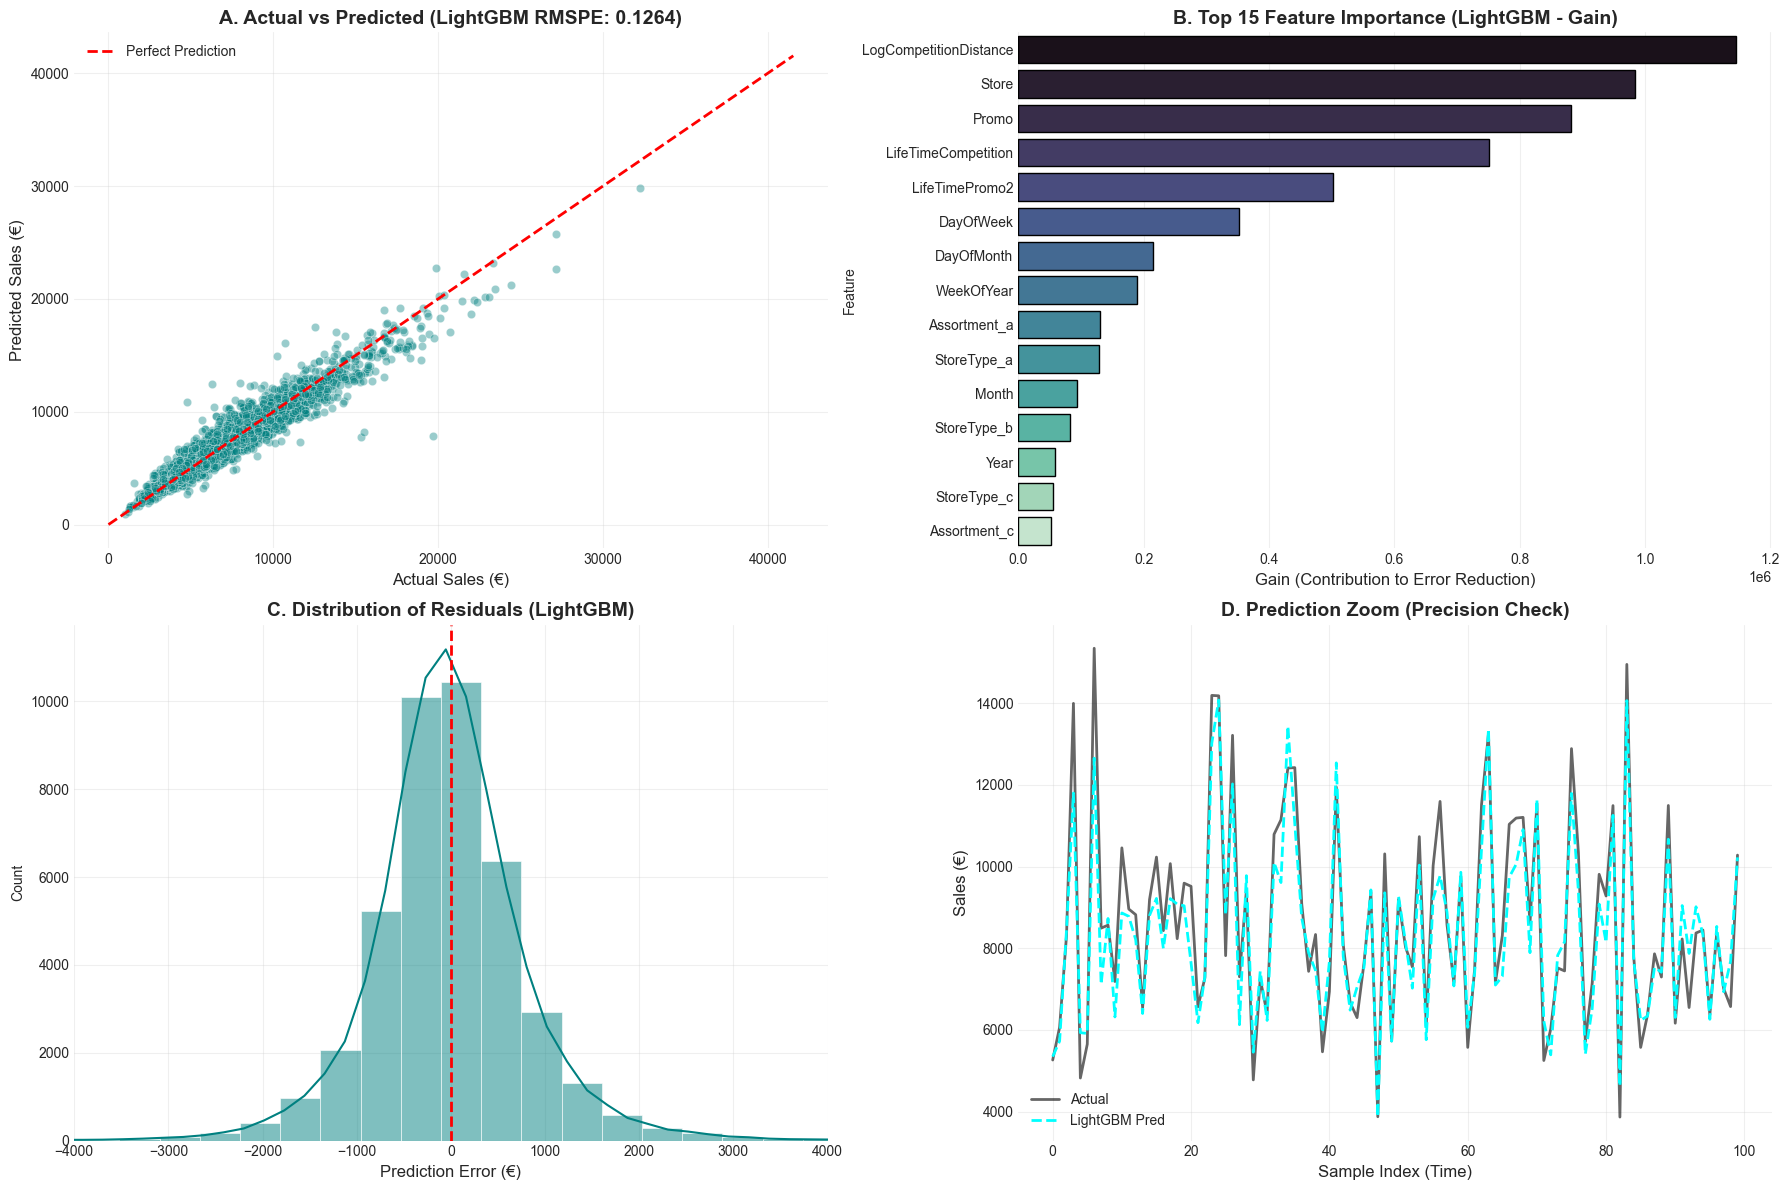

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print(f"--- DIAGNOSTICA VISUALE: MODELLO LIGHTGBM (RMSPE: {lgb_score_plat:.4f}) ---")

# 1. Preparazione Dati
# Convertiamo i target reali da Log a Euro
y_val_euro = np.expm1(y_val)

# Calcoliamo i residui (Reale - Predetto)
residuals_lgb = y_val_euro - y_pred_lgb_plat

# 2. Setup Plot (Griglia 2x2)
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- PLOT A: Actual vs Predicted (Scatter) ---
ax1 = fig.add_subplot(gs[0, 0])
# Campioniamo 5000 punti per rendere il grafico leggibile e veloce
sample_idx = np.random.choice(len(y_val_euro), 5000, replace=False)

sns.scatterplot(x=y_val_euro.iloc[sample_idx], y=y_pred_lgb_plat[sample_idx], 
                alpha=0.4, color='teal', ax=ax1)

# Linea perfetta
max_val = max(y_val_euro.max(), y_pred_lgb_plat.max())
ax1.plot([0, max_val], [0, max_val], '--', color='red', linewidth=2, label='Perfect Prediction')

ax1.set_title(f'A. Actual vs Predicted (LightGBM RMSPE: {lgb_score_plat:.4f})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Sales (€)', fontsize=12)
ax1.set_ylabel('Predicted Sales (€)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- PLOT B: Feature Importance (Gain Method) ---
ax2 = fig.add_subplot(gs[0, 1])

# Estraiamo l'importanza da LightGBM (Sintassi specifica LGBM)
importance = lgb_model_plat.booster_.feature_importance(importance_type='gain')
feature_names = lgb_model_plat.feature_name_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Gain': importance})
feat_imp_df = feat_imp_df.sort_values('Gain', ascending=False).head(15)

sns.barplot(x='Gain', y='Feature', data=feat_imp_df, 
            palette='mako', edgecolor='black', ax=ax2)

ax2.set_title('B. Top 15 Feature Importance (LightGBM - Gain)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gain (Contribution to Error Reduction)', fontsize=12)
ax2.grid(True, axis='x', alpha=0.3)

# --- PLOT C: Error Distribution (Residuals) ---
ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(residuals_lgb, bins=100, color='teal', kde=True, ax=ax3)
ax3.set_title('C. Distribution of Residuals (LightGBM)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Prediction Error (€)', fontsize=12)
ax3.axvline(0, color='red', linestyle='--', linewidth=2)
# Zoom sulla parte centrale per vedere la precisione
ax3.set_xlim(-4000, 4000) 
ax3.grid(True, alpha=0.3)

# --- PLOT D: Time Series Zoom ---
ax4 = fig.add_subplot(gs[1, 1])
# Prendiamo i primi 100 giorni del validation set
subset_n = 100
x_range = range(subset_n)

ax4.plot(x_range, y_val_euro.iloc[:subset_n], label='Actual', color='black', linewidth=2, alpha=0.6)
ax4.plot(x_range, y_pred_lgb_plat[:subset_n], label='LightGBM Pred', color='cyan', linewidth=2, linestyle='--')

ax4.set_title('D. Prediction Zoom (Precision Check)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sample Index (Time)', fontsize=12)
ax4.set_ylabel('Sales (€)', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Entity Embeddings Neural Network

In [231]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("--- ESECUZIONE SOLO LABEL ENCODING SU DF_NN ---")

# 1. Definizione Liste Variabili Categoriche
# Queste sono le colonne che devono diventare indici interi per gli Embedding Layers
cat_vars = [
    'Store', 'DayOfWeek', 'Year', 'Month', 'DayOfMonth', 'WeekOfYear',
    'Promo', 'SchoolHoliday', 'StateHoliday', 
    'StoreType', 'Assortment', 'isPromo2Month'
]

# 2. Label Encoding Loop
# Lavoriamo direttamente su df_nn esistente
label_encoders = {}

print("Applicazione Label Encoding...")

for cat in cat_vars:
    # Controllo di sicurezza se la colonna esiste
    if cat in df_nn.columns:
        le = LabelEncoder()
        
        # Convertiamo in stringa per uniformità e robustezza (gestisce eventuali mix di tipi)
        df_nn[cat] = df_nn[cat].astype(str)
        
        # Trasformazione in interi (0, 1, 2...)
        df_nn[cat] = le.fit_transform(df_nn[cat])
        
        # Salviamo l'encoder per riferimento futuro
        label_encoders[cat] = le
        
        print(f" - {cat}: codificata in {len(le.classes_)} classi (int)")
    else:
        print(f"WARNING: Colonna '{cat}' non trovata in df_nn")

# 3. Verifica Finale
print("-" * 50)
print("DATASET PRONTO (Solo Encoding):")
print(df_nn[cat_vars].head())
print("-" * 50)
print("Verifica tipi (Le categoriche devono essere int32/int64):")
print(df_nn[cat_vars].dtypes)

--- ESECUZIONE SOLO LABEL ENCODING SU DF_NN ---
Applicazione Label Encoding...
 - Store: codificata in 1115 classi (int)
 - DayOfWeek: codificata in 7 classi (int)
 - Year: codificata in 3 classi (int)
 - Month: codificata in 12 classi (int)
 - DayOfMonth: codificata in 31 classi (int)
 - WeekOfYear: codificata in 52 classi (int)
 - Promo: codificata in 2 classi (int)
 - SchoolHoliday: codificata in 2 classi (int)
 - StateHoliday: codificata in 4 classi (int)
 - StoreType: codificata in 4 classi (int)
 - Assortment: codificata in 3 classi (int)
 - isPromo2Month: codificata in 2 classi (int)
--------------------------------------------------
DATASET PRONTO (Solo Encoding):
   Store  DayOfWeek  Year  Month  DayOfMonth  WeekOfYear  Promo  \
0      0          4     2      9          24          24      1   
1    227          4     2      9          24          24      1   
2    338          4     2      9          24          24      1   
3    449          4     2      9          24       

In [232]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("--- STEP 8: SPLIT TEMPORALE & SCALING (SU DATASET df_nn) ---")

# 1. GENERAZIONE MASCHERA TEMPORALE (Usando 'train' che ha i valori numerici reali)
# Ricostruiamo la data dai valori numerici originali in 'train'
# (Nota: in df_nn anno/mese sono codificati, quindi non possiamo usarli per le date)
temp_date = pd.to_datetime(train[['Year', 'Month', 'DayOfMonth']].rename(columns={'DayOfMonth': 'day'}))

# Definizione Data di Taglio (Ultime 6 settimane)
max_date = temp_date.max()
split_date = max_date - pd.Timedelta(days=6*7)

print(f"Data di taglio: {split_date.date()}")

# Creiamo le maschere
mask_train = temp_date < split_date
mask_val = temp_date >= split_date

# 2. SPLIT DEL DATASET (Applicato a df_nn)
X_train_nn = df_nn[mask_train].copy()
X_val_nn = df_nn[mask_val].copy()

# Creazione Target (Log Sales) - Dal train originale
y_train_nn = np.log1p(train.loc[mask_train, 'Sales'])
y_val_nn = np.log1p(train.loc[mask_val, 'Sales'])

print(f"Train set shape: {X_train_nn.shape}")
print(f"Val set shape:   {X_val_nn.shape}")

# 3. RIMOZIONE FEATURE NON NECESSARIE DA X
# Rimuoviamo target e colonne non utili per il training
cols_to_exclude = ['Sales']
drop_cols = [c for c in cols_to_exclude if c in X_train_nn.columns]

X_train_nn = X_train_nn.drop(columns=drop_cols)
X_val_nn = X_val_nn.drop(columns=drop_cols)

# 4. SCALING VARIABILI CONTINUE
# Scaliamo solo queste, lasciando intatti gli indici categorici (Label Encoded)
cont_vars = ['LogCompetitionDistance', 'LifeTimeCompetition', 'LifeTimePromo2']

print(f"\nVariabili continue da scalare: {cont_vars}")

scaler = StandardScaler()

# A. FIT + TRANSFORM sul Training
X_train_nn[cont_vars] = scaler.fit_transform(X_train_nn[cont_vars])

# B. SOLO TRANSFORM sul Validation (evita Data Leakage)
X_val_nn[cont_vars] = scaler.transform(X_val_nn[cont_vars])

print("Scaling completato.")

# 5. VERIFICA FINALE
print("-" * 50)
print("CHECK VETTORI NEURAL NETWORK:")
print(f"X_train_nn: {X_train_nn.shape} | y_train_nn: {y_train_nn.shape}")
print(f"X_val_nn:   {X_val_nn.shape}   | y_val_nn:   {y_val_nn.shape}")
print("-" * 50)
print("Esempio variabili scalate (Train):")
print(X_train_nn[cont_vars].head(3))

--- STEP 8: SPLIT TEMPORALE & SCALING (SU DATASET df_nn) ---
Data di taglio: 2015-06-19
Train set shape: (802996, 16)
Val set shape:   (41396, 16)

Variabili continue da scalare: ['LogCompetitionDistance', 'LifeTimeCompetition', 'LifeTimePromo2']
Scaling completato.
--------------------------------------------------
CHECK VETTORI NEURAL NETWORK:
X_train_nn: (802996, 15) | y_train_nn: (802996,)
X_val_nn:   (41396, 15)   | y_val_nn:   (41396,)
--------------------------------------------------
Esempio variabili scalate (Train):
       LogCompetitionDistance  LifeTimeCompetition  LifeTimePromo2
47945                  -0.323                0.201          -0.849
47946                  -0.831                0.369           1.749
47947                   1.208                0.553           1.284


In [233]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd

print("--- COSTRUZIONE E TRAINING NEURAL NETWORK (ENTITY EMBEDDINGS) ---")

# 1. DEFINIZIONE VARIABILI
# Devono corrispondere esattamente alle colonne presenti in X_train_nn
cat_vars = [
    'Store', 'DayOfWeek', 'Year', 'Month', 'DayOfMonth', 'WeekOfYear',
    'Promo', 'SchoolHoliday', 'StateHoliday', 
    'StoreType', 'Assortment', 'isPromo2Month'
]
cont_vars = ['LogCompetitionDistance', 'LifeTimeCompetition', 'LifeTimePromo2']

# 2. FORMATTAZIONE DATI PER KERAS (DataFrame -> List of Arrays)
def get_keras_inputs(df, cat_vars, cont_vars):
    input_list = []
    # Branch Categorici
    for cat in cat_vars:
        input_list.append(df[cat].values)
    # Branch Continuo
    input_list.append(df[cont_vars].values)
    return input_list

print("Formattazione dati per Keras...")
X_train_list = get_keras_inputs(X_train_nn, cat_vars, cont_vars)
X_val_list = get_keras_inputs(X_val_nn, cat_vars, cont_vars)
print("Dati pronti.")

# 3. DEFINIZIONE ARCHITETTURA MODELLO
def build_embedding_model(df_example, cat_vars, cont_vars):
    inputs = []
    embeddings = []
    
    # --- Branch Categorici (Embedding Layers) ---
    for cat in cat_vars:
        # +1 per sicurezza sugli indici (gestisce range 0..max)
        num_unique = int(df_example[cat].max()) + 1
        # Dimensione Embedding: min(50, (n+1)/2)
        embedding_dim = min(50, int((num_unique + 1) / 2))
        
        input_layer = Input(shape=(1,), name=f'In_{cat}')
        inputs.append(input_layer)
        
        emb = Embedding(input_dim=num_unique, output_dim=embedding_dim, name=f'Emb_{cat}')(input_layer)
        emb = Flatten()(emb)
        embeddings.append(emb)
    
    # --- Branch Continuo ---
    input_cont = Input(shape=(len(cont_vars),), name='In_Continuous')
    inputs.append(input_cont)
    embeddings.append(input_cont)
    
    # --- Deep Layers ---
    x = Concatenate()(embeddings)
    
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    
    # Output
    output = Dense(1, name='Output')(x)
    
    model = Model(inputs=inputs, outputs=output)
    return model

# Inizializzazione
model_nn = build_embedding_model(X_train_nn, cat_vars, cont_vars)
model_nn.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# 4. TRAINING
print("\nInizio Training NN...")
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Usiamo y_train_nn e y_val_nn definiti nei blocchi precedenti
history = model_nn.fit(
    X_train_list, y_train_nn,
    validation_data=(X_val_list, y_val_nn),
    epochs=40,          
    batch_size=512,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 5. VALUTAZIONE FINALE (Manuale per gestire dimensioni array)
print("\n--- RISULTATI FINALI (NEURAL NETWORK) ---")

# A. Predizione
print("Generazione predizioni...")
raw_preds = model_nn.predict(X_val_list, verbose=0)

# B. Flattening (FIX CRITICO: Trasforma matrice (N,1) in vettore (N,))
y_pred_log_nn = raw_preds.flatten()

# C. Conversione inversa (Log -> Euro)
y_pred_nn = np.expm1(y_pred_log_nn)
y_true_euro = np.expm1(y_val_nn)

# D. Calcolo Score (Usiamo la TUA funzione 'metric_rmspe' già definita)
nn_score = metric_rmspe(y_true_euro, y_pred_nn)

print(f"Validation RMSPE (Entity Embeddings): {nn_score:.5f} ({nn_score*100:.2f}%)")

--- COSTRUZIONE E TRAINING NEURAL NETWORK (ENTITY EMBEDDINGS) ---
Formattazione dati per Keras...
Dati pronti.

Inizio Training NN...
Epoch 1/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - loss: 1.1642 - val_loss: 0.0481 - learning_rate: 0.0010
Epoch 2/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - loss: 0.2497 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 3/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - loss: 0.1850 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 4/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - loss: 0.1533 - val_loss: 0.0199 - learning_rate: 0.0010
Epoch 5/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - loss: 0.1357 - val_loss: 0.0185 - learning_rate: 0.0010
Epoch 6/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - loss: 0.1233 - val_loss: 0.0200 - learning_rate: 0.0010
Epoch 7/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - loss: 0.1131 - val_loss: 0.0204 - learning_rate: 0.0010
Epoch 8/40
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.106

--- DIAGNOSTICA VISUALE: NEURAL NETWORK (RMSPE: 0.1289) ---


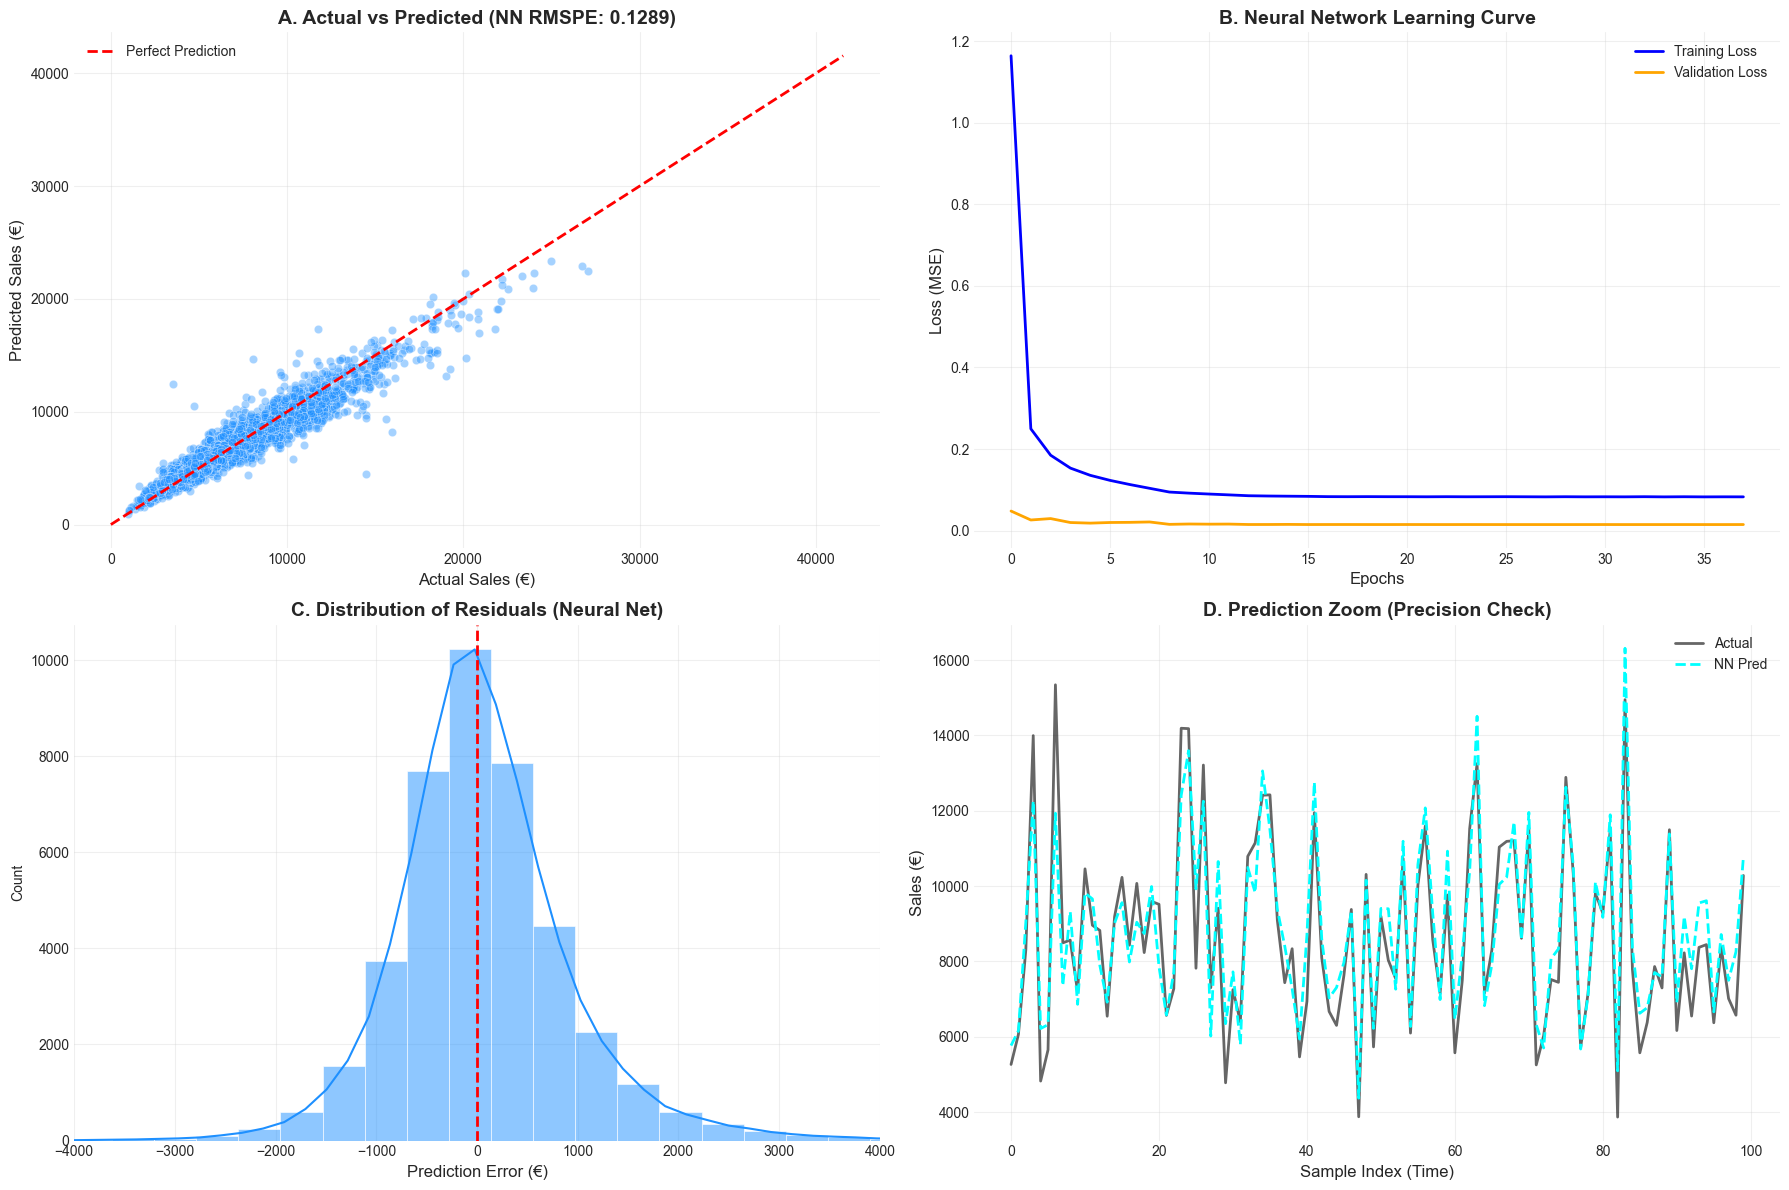

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print(f"--- DIAGNOSTICA VISUALE: NEURAL NETWORK (RMSPE: {nn_score:.4f}) ---")

# 1. Preparazione Dati
# Assicuriamoci di usare i target reali in Euro
y_val_euro = np.expm1(y_val)

# Calcolo residui
residuals_nn = y_val_euro - y_pred_nn

# 2. Setup Plot (Griglia 2x2)
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- PLOT A: Actual vs Predicted (Scatter) ---
ax1 = fig.add_subplot(gs[0, 0])
# Campionamento per leggibilità
sample_idx = np.random.choice(len(y_val_euro), 5000, replace=False)

sns.scatterplot(x=y_val_euro.iloc[sample_idx], y=y_pred_nn[sample_idx], 
                alpha=0.4, color='dodgerblue', ax=ax1)

# Linea perfetta
max_val = max(y_val_euro.max(), y_pred_nn.max())
ax1.plot([0, max_val], [0, max_val], '--', color='red', linewidth=2, label='Perfect Prediction')

ax1.set_title(f'A. Actual vs Predicted (NN RMSPE: {nn_score:.4f})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Sales (€)', fontsize=12)
ax1.set_ylabel('Predicted Sales (€)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- PLOT B: Training History (Loss Curve) ---
# Al posto della Feature Importance (non disponibile direttamente per NN),
# visualizziamo la curva di apprendimento per verificare overfitting/convergenza.
ax2 = fig.add_subplot(gs[0, 1])

if 'history' in locals():
    ax2.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
    ax2.set_title('B. Neural Network Learning Curve', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.set_ylabel('Loss (MSE)', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.5, 0.5, "Training history not found", ha='center', va='center')

# --- PLOT C: Error Distribution (Residuals) ---
ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(residuals_nn, bins=100, color='dodgerblue', kde=True, ax=ax3)
ax3.set_title('C. Distribution of Residuals (Neural Net)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Prediction Error (€)', fontsize=12)
ax3.axvline(0, color='red', linestyle='--', linewidth=2)
# Zoom sulla parte centrale
ax3.set_xlim(-4000, 4000) 
ax3.grid(True, alpha=0.3)

# --- PLOT D: Time Series Zoom ---
ax4 = fig.add_subplot(gs[1, 1])
# Primi 100 giorni del validation set
subset_n = 100
x_range = range(subset_n)

ax4.plot(x_range, y_val_euro.iloc[:subset_n], label='Actual', color='black', linewidth=2, alpha=0.6)
ax4.plot(x_range, y_pred_nn[:subset_n], label='NN Pred', color='cyan', linewidth=2, linestyle='--')

ax4.set_title('D. Prediction Zoom (Precision Check)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sample Index (Time)', fontsize=12)
ax4.set_ylabel('Sales (€)', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

--- ENSEMBLE FINALE: XGBOOST 'PLATINUM' + ENTITY EMBEDDINGS ---
Score XGBoost (Platinum): 0.12490
Score Neural Network:     0.12892
Correlazione tra le predizioni: 0.9855

Ricerca del mix ottimale...
--------------------------------------------------
BEST ENSEMBLE SCORE: 0.12243 (12.24%)
Miglior Configurazione: 40% Neural Net + 60% XGBoost
--------------------------------------------------
Guadagno rispetto al miglior modello singolo: -0.247 punti %


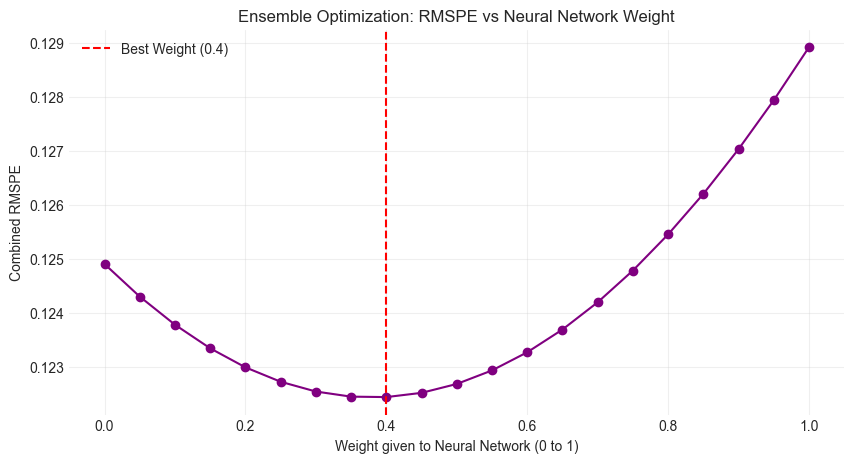

In [235]:
import numpy as np
import matplotlib.pyplot as plt

print("--- ENSEMBLE FINALE: XGBOOST 'PLATINUM' + ENTITY EMBEDDINGS ---")

# 1. Recupero Dati e Target Reale
# Assicuriamoci di usare i nomi delle variabili che hai in memoria
pred_xgb = y_pred_plat
pred_nn = y_pred_nn
y_true_euro = np.expm1(y_val) # Target reale in Euro

# Verifica Sanity Check
print(f"Score XGBoost (Platinum): {final_score_plat:.5f}")
print(f"Score Neural Network:     {nn_score:.5f}")

# 2. Calcolo Correlazione tra i modelli
# Se è < 0.95 l'ensemble funzionerà benissimo. Se è > 0.99 i modelli sono troppo simili.
corr = np.corrcoef(pred_xgb, pred_nn)[0, 1]
print(f"Correlazione tra le predizioni: {corr:.4f}")

# 3. Ottimizzazione Automatica dei Pesi (Weight Search)
print("\nRicerca del mix ottimale...")
best_score = 1.0
best_weight_nn = 0.0

# Proviamo pesi per la NN da 0.0 a 1.0 a passi di 0.05
results = []
weights_range = np.linspace(0, 1, 21)

for w_nn in weights_range:
    w_xgb = 1.0 - w_nn
    
    # Blending
    y_ensemble = (pred_nn * w_nn) + (pred_xgb * w_xgb)
    
    # Calcolo Score
    current_score = metric_rmspe(y_true_euro, y_ensemble)
    results.append(current_score)
    
    if current_score < best_score:
        best_score = current_score
        best_weight_nn = w_nn

# 4. Risultato Finale
print("-" * 50)
print(f"BEST ENSEMBLE SCORE: {best_score:.5f} ({best_score*100:.2f}%)")
print(f"Miglior Configurazione: {best_weight_nn*100:.0f}% Neural Net + {(1-best_weight_nn)*100:.0f}% XGBoost")
print("-" * 50)

# Calcolo del guadagno
improvement = min(final_score_plat, nn_score) - best_score
print(f"Guadagno rispetto al miglior modello singolo: -{improvement*100:.3f} punti %")

# 5. Plot della curva di ottimizzazione
plt.figure(figsize=(10, 5))
plt.plot(weights_range, results, marker='o', color='purple')
plt.title('Ensemble Optimization: RMSPE vs Neural Network Weight')
plt.xlabel('Weight given to Neural Network (0 to 1)')
plt.ylabel('Combined RMSPE')
plt.axvline(best_weight_nn, color='red', linestyle='--', label=f'Best Weight ({best_weight_nn})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()